In [ ]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from collections import Counter
from xgboost import XGBClassifier
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
import torch
import itertools
import random
import sklearn
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import missingno as msno
import miceforest as mf


# k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving KAMC_COVID-19.csv to KAMC_COVID-19.csv


# **Data processing**

In [ ]:
#Reading the ata
data = pd.read_csv('KAMC_COVID-19.csv')
data.head()

,Case ID,Gender,Age at diagnosis,Ventilation support status,Vital status,Haematocrit,Hemoglobin,MCHC,MCH,MCV,MPV,RBC,Platelet_count,RDW,WBC,CXR zone 1,CXR zone 2,CXR zone 3,CXR zone 4,CXR zone 5,CXR zone 6,CXR zone 7,CXR zone 8,CXR zone 9,CXR zone 10,CXR zone 11,CXR zone 12,cancer_ICD-10_C00-C97,chronic_ischaemic_heart_disease_coronary_artery_disease_ICD-10_I25_I250-I259,hypertension_ICD-10_I10,asthma_ICD-10_J45_J450-J459,chronic_obstructive_pulmonary_disease_ICD-10_J44_J440-J449,type_2_diabetes_mellitus_ICD-10_E11,liver_cirrhosis_ICD-10_K74_K740-K746,chronic_viral_hepatitis_B_ICD-10_B181,chronic_viral_hepatitis_C_ICD-10_B182,chronic_kidney_disease_all_stages_ICD-10N18_N181-N189
0,C_0001,Female,59.964384,MV,Deceased,0.378,119,315,29.3,92.9,8.5,4.07,249,14.9,2.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0
1,C_0002,Male,69.257534,NIV,Alive,0.404,130,321,27.2,84.8,7.0,4.76,179,13.1,8.66,1,1,2,2,2,2,1,1,1,2,2,2,0,0,1,0,0,0,0,0,0,0
2,C_0003,Male,62.446575,No_ventilator_support,Alive,0.308,97,314,18.7,59.7,7.8,5.17,244,9.9,5.61,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0
3,C_0004,Female,72.002740,No_ventilator_support,Alive,0.431,135,314,27.3,87.0,9.1,4.96,294,12.8,5.46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,C_0005,Female,86.983562,No_ventilator_support,Alive,0.504,161,319,28.3,88.8,8.7,5.68,224,13.7,6.04,0,0,1,0,1,1,0,1,0,1,1,1,0,0,1,0,1,1,0,0,0,0


In [ ]:
#Copying the Data into new dataframe 'df'
df = data.copy()

In [ ]:
#Checking dimensions of data
df.shape

(1513, 37)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 37 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   Case ID                                                                       1513 non-null   object 
 1   Gender                                                                        1513 non-null   object 
 2   Age at diagnosis                                                              1513 non-null   float64
 3   Ventilation support status                                                    1508 non-null   object 
 4   Vital status                                                                  1513 non-null   object 
 5   Haematocrit                                                                   1513 non-null   float64
 6   Hemoglobin                      

In [ ]:
#Droppping 'Case ID', 'Ventilation support status'
df.drop(['Case ID','Ventilation support status'],axis=1,inplace=True)
df.shape 

(1513, 35)

In [ ]:
df.columns

Index(['Gender', 'Age at diagnosis', 'Vital status', 'Haematocrit',
       'Hemoglobin', 'MCHC', 'MCH', 'MCV', 'MPV', 'RBC', 'Platelet_count',
       'RDW', 'WBC', 'CXR zone 1', 'CXR zone 2', 'CXR zone 3', 'CXR zone 4',
       'CXR zone 5', 'CXR zone 6', 'CXR zone 7', 'CXR zone 8', 'CXR zone 9',
       'CXR zone 10', 'CXR zone 11', 'CXR zone 12', 'cancer_ICD-10_C00-C97',
       'chronic_ischaemic_heart_disease_coronary_artery_disease_ICD-10_I25_I250-I259',
       'hypertension_ICD-10_I10', 'asthma_ICD-10_J45_J450-J459',
       'chronic_obstructive_pulmonary_disease_ICD-10_J44_J440-J449',
       'type_2_diabetes_mellitus_ICD-10_E11',
       'liver_cirrhosis_ICD-10_K74_K740-K746',
       'chronic_viral_hepatitis_B_ICD-10_B181',
       'chronic_viral_hepatitis_C_ICD-10_B182',
       'chronic_kidney_disease_all_stages_ICD-10N18_N181-N189'],
      dtype='object')

In [ ]:
df.describe()

,Age at diagnosis,Haematocrit,Hemoglobin,MCHC,MCH,MCV,MPV,RBC,Platelet_count,RDW,WBC,CXR zone 1,CXR zone 2,CXR zone 3,CXR zone 4,CXR zone 5,CXR zone 6,CXR zone 7,CXR zone 8,CXR zone 9,CXR zone 10,CXR zone 11,CXR zone 12,cancer_ICD-10_C00-C97,chronic_ischaemic_heart_disease_coronary_artery_disease_ICD-10_I25_I250-I259,hypertension_ICD-10_I10,asthma_ICD-10_J45_J450-J459,chronic_obstructive_pulmonary_disease_ICD-10_J44_J440-J449,type_2_diabetes_mellitus_ICD-10_E11,liver_cirrhosis_ICD-10_K74_K740-K746,chronic_viral_hepatitis_B_ICD-10_B181,chronic_viral_hepatitis_C_ICD-10_B182,chronic_kidney_disease_all_stages_ICD-10N18_N181-N189
count,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000
mean,54.836062,0.420396,134.448116,319.793787,27.875810,87.172307,8.166953,4.838295,250.508262,13.579511,7.361130,0.156642,0.099141,0.356907,0.174488,0.464640,0.356246,0.040317,0.115664,0.169200,0.357568,0.380701,0.506279,0.037673,0.093853,0.450760,0.106411,0.010575,0.450099,0.009253,0.005948,0.002644,0.091210
std,16.991038,0.062032,20.146851,10.525846,2.564495,7.617027,1.044818,0.688983,93.898861,1.768108,4.462264,0.391608,0.326446,0.532831,0.416218,0.586645,0.544928,0.200100,0.332100,0.395648,0.534248,0.599116,0.616243,0.190468,0.291721,0.497734,0.308465,0.102324,0.497668,0.095779,0.076922,0.051366,0.288002
min,18.769863,0.140000,44.000000,281.000000,15.000000,46.700000,5.700000,1.880000,23.000000,9.900000,0.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.068493,0.387000,124.000000,313.000000,26.800000,84.000000,7.400000,4.480000,188.000000,12.500000,4.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.610959,0.425000,136.000000,320.000000,28.300000,88.400000,8.100000,4.870000,233.000000,13.200000,6.440000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,67.317808,0.461000,148.000000,326.000000,29.400000,91.900000,8.800000,5.260000,299.000000,14.200000,8.600000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,106.539726,0.681000,198.000000,359.000000,41.800000,125.000000,13.500000,7.060000,810.000000,27.100000,102.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.describe()['WBC']

count    1513.000000
mean        7.361130
std         4.462264
min         0.960000
25%         4.800000
50%         6.440000
75%         8.600000
max       102.000000
Name: WBC, dtype: float64

In [ ]:
# Checking if there is there any NULL values in the whole Dataset?
df.isnull().values.any()

False

In [ ]:
# Checking if there is there any NULL values in the whole Dataset?
df.isnull().sum()

Gender                                                                          0
Age at diagnosis                                                                0
Vital status                                                                    0
Haematocrit                                                                     0
Hemoglobin                                                                      0
MCHC                                                                            0
MCH                                                                             0
MCV                                                                             0
MPV                                                                             0
RBC                                                                             0
Platelet_count                                                                  0
RDW                                                                             0
WBC             

In [ ]:
#Checking the type of variables & Missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 35 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   Gender                                                                        1513 non-null   object 
 1   Age at diagnosis                                                              1513 non-null   float64
 2   Vital status                                                                  1513 non-null   object 
 3   Haematocrit                                                                   1513 non-null   float64
 4   Hemoglobin                                                                    1513 non-null   int64  
 5   MCHC                                                                          1513 non-null   int64  
 6   MCH                             

In [ ]:
df.dropna(inplace=True)

In [ ]:
# Checking if there is there any NULL values in the whole Dataset?
df.isnull().sum()

Gender                                                                          0
Age at diagnosis                                                                0
Vital status                                                                    0
Haematocrit                                                                     0
Hemoglobin                                                                      0
MCHC                                                                            0
MCH                                                                             0
MCV                                                                             0
MPV                                                                             0
RBC                                                                             0
Platelet_count                                                                  0
RDW                                                                             0
WBC             

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


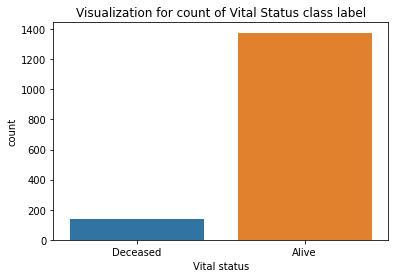

In [ ]:
sns.countplot(df['Vital status'])
plt.title("Visualization for count of Vital Status class label")
plt.show()
sns.set(rc={'figure.figsize':(12,8)}, font_scale=1.2)

In [ ]:
Counter(df['Vital status'])

Counter({'Alive': 1377, 'Deceased': 136})

In [ ]:
df['Vital status'] = np.where((df['Vital status']=='Deceased'),0,1)

In [ ]:
gender_dummy = pd.get_dummies(df['Gender'], drop_first=True)

In [ ]:
gender_dummy


,Male
0,0
1,1
2,1
3,0
4,0
...,...
1508,0
1509,1
1510,1
1511,1


In [ ]:
df['Gender'] = gender_dummy

In [ ]:
df.head()

,Gender,Age at diagnosis,Vital status,Haematocrit,Hemoglobin,MCHC,MCH,MCV,MPV,RBC,Platelet_count,RDW,WBC,CXR zone 1,CXR zone 2,CXR zone 3,CXR zone 4,CXR zone 5,CXR zone 6,CXR zone 7,CXR zone 8,CXR zone 9,CXR zone 10,CXR zone 11,CXR zone 12,cancer_ICD-10_C00-C97,chronic_ischaemic_heart_disease_coronary_artery_disease_ICD-10_I25_I250-I259,hypertension_ICD-10_I10,asthma_ICD-10_J45_J450-J459,chronic_obstructive_pulmonary_disease_ICD-10_J44_J440-J449,type_2_diabetes_mellitus_ICD-10_E11,liver_cirrhosis_ICD-10_K74_K740-K746,chronic_viral_hepatitis_B_ICD-10_B181,chronic_viral_hepatitis_C_ICD-10_B182,chronic_kidney_disease_all_stages_ICD-10N18_N181-N189
0,0,59.964384,0,0.378,119,315,29.3,92.9,8.5,4.07,249,14.9,2.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0
1,1,69.257534,1,0.404,130,321,27.2,84.8,7.0,4.76,179,13.1,8.66,1,1,2,2,2,2,1,1,1,2,2,2,0,0,1,0,0,0,0,0,0,0
2,1,62.446575,1,0.308,97,314,18.7,59.7,7.8,5.17,244,9.9,5.61,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0
3,0,72.002740,1,0.431,135,314,27.3,87.0,9.1,4.96,294,12.8,5.46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,86.983562,1,0.504,161,319,28.3,88.8,8.7,5.68,224,13.7,6.04,0,0,1,0,1,1,0,1,0,1,1,1,0,0,1,0,1,1,0,0,0,0


In [ ]:
df.columns

Index(['Gender', 'Age at diagnosis', 'Vital status', 'Haematocrit',
       'Hemoglobin', 'MCHC', 'MCH', 'MCV', 'MPV', 'RBC', 'Platelet_count',
       'RDW', 'WBC', 'CXR zone 1', 'CXR zone 2', 'CXR zone 3', 'CXR zone 4',
       'CXR zone 5', 'CXR zone 6', 'CXR zone 7', 'CXR zone 8', 'CXR zone 9',
       'CXR zone 10', 'CXR zone 11', 'CXR zone 12', 'cancer_ICD-10_C00-C97',
       'chronic_ischaemic_heart_disease_coronary_artery_disease_ICD-10_I25_I250-I259',
       'hypertension_ICD-10_I10', 'asthma_ICD-10_J45_J450-J459',
       'chronic_obstructive_pulmonary_disease_ICD-10_J44_J440-J449',
       'type_2_diabetes_mellitus_ICD-10_E11',
       'liver_cirrhosis_ICD-10_K74_K740-K746',
       'chronic_viral_hepatitis_B_ICD-10_B181',
       'chronic_viral_hepatitis_C_ICD-10_B182',
       'chronic_kidney_disease_all_stages_ICD-10N18_N181-N189'],
      dtype='object')

In [ ]:
indicators = ['Gender', 'Age at diagnosis', 'Haematocrit',
       'Hemoglobin', 'MCHC', 'MCH', 'MCV', 'MPV', 'RBC', 'Platelet_count',
       'RDW', 'WBC', 'CXR zone 1', 'CXR zone 2', 'CXR zone 3', 'CXR zone 4',
       'CXR zone 5', 'CXR zone 6', 'CXR zone 7', 'CXR zone 8', 'CXR zone 9',
       'CXR zone 10', 'CXR zone 11', 'CXR zone 12', 'cancer_ICD-10_C00-C97',
       'chronic_ischaemic_heart_disease_coronary_artery_disease_ICD-10_I25_I250-I259',
       'hypertension_ICD-10_I10', 'asthma_ICD-10_J45_J450-J459',
       'chronic_obstructive_pulmonary_disease_ICD-10_J44_J440-J449',
       'type_2_diabetes_mellitus_ICD-10_E11',
       'liver_cirrhosis_ICD-10_K74_K740-K746',
       'chronic_viral_hepatitis_B_ICD-10_B181',
       'chronic_viral_hepatitis_C_ICD-10_B182',
       'chronic_kidney_disease_all_stages_ICD-10N18_N181-N189']

target_columns = ['Vital status']

features = df[indicators]
targets = df[target_columns]
display(features.head(), targets.head())      

,Gender,Age at diagnosis,Haematocrit,Hemoglobin,MCHC,MCH,MCV,MPV,RBC,Platelet_count,RDW,WBC,CXR zone 1,CXR zone 2,CXR zone 3,CXR zone 4,CXR zone 5,CXR zone 6,CXR zone 7,CXR zone 8,CXR zone 9,CXR zone 10,CXR zone 11,CXR zone 12,cancer_ICD-10_C00-C97,chronic_ischaemic_heart_disease_coronary_artery_disease_ICD-10_I25_I250-I259,hypertension_ICD-10_I10,asthma_ICD-10_J45_J450-J459,chronic_obstructive_pulmonary_disease_ICD-10_J44_J440-J449,type_2_diabetes_mellitus_ICD-10_E11,liver_cirrhosis_ICD-10_K74_K740-K746,chronic_viral_hepatitis_B_ICD-10_B181,chronic_viral_hepatitis_C_ICD-10_B182,chronic_kidney_disease_all_stages_ICD-10N18_N181-N189
0,0,59.964384,0.378,119,315,29.3,92.9,8.5,4.07,249,14.9,2.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0
1,1,69.257534,0.404,130,321,27.2,84.8,7.0,4.76,179,13.1,8.66,1,1,2,2,2,2,1,1,1,2,2,2,0,0,1,0,0,0,0,0,0,0
2,1,62.446575,0.308,97,314,18.7,59.7,7.8,5.17,244,9.9,5.61,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0
3,0,72.002740,0.431,135,314,27.3,87.0,9.1,4.96,294,12.8,5.46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,86.983562,0.504,161,319,28.3,88.8,8.7,5.68,224,13.7,6.04,0,0,1,0,1,1,0,1,0,1,1,1,0,0,1,0,1,1,0,0,0,0


,Vital status
0,0
1,1
2,1
3,1
4,1


### Feature Engineering

In [ ]:
continuous_variables = ['Age at diagnosis','Haematocrit','Hemoglobin','MCHC','MCH','MCV','MPV','RBC','Platelet_count',
                        'RDW','WBC']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


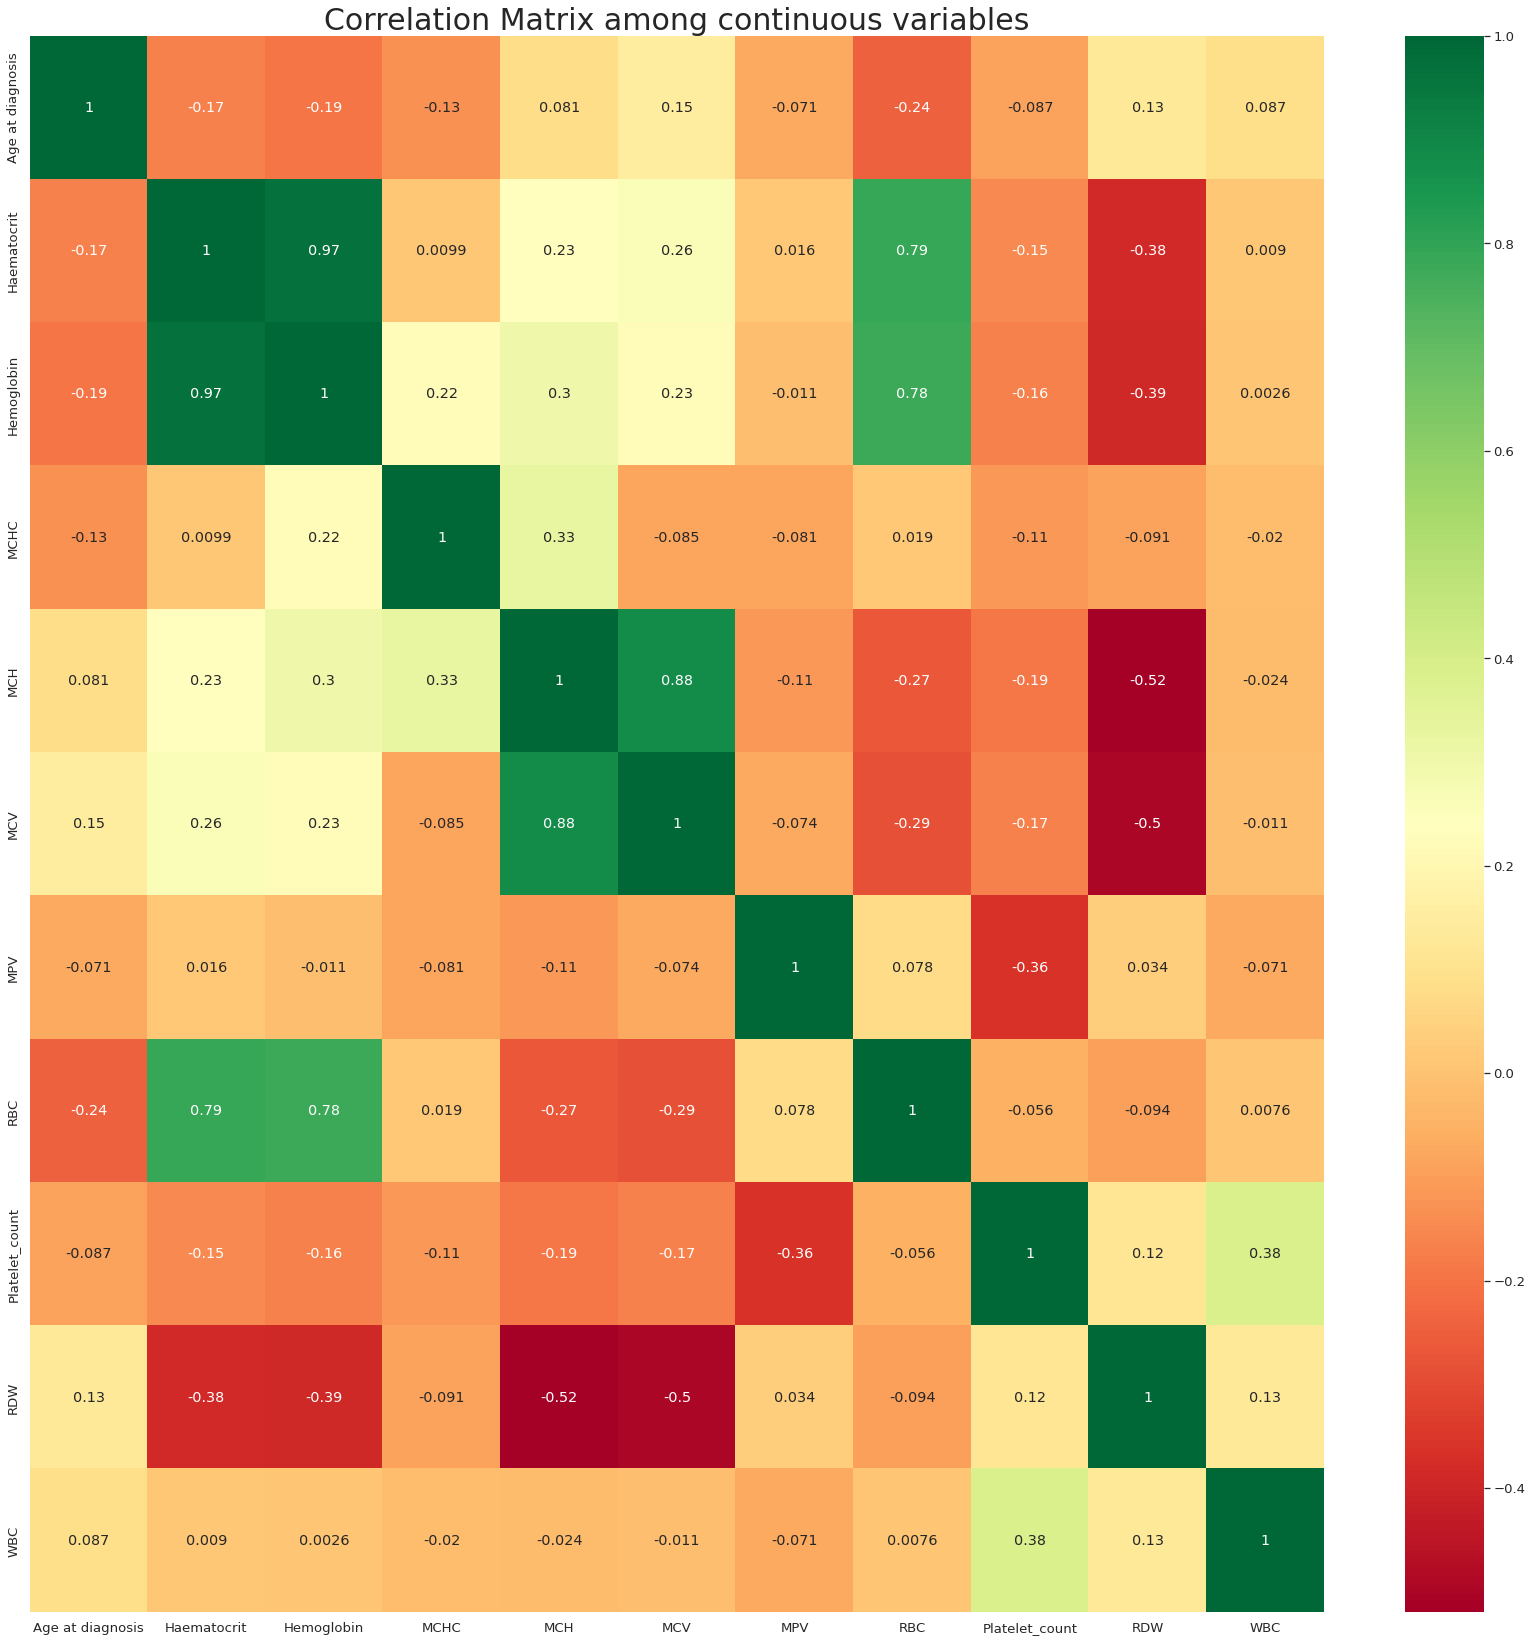

In [ ]:
#Creating the Correlation plot for only Continuous variables

corrmat = df[continuous_variables].corr(method = "spearman")
plt.figure(figsize=(29,29))
#plot heat map
g=sns.heatmap(corrmat,annot=True, cmap="RdYlGn")
ax = plt.axes()
ax.set_title('Correlation Matrix among continuous variables', fontsize=30)
fig = g.get_figure()
fig.savefig("heatmap.jpg", dpi = 100)

In [ ]:
df.drop(['Haematocrit','MCV'], axis=1, inplace=True)

### Handling class imbalance

In [ ]:
x = df.drop('Vital status', axis=1)
y = df['Vital status']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=40, test_size=.20)

In [ ]:
#Counting No. of classes in 'Class' variable
counter = Counter(y_train)
print(counter)

Counter({1: 1098, 0: 112})


In [ ]:
#Making the in 'target' variable Balanced using SMOTE method.

oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)

In [ ]:
#Counting No. of classes in 'Class' variable after balancing the Data

counter = Counter(y_train)
print(counter)

Counter({1: 1098, 0: 1098})


In [ ]:
#Checking dimensions of X & Y

x_train.shape, y_train.shape

((2196, 32), (2196,))

In [ ]:
x_train.head()

,Gender,Age at diagnosis,Hemoglobin,MCHC,MCH,MPV,RBC,Platelet_count,RDW,WBC,CXR zone 1,CXR zone 2,CXR zone 3,CXR zone 4,CXR zone 5,CXR zone 6,CXR zone 7,CXR zone 8,CXR zone 9,CXR zone 10,CXR zone 11,CXR zone 12,cancer_ICD-10_C00-C97,chronic_ischaemic_heart_disease_coronary_artery_disease_ICD-10_I25_I250-I259,hypertension_ICD-10_I10,asthma_ICD-10_J45_J450-J459,chronic_obstructive_pulmonary_disease_ICD-10_J44_J440-J449,type_2_diabetes_mellitus_ICD-10_E11,liver_cirrhosis_ICD-10_K74_K740-K746,chronic_viral_hepatitis_B_ICD-10_B181,chronic_viral_hepatitis_C_ICD-10_B182,chronic_kidney_disease_all_stages_ICD-10N18_N181-N189
0,0,70.232877,138,307,27.2,8.3,5.06,231,13.2,8.20,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,0,1,0,0,0,0
1,1,38.169863,153,332,28.8,9.6,5.33,64,12.5,3.67,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
2,1,63.802740,161,331,27.8,8.0,5.80,244,13.7,2.93,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,71.805479,142,325,28.2,9.1,5.03,149,13.8,3.08,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
4,0,57.052055,146,320,28.5,10.4,5.14,246,13.2,6.56,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0


In [ ]:
df.to_csv('new_data.csv')

In [ ]:
# MICE, KNN, LOCF, Mean/Mode

#Accuracy array
lr_model_acc = np.empty((4, 4), float)
rf_model_acc = np.empty((4, 4), float)
svm_model_acc = np.empty((4, 4), float)
xgb_model_acc = np.empty((4, 4), float)
dt_model_acc = np.empty((4,4), float)
nb_model_acc = np.empty((4,4), float)

In [ ]:
# MICE, KNN, LOCF, Mean/Mode

#Sensitivity array
lr_model_sen = np.empty((4, 4), float)
rf_model_sen = np.empty((4, 4), float)
svm_model_sen = np.empty((4, 4), float)
xgb_model_sen = np.empty((4, 4), float)
dt_model_sen = np.empty((4,4), float)
nb_model_sen = np.empty((4,4), float)

In [ ]:
# MICE, KNN, LOCF, Mean/Mode

#auc array
lr_model_auc = np.empty((4, 4), float)
rf_model_auc = np.empty((4, 4), float)
svm_model_auc = np.empty((4, 4), float)
xgb_model_auc = np.empty((4, 4), float)
dt_model_auc = np.empty((4,4), float)
nb_model_auc = np.empty((4,4), float)

In [ ]:
# MICE, KNN, LOCF, Mean/Mode

#spe array
lr_model_spe = np.empty((4, 4), float)
rf_model_spe = np.empty((4, 4), float)
svm_model_spe = np.empty((4, 4), float)
xgb_model_spe = np.empty((4, 4), float)
dt_model_spe = np.empty((4,4), float)
nb_model_spe= np.empty((4,4), float)

## Scenario 1 : without missing values

### Logistic Regression

In [ ]:
x_train.shape, y_train.shape

((2196, 32), (2196,))

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred = lr_model.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.7326732673267327


In [ ]:
cm = confusion_matrix(y_test,y_pred)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.7326732673267327
Sensitivity :  0.6666666666666666
Specificity :  0.7383512544802867


In [ ]:
# Storing the Accuracy in Accuracy matrix

lr_model_acc[0][0] = lr_model_acc[1][0] = lr_model_acc[2][0] = lr_model_acc[3][0] = accuracy
lr_model_acc

array([[0.73267327, 0.        , 0.        , 0.        ],
       [0.73267327, 0.        , 0.        , 0.        ],
       [0.73267327, 0.        , 0.        , 0.        ],
       [0.73267327, 0.        , 0.        , 0.        ]])

In [ ]:
# Storing the Sensitivity in Sensitivity matrix

lr_model_sen[0][0] = lr_model_sen[1][0] = lr_model_sen[2][0] = lr_model_sen[3][0] = sensitivity
lr_model_sen

array([[6.66666667e-001, 1.03977794e-312, 1.03977794e-312,
        9.54898106e-313],
       [6.66666667e-001, 1.03977794e-312, 1.23075756e-312,
        1.20953760e-312],
       [6.66666667e-001, 9.76118064e-313, 1.10343781e-312,
        1.03977794e-312],
       [6.66666667e-001, 4.44659081e-322, 0.00000000e+000,
        0.00000000e+000]])

In [ ]:
# Storing the Specificity  matrix

lr_model_spe[0][0] = lr_model_spe[1][0] = lr_model_spe[2][0] = lr_model_spe[3][0] = specificity 
lr_model_sen

array([[6.66666667e-001, 1.03977794e-312, 1.03977794e-312,
        9.54898106e-313],
       [6.66666667e-001, 1.03977794e-312, 1.23075756e-312,
        1.20953760e-312],
       [6.66666667e-001, 9.76118064e-313, 1.10343781e-312,
        1.03977794e-312],
       [6.66666667e-001, 4.44659081e-322, 0.00000000e+000,
        0.00000000e+000]])

In [ ]:
# Storing the ROC-AUC in ROC-AUC matrix

lr_probs = lr_model.predict_proba(x_test)
lr_auc_none = roc_auc_score(y_test, lr_probs[:,1])
lr_model_auc[0][0] = lr_model_auc[1][0] = lr_model_auc[2][0] = lr_model_auc[3][0] = lr_auc_none
lr_model_auc

array([[7.50149343e-001, 1.03977794e-312, 1.03977794e-312,
        9.54898106e-313],
       [7.50149343e-001, 1.03977794e-312, 1.23075756e-312,
        1.20953760e-312],
       [7.50149343e-001, 9.76118064e-313, 1.10343781e-312,
        1.18831764e-312],
       [7.50149343e-001, 3.44981226e+175, 6.81019663e-310,
        1.97626258e-323]])

### Random Forest

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf_model.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.8547854785478548


In [ ]:
cm = confusion_matrix(y_test,y_pred)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.8547854785478548
Sensitivity :  0.125
Specificity :  0.9175627240143369


In [ ]:
rf_model_acc[0][0] = rf_model_acc[1][0] = rf_model_acc[2][0] = rf_model_acc[3][0] = accuracy
rf_model_acc

array([[8.54785479e-001, 4.94065646e-324, 9.88131292e-324,
        1.48219694e-323],
       [8.54785479e-001, 2.47032823e-323, 2.96439388e-323,
        3.45845952e-323],
       [8.54785479e-001, 1.28457068e-322, 1.33397724e-322,
        1.38338381e-322],
       [8.54785479e-001, 1.48219694e-322, 1.53160350e-322,
        1.58101007e-322]])

In [ ]:
rf_model_sen[0][0] = rf_model_sen[1][0] = rf_model_sen[2][0] = rf_model_sen[3][0] = sensitivity
rf_model_sen

array([[0.125, 0.   , 0.   , 0.   ],
       [0.125, 0.   , 0.   , 0.   ],
       [0.125, 0.   , 0.   , 0.   ],
       [0.125, 0.   , 0.   , 0.   ]])

In [ ]:
rf_model_spe[0][0] = rf_model_spe[1][0] = rf_model_spe[2][0] = rf_model_spe[3][0] = specificity  
rf_model_spe

array([[0.91756272, 0.        , 0.        , 0.        ],
       [0.91756272, 0.        , 0.        , 0.        ],
       [0.91756272, 0.        , 0.        , 0.        ],
       [0.91756272, 0.        , 0.        , 0.        ]])

In [ ]:
rf_probs = rf_model.predict_proba(x_test)
rf_auc_none = roc_auc_score(y_test, rf_probs[:,1])
rf_model_auc[0][0] = rf_model_auc[1][0] = rf_model_auc[2][0] = rf_model_auc[3][0] = rf_auc_none
rf_model_auc

array([[7.33870968e-001, 3.85371204e-322, 0.00000000e+000,
        0.00000000e+000],
       [7.33870968e-001, 1.50008929e+248, 4.31174539e-096,
        9.80058441e+252],
       [7.33870968e-001, 1.05206244e-153, 9.03292329e+271,
        9.08366793e+223],
       [7.33870968e-001, 3.44981369e+175, 6.81019663e-310,
        0.00000000e+000]])

### SVM Model

In [ ]:
svm_model = svm.SVC(probability=True)
svm_model.fit(x_train, y_train)

SVC(probability=True)

In [ ]:
y_pred = svm_model.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.6336633663366337


In [ ]:
cm = confusion_matrix(y_test,y_pred)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.6336633663366337
Sensitivity :  0.7916666666666666
Specificity :  0.6200716845878136


In [ ]:
svm_model_acc[0][0] = svm_model_acc[1][0] = svm_model_acc[2][0] = svm_model_acc[3][0] = accuracy
svm_model_acc

array([[6.33663366e-001, 4.94065646e-324, 9.88131292e-324,
        1.48219694e-323],
       [6.33663366e-001, 2.47032823e-323, 2.96439388e-323,
        3.45845952e-323],
       [6.33663366e-001, 4.94065646e-323, 5.43472210e-323,
        5.92878775e-323],
       [6.33663366e-001, 6.91691904e-323, 7.41098469e-323,
        7.90505033e-323]])

In [ ]:
svm_model_sen[0][0] = svm_model_sen[1][0] = svm_model_sen[2][0] = svm_model_sen[3][0] = sensitivity
svm_model_sen

array([[0.79166667, 0.        , 0.        , 0.        ],
       [0.79166667, 0.        , 0.        , 0.        ],
       [0.79166667, 0.        , 0.        , 0.        ],
       [0.79166667, 0.        , 0.        , 0.        ]])

In [ ]:
svm_model_spe[0][0] = svm_model_spe[1][0] = svm_model_spe[2][0] = svm_model_spe[3][0] = specificity 
svm_model_spe

array([[0.62007168, 0.        , 0.        , 0.        ],
       [0.62007168, 0.        , 0.        , 0.        ],
       [0.62007168, 0.        , 0.        , 0.        ],
       [0.62007168, 0.        , 0.        , 0.        ]])

In [ ]:
svm_probs = svm_model.predict_proba(x_test)
svm_auc_none = roc_auc_score(y_test, svm_probs[:,1])
svm_model_auc[0][0] = svm_model_auc[1][0] = svm_model_auc[2][0] = svm_model_auc[3][0] = svm_auc_none
svm_model_auc

array([[7.73894863e-001, 3.85371204e-322, 0.00000000e+000,
        0.00000000e+000],
       [7.73894863e-001, 1.50008929e+248, 4.31174539e-096,
        9.80058441e+252],
       [7.73894863e-001, 1.05220811e-153, 9.03292329e+271,
        9.08366793e+223],
       [7.73894863e-001, 3.44981369e+175, 6.81019663e-310,
        0.00000000e+000]])

### XGBoost Model

In [ ]:
XG_model = XGBClassifier()
XG_model.fit(x_train, y_train)

XGBClassifier()

In [ ]:
y_pred_xgb = XG_model.predict(x_test)
print(round(accuracy_score(y_test,y_pred_xgb),4))

0.8086


In [ ]:
cm = confusion_matrix(y_test,y_pred_xgb)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.8085808580858086
Sensitivity :  0.4166666666666667
Specificity :  0.8422939068100358


In [ ]:
xgb_model_acc[0][0] = xgb_model_acc[1][0] = xgb_model_acc[2][0] = xgb_model_acc[3][0] = accuracy
xgb_model_acc

array([[8.08580858e-001, 1.03977794e-312, 1.03977794e-312,
        9.54898106e-313],
       [8.08580858e-001, 1.03977794e-312, 1.23075756e-312,
        1.20953760e-312],
       [8.08580858e-001, 9.76118064e-313, 1.10343781e-312,
        1.08221785e-312],
       [8.08580858e-001, 4.44659081e-322, 0.00000000e+000,
        0.00000000e+000]])

In [ ]:
xgb_model_sen[0][0] = xgb_model_sen[1][0] = xgb_model_sen[2][0] = xgb_model_sen[3][0] = sensitivity
xgb_model_sen

array([[4.16666667e-001, 1.03977794e-312, 1.03977794e-312,
        9.54898106e-313],
       [4.16666667e-001, 1.03977794e-312, 1.23075756e-312,
        1.20953760e-312],
       [4.16666667e-001, 9.76118064e-313, 1.08221785e-312,
        1.16709769e-312],
       [4.16666667e-001, 4.44659081e-322, 0.00000000e+000,
        0.00000000e+000]])

In [ ]:
xgb_model_spe[0][0] = xgb_model_spe[1][0] = xgb_model_spe[2][0] = xgb_model_spe[3][0] = specificity 
xgb_model_spe

array([[0.84229391, 0.        , 0.        , 0.        ],
       [0.84229391, 0.        , 0.        , 0.        ],
       [0.84229391, 0.        , 0.        , 0.        ],
       [0.84229391, 0.        , 0.        , 0.        ]])

In [ ]:
xg_probs = XG_model.predict_proba(x_test)
xgb_auc_none = roc_auc_score(y_test, xg_probs[:,1])
xgb_model_auc[0][0] = xgb_model_auc[1][0] = xgb_model_auc[2][0] = xgb_model_auc[3][0] = xgb_auc_none
xgb_model_auc

array([[6.83094385e-001, 3.85371204e-322, 0.00000000e+000,
        0.00000000e+000],
       [6.83094385e-001, 1.50008929e+248, 4.31174539e-096,
        9.80058441e+252],
       [6.83094385e-001, 1.05235379e-153, 9.03292329e+271,
        9.08366793e+223],
       [6.83094385e-001, 3.44981369e+175, 6.81019663e-310,
        0.00000000e+000]])

### Decision Tree

In [ ]:
dt_model =  DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dt = dt_model.predict(x_test)
print(round(accuracy_score(y_test,y_pred_dt),4))

0.802


In [ ]:
cm = confusion_matrix(y_test,y_pred_dt)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.801980198019802
Sensitivity :  0.25
Specificity :  0.8494623655913979


In [ ]:
dt_model_acc[0][0] = dt_model_acc[1][0] = dt_model_acc[2][0] = dt_model_acc[3][0] = accuracy
dt_model_acc

array([[0.8019802, 0.       , 0.       , 0.       ],
       [0.8019802, 0.       , 0.       , 0.       ],
       [0.8019802, 0.       , 0.       , 0.       ],
       [0.8019802, 0.       , 0.       , 0.       ]])

In [ ]:
dt_model_sen[0][0] = dt_model_sen[1][0] = dt_model_sen[2][0] = dt_model_sen[3][0] = sensitivity
dt_model_sen

array([[2.50000000e-001, 3.85371204e-322, 0.00000000e+000,
        0.00000000e+000],
       [2.50000000e-001, 1.50008929e+248, 4.31174539e-096,
        9.80058441e+252],
       [2.50000000e-001, 1.05147976e-153, 9.03292329e+271,
        9.08366793e+223],
       [2.50000000e-001, 3.44981369e+175, 6.81019663e-310,
        0.00000000e+000]])

In [ ]:
dt_model_spe[0][0] = dt_model_spe[1][0] = dt_model_spe[2][0] = dt_model_spe[3][0] = specificity 
dt_model_spe

array([[0.84946237, 0.        , 0.        , 0.        ],
       [0.84946237, 0.        , 0.        , 0.        ],
       [0.84946237, 0.        , 0.        , 0.        ],
       [0.84946237, 0.        , 0.        , 0.        ]])

In [ ]:
dt_probs = dt_model.predict_proba(x_test)
dt_auc_none = roc_auc_score(y_test, dt_probs[:,1])
dt_model_auc[0][0] = dt_model_auc[1][0] = dt_model_auc[2][0] = dt_model_auc[3][0] = dt_auc_none
dt_model_auc

array([[0.54973118, 0.        , 0.        , 0.        ],
       [0.54973118, 0.        , 0.        , 0.        ],
       [0.54973118, 0.        , 0.        , 0.        ],
       [0.54973118, 0.        , 0.        , 0.        ]])

### Naive Bayes Model

In [ ]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred_nb = nb_model.predict(x_test)
print(round(accuracy_score(y_test,y_pred_nb),4))

0.4917


In [ ]:
cm = confusion_matrix(y_test,y_pred_nb)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.49174917491749176
Sensitivity :  0.5416666666666666
Specificity :  0.4874551971326165


In [ ]:
nb_model_acc[0][0] = nb_model_acc[1][0] = nb_model_acc[2][0] = nb_model_acc[3][0] = accuracy
nb_model_acc

array([[0.49174917, 0.        , 0.        , 0.        ],
       [0.49174917, 0.        , 0.        , 0.        ],
       [0.49174917, 0.        , 0.        , 0.        ],
       [0.49174917, 0.        , 0.        , 0.        ]])

In [ ]:
nb_model_sen[0][0] = nb_model_sen[1][0] = nb_model_sen[2][0] = nb_model_sen[3][0] = sensitivity
nb_model_sen

array([[5.41666667e-001, 3.85371204e-322, 0.00000000e+000,
        0.00000000e+000],
       [5.41666667e-001, 1.50008929e+248, 4.31174539e-096,
        9.80058441e+252],
       [5.41666667e-001, 1.05162543e-153, 9.03292329e+271,
        9.08366793e+223],
       [5.41666667e-001, 3.44981369e+175, 6.81019663e-310,
        0.00000000e+000]])

In [ ]:
nb_model_spe[0][0] = nb_model_spe[1][0] = nb_model_spe[2][0] = nb_model_spe[3][0] = specificity
nb_model_spe

array([[0.4874552, 0.       , 0.       , 0.       ],
       [0.4874552, 0.       , 0.       , 0.       ],
       [0.4874552, 0.       , 0.       , 0.       ],
       [0.4874552, 0.       , 0.       , 0.       ]])

In [ ]:
nb_probs = nb_model.predict_proba(x_test)
nb_auc_none = roc_auc_score(y_test, nb_probs[:,1])
nb_model_auc[0][0] = nb_model_auc[1][0] = nb_model_auc[2][0] = nb_model_auc[3][0] = nb_auc_none
nb_model_auc

array([[0.50724313, 0.        , 0.        , 0.        ],
       [0.50724313, 0.        , 0.        , 0.        ],
       [0.50724313, 0.        , 0.        , 0.        ],
       [0.50724313, 0.        , 0.        , 0.        ]])

## MCAR Missing values

In [ ]:
data_missing_5 = x.copy()
data_missing_15 = x.copy()
data_missing_30 = x.copy()

In [ ]:
for col in data_missing_5.columns:
    data_missing_5.loc[data_missing_5.sample(frac=0.05).index, col] = np.nan
    
for col in data_missing_15.columns:
    data_missing_15.loc[data_missing_15.sample(frac=0.15).index, col] = np.nan
    
for col in data_missing_30.columns:
    data_missing_30.loc[data_missing_30.sample(frac=0.30).index, col] = np.nan

In [ ]:
data_missing_30.head(20)

,Gender,Age at diagnosis,Hemoglobin,MCHC,MCH,MPV,RBC,Platelet_count,RDW,WBC,CXR zone 1,CXR zone 2,CXR zone 3,CXR zone 4,CXR zone 5,CXR zone 6,CXR zone 7,CXR zone 8,CXR zone 9,CXR zone 10,CXR zone 11,CXR zone 12,cancer_ICD-10_C00-C97,chronic_ischaemic_heart_disease_coronary_artery_disease_ICD-10_I25_I250-I259,hypertension_ICD-10_I10,asthma_ICD-10_J45_J450-J459,chronic_obstructive_pulmonary_disease_ICD-10_J44_J440-J449,type_2_diabetes_mellitus_ICD-10_E11,liver_cirrhosis_ICD-10_K74_K740-K746,chronic_viral_hepatitis_B_ICD-10_B181,chronic_viral_hepatitis_C_ICD-10_B182,chronic_kidney_disease_all_stages_ICD-10N18_N181-N189
0,0.0,59.964384,NaN,NaN,29.3,8.5,NaN,249.0,NaN,2.98,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,NaN,1.0,0.0,NaN,0.0,0.0
1,1.0,69.257534,NaN,321.0,27.2,7.0,NaN,NaN,13.1,8.66,NaN,1.0,NaN,2.0,NaN,2.0,1.0,1.0,1.0,2.0,2.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
2,1.0,NaN,97.0,314.0,18.7,7.8,5.17,244.0,9.9,5.61,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,0.0,0.0,0.0,NaN
3,0.0,NaN,135.0,NaN,NaN,NaN,4.96,NaN,12.8,5.46,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0
4,0.0,86.983562,161.0,319.0,28.3,NaN,NaN,NaN,13.7,6.04,0.0,0.0,NaN,NaN,1.0,NaN,0.0,1.0,0.0,NaN,1.0,1.0,0.0,NaN,1.0,NaN,1.0,1.0,0.0,NaN,0.0,0.0
5,NaN,69.260274,NaN,NaN,26.9,9.0,NaN,362.0,NaN,7.58,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0
6,NaN,65.293151,131.0,311.0,27.0,9.5,NaN,98.0,NaN,3.09,0.0,0.0,NaN,0.0,NaN,1.0,0.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,0.0,65.331507,146.0,301.0,NaN,NaN,5.21,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,1.0,0.0,0.0,NaN,0.0
8,0.0,NaN,131.0,NaN,NaN,8.6,4.73,221.0,13.2,NaN,NaN,NaN,1.0,0.0,0.0,NaN,0.0,NaN,1.0,NaN,NaN,1.0,0.0,0.0,1.0,NaN,0.0,1.0,0.0,0.0,0.0,NaN
9,1.0,53.975342,NaN,NaN,30.7,8.3,5.24,206.0,NaN,5.70,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN


In [ ]:
data_missing_5.isnull().sum()/len(data_missing_5)

Gender                                                                          0.050231
Age at diagnosis                                                                0.050231
Hemoglobin                                                                      0.050231
MCHC                                                                            0.050231
MCH                                                                             0.050231
MPV                                                                             0.050231
RBC                                                                             0.050231
Platelet_count                                                                  0.050231
RDW                                                                             0.050231
WBC                                                                             0.050231
CXR zone 1                                                                      0.050231
CXR zone 2           

In [ ]:
data_missing_15.isnull().sum()/len(data_missing_15)

Gender                                                                          0.150033
Age at diagnosis                                                                0.150033
Hemoglobin                                                                      0.150033
MCHC                                                                            0.150033
MCH                                                                             0.150033
MPV                                                                             0.150033
RBC                                                                             0.150033
Platelet_count                                                                  0.150033
RDW                                                                             0.150033
WBC                                                                             0.150033
CXR zone 1                                                                      0.150033
CXR zone 2           

In [ ]:
data_missing_30.isnull().sum() / len(data_missing_30)

Gender                                                                          0.300066
Age at diagnosis                                                                0.300066
Hemoglobin                                                                      0.300066
MCHC                                                                            0.300066
MCH                                                                             0.300066
MPV                                                                             0.300066
RBC                                                                             0.300066
Platelet_count                                                                  0.300066
RDW                                                                             0.300066
WBC                                                                             0.300066
CXR zone 1                                                                      0.300066
CXR zone 2           

In [ ]:
data_missing_5 = pd.concat([data_missing_5, y], axis=1)
data_missing_15 = pd.concat([data_missing_15, y], axis=1)
data_missing_30 = pd.concat([data_missing_30, y], axis=1)

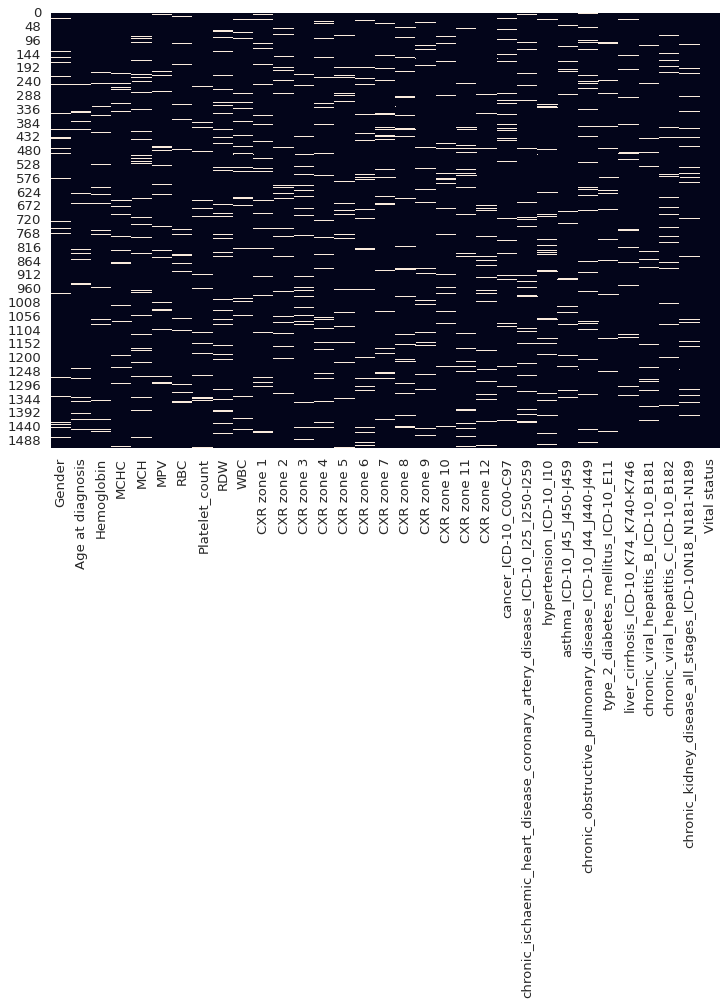

In [ ]:
missing_values_5_pattern = sns.heatmap(data_missing_5.isnull(), cbar=False)
fig1 = missing_values_5_pattern.get_figure()
fig1.savefig("Missing_values_5_pattern")

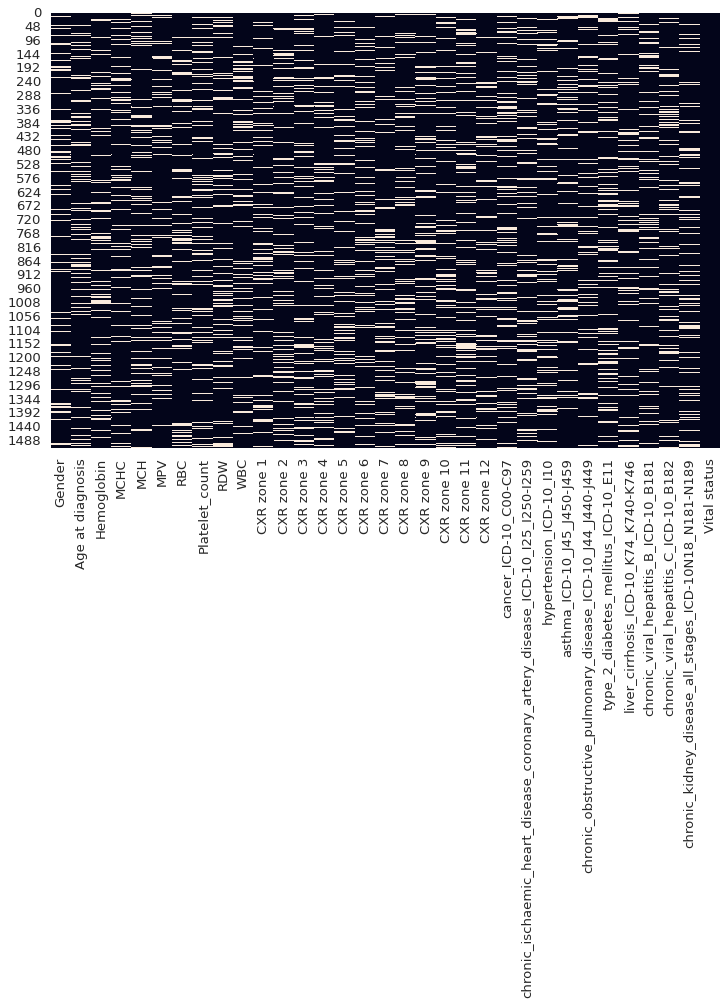

In [ ]:
missing_values_15_pattern = sns.heatmap(data_missing_15.isnull(), cbar=False)
fig2 = missing_values_15_pattern.get_figure()
fig2.savefig("Missing_values_15_pattern")

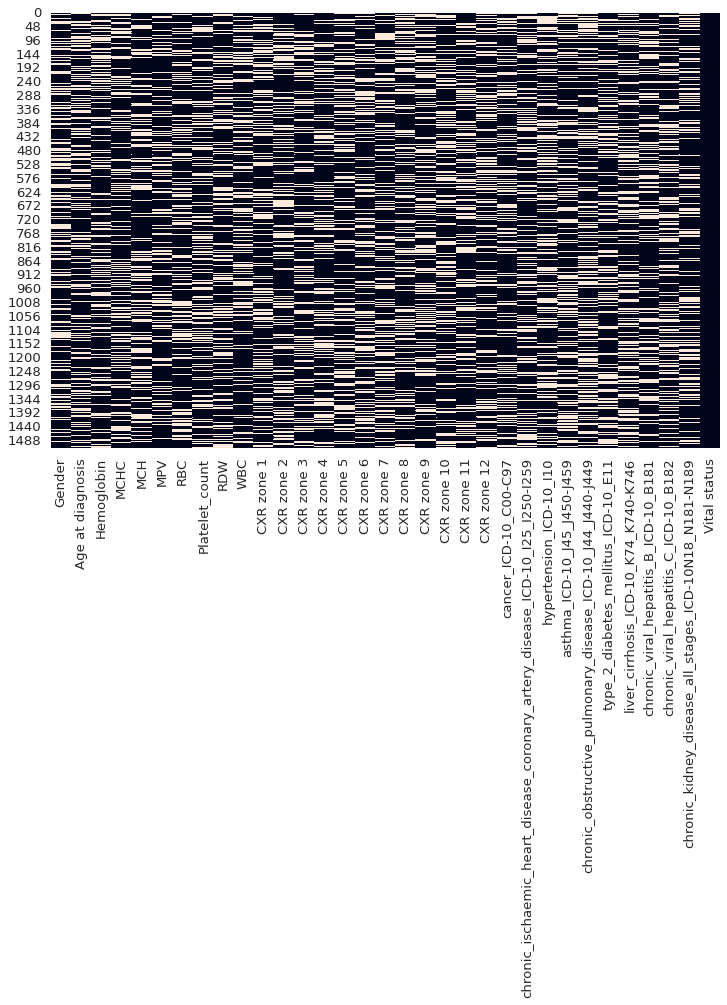

In [ ]:
missing_values_30_pattern = sns.heatmap(data_missing_30.isnull(), cbar=False)
fig3 = missing_values_30_pattern.get_figure()
fig3.savefig("Missing_values_30_pattern")

In [ ]:
data_missing_15.columns

Index(['Gender', 'Age at diagnosis', 'Hemoglobin', 'MCHC', 'MCH', 'MPV', 'RBC',
       'Platelet_count', 'RDW', 'WBC', 'CXR zone 1', 'CXR zone 2',
       'CXR zone 3', 'CXR zone 4', 'CXR zone 5', 'CXR zone 6', 'CXR zone 7',
       'CXR zone 8', 'CXR zone 9', 'CXR zone 10', 'CXR zone 11', 'CXR zone 12',
       'cancer_ICD-10_C00-C97',
       'chronic_ischaemic_heart_disease_coronary_artery_disease_ICD-10_I25_I250-I259',
       'hypertension_ICD-10_I10', 'asthma_ICD-10_J45_J450-J459',
       'chronic_obstructive_pulmonary_disease_ICD-10_J44_J440-J449',
       'type_2_diabetes_mellitus_ICD-10_E11',
       'liver_cirrhosis_ICD-10_K74_K740-K746',
       'chronic_viral_hepatitis_B_ICD-10_B181',
       'chronic_viral_hepatitis_C_ICD-10_B182',
       'chronic_kidney_disease_all_stages_ICD-10N18_N181-N189',
       'Vital status'],
      dtype='object')

In [ ]:
data_missing_5.shape, data_missing_15.shape, data_missing_30.shape

((1513, 33), (1513, 33), (1513, 33))

### 1.) MICEForest Imputation method

In [ ]:
# Create kernel. 
kds_1 = mf.ImputationKernel(data_missing_5,save_all_iterations=True,random_state=1991)
kds_2 = mf.ImputationKernel(data_missing_15,save_all_iterations=True,random_state=1991)
kds_3 = mf.ImputationKernel(data_missing_30,save_all_iterations=True,random_state=1991)

# Run the MICE algorithm for 3 iterations
kds_1.mice(3)
kds_2.mice(3)
kds_3.mice(3)


In [ ]:
data_missing_5_rf = kds_1.complete_data(dataset=0, inplace=False)
print(data_missing_5_rf.isnull().sum(0))

Gender                                                                          0
Age at diagnosis                                                                0
Hemoglobin                                                                      0
MCHC                                                                            0
MCH                                                                             0
MPV                                                                             0
RBC                                                                             0
Platelet_count                                                                  0
RDW                                                                             0
WBC                                                                             0
CXR zone 1                                                                      0
CXR zone 2                                                                      0
CXR zone 3      

In [ ]:
data_missing_15_rf = kds_2.complete_data(dataset=0, inplace=False)
print(data_missing_15_rf.isnull().sum(0))

Gender                                                                          0
Age at diagnosis                                                                0
Hemoglobin                                                                      0
MCHC                                                                            0
MCH                                                                             0
MPV                                                                             0
RBC                                                                             0
Platelet_count                                                                  0
RDW                                                                             0
WBC                                                                             0
CXR zone 1                                                                      0
CXR zone 2                                                                      0
CXR zone 3      

In [ ]:
data_missing_30_rf = kds_3.complete_data(dataset=0, inplace=False)
print(data_missing_30_rf.isnull().sum(0))

Gender                                                                          0
Age at diagnosis                                                                0
Hemoglobin                                                                      0
MCHC                                                                            0
MCH                                                                             0
MPV                                                                             0
RBC                                                                             0
Platelet_count                                                                  0
RDW                                                                             0
WBC                                                                             0
CXR zone 1                                                                      0
CXR zone 2                                                                      0
CXR zone 3      

In [ ]:
pip install --upgrade scipy

In [ ]:
data_missing_5_rf.isnull().sum()

Gender                                                                          0
Age at diagnosis                                                                0
Hemoglobin                                                                      0
MCHC                                                                            0
MCH                                                                             0
MPV                                                                             0
RBC                                                                             0
Platelet_count                                                                  0
RDW                                                                             0
WBC                                                                             0
CXR zone 1                                                                      0
CXR zone 2                                                                      0
CXR zone 3      

In [ ]:
data_missing_15_rf.isnull().sum()

Gender                                                                          0
Age at diagnosis                                                                0
Hemoglobin                                                                      0
MCHC                                                                            0
MCH                                                                             0
MPV                                                                             0
RBC                                                                             0
Platelet_count                                                                  0
RDW                                                                             0
WBC                                                                             0
CXR zone 1                                                                      0
CXR zone 2                                                                      0
CXR zone 3      

In [ ]:
data_missing_30_rf.isnull().sum()

Gender                                                                          0
Age at diagnosis                                                                0
Hemoglobin                                                                      0
MCHC                                                                            0
MCH                                                                             0
MPV                                                                             0
RBC                                                                             0
Platelet_count                                                                  0
RDW                                                                             0
WBC                                                                             0
CXR zone 1                                                                      0
CXR zone 2                                                                      0
CXR zone 3      

### Splitting into Training & Test Data

In [ ]:
x1 = data_missing_5_rf.drop('Vital status', axis=1)
y1 = data_missing_5_rf['Vital status']

x2 = data_missing_15_rf.drop('Vital status', axis=1)
y2 = data_missing_15_rf['Vital status']

x3 = data_missing_30_rf.drop('Vital status', axis=1)
y3 = data_missing_30_rf['Vital status']

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, random_state=40, test_size=.2)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, random_state=40, test_size=.2)
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3, random_state=40, test_size=.2)

In [ ]:
x_train1.shape, x_test1.shape, y_train1.shape, y_test1.shape

((1210, 32), (303, 32), (1210,), (303,))

In [ ]:
x_train2.shape, x_test2.shape, y_train2.shape, y_test2.shape

((1210, 32), (303, 32), (1210,), (303,))

In [ ]:
x_train3.shape, x_test3.shape, y_train3.shape, y_test3.shape

((1210, 32), (303, 32), (1210,), (303,))

In [ ]:
#Counting No. of classes in 'Class' variable
print(Counter(y_train1))
print(Counter(y_train2))
print(Counter(y_train3))

Counter({1: 1098, 0: 112})
Counter({1: 1098, 0: 112})
Counter({1: 1098, 0: 112})


In [ ]:
#Making the in 'target' variable Balanced using SMOTE method.

oversample = SMOTE()
x_train1, y_train1 = oversample.fit_resample(x_train1, y_train1)
x_train2, y_train2 = oversample.fit_resample(x_train2, y_train2)
x_train3, y_train3 = oversample.fit_resample(x_train3, y_train3)

In [ ]:
# Counting No. of classes in 'Class' variable
print(Counter(y_train1))
print(Counter(y_train2))
print(Counter(y_train3))

Counter({1: 1098, 0: 1098})
Counter({1: 1098, 0: 1098})
Counter({1: 1098, 0: 1098})


### Applying Models

#### Logistic Regression

In [ ]:
lr_model1 = LogisticRegression()
lr_model1.fit(x_train1, y_train1)

y_pred_lr_1 = lr_model1.predict(x_test1)
print(round(accuracy_score(y_test1,y_pred_lr_1),4))

0.7789


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
scores = cross_val_score(lr_model1, x1, y1, cv=5)

#Accuracy for Logistic Regression after applying cross-validation
print("Final Accuracy of Logistic Regression Model is: ",round(sum(scores)/len(scores),4))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Final Accuracy of Logistic Regression Model is:  0.9075


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
cm = confusion_matrix(y_test1,y_pred_lr_1)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.7788778877887789
Sensitivity :  0.625
Specificity :  0.7921146953405018


In [ ]:
lr_model_acc[0][1] = accuracy
lr_model_sen[0][1] = sensitivity
lr_model_spe[0][1] = specificity 
lr_model_acc, lr_model_sen,lr_model_spe

(array([[0.73267327, 0.77887789, 0.        , 0.        ],
        [0.73267327, 0.        , 0.        , 0.        ],
        [0.73267327, 0.        , 0.        , 0.        ],
        [0.73267327, 0.        , 0.        , 0.        ]]),
 array([[6.66666667e-001, 6.25000000e-001, 1.03977794e-312,
         9.54898106e-313],
        [6.66666667e-001, 1.03977794e-312, 1.23075756e-312,
         1.20953760e-312],
        [6.66666667e-001, 9.76118064e-313, 1.10343781e-312,
         1.03977794e-312],
        [6.66666667e-001, 4.44659081e-322, 0.00000000e+000,
         0.00000000e+000]]),
 array([[7.38351254e-001, 7.92114695e-001, 1.03977794e-312,
         9.54898106e-313],
        [7.38351254e-001, 1.03977794e-312, 1.23075756e-312,
         1.20953760e-312],
        [7.38351254e-001, 9.76118064e-313, 1.10343781e-312,
         1.12465777e-312],
        [7.38351254e-001, 4.44659081e-322, 0.00000000e+000,
         0.00000000e+000]]))

In [ ]:
lr_model1_probs = lr_model1.predict_proba(x_test1)
lr_model_auc[0][1] = roc_auc_score(y_test1, lr_model1_probs[:,1])
lr_model_auc

array([[7.50149343e-001, 8.28405018e-001, 1.03977794e-312,
        9.54898106e-313],
       [7.50149343e-001, 1.03977794e-312, 1.23075756e-312,
        1.20953760e-312],
       [7.50149343e-001, 9.76118064e-313, 1.10343781e-312,
        1.18831764e-312],
       [7.50149343e-001, 3.44981226e+175, 6.81019663e-310,
        1.97626258e-323]])

In [ ]:
lr_model2 = LogisticRegression()
lr_model2.fit(x_train2, y_train2)

y_pred_lr_2 = lr_model2.predict(x_test2)
print(round(accuracy_score(y_test2,y_pred_lr_2),4))

0.7558


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
scores = cross_val_score(lr_model2, x2, y2, cv=5)

#Accuracy for Logistic Regression after applying cross-validation
print("Final Accuracy of Logistic Regression Model is: ",round(sum(scores)/len(scores),4))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Final Accuracy of Logistic Regression Model is:  0.9095


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
cm = confusion_matrix(y_test2,y_pred_lr_2)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.7557755775577558
Sensitivity :  0.6666666666666666
Specificity :  0.7634408602150538


In [ ]:
lr_model_acc[0][2] = accuracy
lr_model_sen[0][2] = sensitivity
lr_model_spe[0][2] = specificity 
lr_model_acc, lr_model_sen, lr_model_spe

(array([[0.73267327, 0.77887789, 0.75577558, 0.        ],
        [0.73267327, 0.        , 0.        , 0.        ],
        [0.73267327, 0.        , 0.        , 0.        ],
        [0.73267327, 0.        , 0.        , 0.        ]]),
 array([[6.66666667e-001, 6.25000000e-001, 6.66666667e-001,
         9.54898106e-313],
        [6.66666667e-001, 1.03977794e-312, 1.23075756e-312,
         1.20953760e-312],
        [6.66666667e-001, 9.76118064e-313, 1.10343781e-312,
         1.03977794e-312],
        [6.66666667e-001, 4.44659081e-322, 0.00000000e+000,
         0.00000000e+000]]),
 array([[7.38351254e-001, 7.92114695e-001, 7.63440860e-001,
         9.54898106e-313],
        [7.38351254e-001, 1.03977794e-312, 1.23075756e-312,
         1.20953760e-312],
        [7.38351254e-001, 9.76118064e-313, 1.10343781e-312,
         1.12465777e-312],
        [7.38351254e-001, 4.44659081e-322, 0.00000000e+000,
         0.00000000e+000]]))

In [ ]:
lr_model2_probs = lr_model2.predict_proba(x_test2)
lr_model_auc[0][2] = roc_auc_score(y_test2, lr_model2_probs[:,1])
lr_model_auc

array([[7.50149343e-001, 8.28405018e-001, 8.24970131e-001,
        9.54898106e-313],
       [7.50149343e-001, 1.03977794e-312, 1.23075756e-312,
        1.20953760e-312],
       [7.50149343e-001, 9.76118064e-313, 1.10343781e-312,
        1.18831764e-312],
       [7.50149343e-001, 3.44981226e+175, 6.81019663e-310,
        1.97626258e-323]])

In [ ]:
lr_model3 = LogisticRegression()
lr_model3.fit(x_train3, y_train3)

y_pred_lr_3 = lr_model3.predict(x_test3)
print(round(accuracy_score(y_test3,y_pred_lr_3),4))

0.7657


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
scores = cross_val_score(lr_model3, x3, y3, cv=5)

#Accuracy for Logistic Regression after applying cross-validation
print("Final Accuracy of Logistic Regression Model is: ",round(sum(scores)/len(scores),4))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Final Accuracy of Logistic Regression Model is:  0.9048


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
cm = confusion_matrix(y_test3,y_pred_lr_3)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.7656765676567657
Sensitivity :  0.6666666666666666
Specificity :  0.7741935483870968


In [ ]:
lr_model_acc[0][3] = accuracy
lr_model_sen[0][3] = sensitivity
lr_model_spe[0][3] = specificity
lr_model_acc, lr_model_sen,lr_model_spe

(array([[0.73267327, 0.77887789, 0.75577558, 0.76567657],
        [0.73267327, 0.        , 0.        , 0.        ],
        [0.73267327, 0.        , 0.        , 0.        ],
        [0.73267327, 0.        , 0.        , 0.        ]]),
 array([[6.66666667e-001, 6.25000000e-001, 6.66666667e-001,
         6.66666667e-001],
        [6.66666667e-001, 1.03977794e-312, 1.23075756e-312,
         1.20953760e-312],
        [6.66666667e-001, 9.76118064e-313, 1.10343781e-312,
         1.03977794e-312],
        [6.66666667e-001, 4.44659081e-322, 0.00000000e+000,
         0.00000000e+000]]),
 array([[7.38351254e-001, 7.92114695e-001, 7.63440860e-001,
         7.74193548e-001],
        [7.38351254e-001, 1.03977794e-312, 1.23075756e-312,
         1.20953760e-312],
        [7.38351254e-001, 9.76118064e-313, 1.10343781e-312,
         1.12465777e-312],
        [7.38351254e-001, 4.44659081e-322, 0.00000000e+000,
         0.00000000e+000]]))

In [ ]:
lr_model3_probs = lr_model3.predict_proba(x_test3)
lr_model_auc[0][3] = roc_auc_score(y_test3, lr_model3_probs[:,1])
lr_model_auc

array([[7.50149343e-001, 8.28405018e-001, 8.24970131e-001,
        7.93757467e-001],
       [7.50149343e-001, 1.03977794e-312, 1.23075756e-312,
        1.20953760e-312],
       [7.50149343e-001, 9.76118064e-313, 1.10343781e-312,
        1.18831764e-312],
       [7.50149343e-001, 3.44981226e+175, 6.81019663e-310,
        1.97626258e-323]])

#### Random Forest

In [ ]:
rf_model1 = RandomForestClassifier()
rf_model1.fit(x_train1, y_train1)

y_pred_rf_1 = rf_model1.predict(x_test1)
print(round(accuracy_score(y_test1,y_pred_rf_1),4))

0.9109


In [ ]:
scores = cross_val_score(rf_model1, x1, y1, cv=5)

#Accuracy for Random Forest after applying cross-validation
print("Final Accuracy of Random Forest  Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of Random Forest  Model is:  0.9094


In [ ]:
cm = confusion_matrix(y_test1,y_pred_rf_1)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.9108910891089109
Sensitivity :  0.16666666666666666
Specificity :  0.974910394265233


In [ ]:
rf_model_acc[0][1] = accuracy
rf_model_sen[0][1] = sensitivity
rf_model_spe[0][1] = specificity 
rf_model_acc, rf_model_sen,rf_model_spe

(array([[8.54785479e-001, 9.10891089e-001, 9.88131292e-324,
         1.48219694e-323],
        [8.54785479e-001, 2.47032823e-323, 2.96439388e-323,
         3.45845952e-323],
        [8.54785479e-001, 1.28457068e-322, 1.33397724e-322,
         1.38338381e-322],
        [8.54785479e-001, 1.48219694e-322, 1.53160350e-322,
         1.58101007e-322]]),
 array([[0.125     , 0.16666667, 0.        , 0.        ],
        [0.125     , 0.        , 0.        , 0.        ],
        [0.125     , 0.        , 0.        , 0.        ],
        [0.125     , 0.        , 0.        , 0.        ]]),
 array([[0.91756272, 0.97491039, 0.        , 0.        ],
        [0.91756272, 0.        , 0.        , 0.        ],
        [0.91756272, 0.        , 0.        , 0.        ],
        [0.91756272, 0.        , 0.        , 0.        ]]))

In [ ]:
rf_model1_probs = rf_model1.predict_proba(x_test1)
rf_model_auc[0][1] = roc_auc_score(y_test1, rf_model1_probs[:,1])
rf_model_auc

array([[7.33870968e-001, 8.15337515e-001, 0.00000000e+000,
        0.00000000e+000],
       [7.33870968e-001, 1.50008929e+248, 4.31174539e-096,
        9.80058441e+252],
       [7.33870968e-001, 1.05206244e-153, 9.03292329e+271,
        9.08366793e+223],
       [7.33870968e-001, 3.44981369e+175, 6.81019663e-310,
        0.00000000e+000]])

In [ ]:
rf_model2 = RandomForestClassifier()
rf_model2.fit(x_train2, y_train2)

y_pred_rf_2 = rf_model2.predict(x_test2)
print(round(accuracy_score(y_test2,y_pred_rf_2),4))

0.9175


In [ ]:
scores = cross_val_score(rf_model2, x2, y2, cv=5)

#Accuracy for Random Forest after applying cross-validation
print("Final Accuracy of Random Forest  Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of Random Forest  Model is:  0.9095


In [ ]:
cm = confusion_matrix(y_test2,y_pred_rf_2)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.9174917491749175
Sensitivity :  0.2916666666666667
Specificity :  0.9713261648745519


In [ ]:
rf_model_acc[0][2] = accuracy
rf_model_sen[0][2] = sensitivity
rf_model_spe[0][2] = specificity 
rf_model_acc, rf_model_sen,rf_model_spe

(array([[8.54785479e-001, 9.10891089e-001, 9.17491749e-001,
         1.48219694e-323],
        [8.54785479e-001, 2.47032823e-323, 2.96439388e-323,
         3.45845952e-323],
        [8.54785479e-001, 1.28457068e-322, 1.33397724e-322,
         1.38338381e-322],
        [8.54785479e-001, 1.48219694e-322, 1.53160350e-322,
         1.58101007e-322]]),
 array([[0.125     , 0.16666667, 0.29166667, 0.        ],
        [0.125     , 0.        , 0.        , 0.        ],
        [0.125     , 0.        , 0.        , 0.        ],
        [0.125     , 0.        , 0.        , 0.        ]]),
 array([[0.91756272, 0.97491039, 0.97132616, 0.        ],
        [0.91756272, 0.        , 0.        , 0.        ],
        [0.91756272, 0.        , 0.        , 0.        ],
        [0.91756272, 0.        , 0.        , 0.        ]]))

In [ ]:
rf_model2_probs = rf_model2.predict_proba(x_test2)
rf_model_auc[0][2] = roc_auc_score(y_test2, rf_model2_probs[:,1])
rf_model_auc

array([[7.33870968e-001, 8.15337515e-001, 8.32213262e-001,
        0.00000000e+000],
       [7.33870968e-001, 1.50008929e+248, 4.31174539e-096,
        9.80058441e+252],
       [7.33870968e-001, 1.05206244e-153, 9.03292329e+271,
        9.08366793e+223],
       [7.33870968e-001, 3.44981369e+175, 6.81019663e-310,
        0.00000000e+000]])

In [ ]:
rf_model3 = RandomForestClassifier()
rf_model3.fit(x_train3, y_train3)

y_pred_rf_3 = rf_model3.predict(x_test3)
print(round(accuracy_score(y_test3,y_pred_rf_3),4))

0.9076


In [ ]:
scores = cross_val_score(rf_model3, x3, y3, cv=5)

#Accuracy for Random Forest after applying cross-validation
print("Final Accuracy of Random Forest  Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of Random Forest  Model is:  0.9088


In [ ]:
cm = confusion_matrix(y_test3,y_pred_rf_3)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.9075907590759076
Sensitivity :  0.08333333333333333
Specificity :  0.978494623655914


In [ ]:
rf_model_acc[0][3] = accuracy
rf_model_sen[0][3] = sensitivity
rf_model_spe[0][3] = specificity
rf_model_acc, rf_model_sen,rf_model_spe

(array([[8.54785479e-001, 9.10891089e-001, 9.17491749e-001,
         9.07590759e-001],
        [8.54785479e-001, 2.47032823e-323, 2.96439388e-323,
         3.45845952e-323],
        [8.54785479e-001, 1.28457068e-322, 1.33397724e-322,
         1.38338381e-322],
        [8.54785479e-001, 1.48219694e-322, 1.53160350e-322,
         1.58101007e-322]]),
 array([[0.125     , 0.16666667, 0.29166667, 0.08333333],
        [0.125     , 0.        , 0.        , 0.        ],
        [0.125     , 0.        , 0.        , 0.        ],
        [0.125     , 0.        , 0.        , 0.        ]]),
 array([[0.91756272, 0.97491039, 0.97132616, 0.97849462],
        [0.91756272, 0.        , 0.        , 0.        ],
        [0.91756272, 0.        , 0.        , 0.        ],
        [0.91756272, 0.        , 0.        , 0.        ]]))

In [ ]:
rf_model3_probs = rf_model3.predict_proba(x_test3)
rf_model_auc[0][3] = roc_auc_score(y_test3, rf_model3_probs[:,1])
rf_model_auc

array([[7.33870968e-001, 8.15337515e-001, 8.32213262e-001,
        8.19817802e-001],
       [7.33870968e-001, 1.50008929e+248, 4.31174539e-096,
        9.80058441e+252],
       [7.33870968e-001, 1.05206244e-153, 9.03292329e+271,
        9.08366793e+223],
       [7.33870968e-001, 3.44981369e+175, 6.81019663e-310,
        0.00000000e+000]])

#### SVM Model

In [ ]:
svm_model1 = svm.SVC(probability=True)
svm_model1.fit(x_train1, y_train1)

y_pred_svm_1 = svm_model1.predict(x_test1)
print(round(accuracy_score(y_test1,y_pred_svm_1),4))

0.6304


In [ ]:
scores = cross_val_score(svm_model1, x3, y3, cv=5)

#Accuracy for Support Vector Machine after applying cross-validation
print("Final Accuracy of Support Vector Machine Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of Support Vector Machine Model is:  0.9101


In [ ]:
cm = confusion_matrix(y_test1,y_pred_svm_1)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.6303630363036303
Sensitivity :  0.7916666666666666
Specificity :  0.6164874551971327


In [ ]:
svm_model_acc[0][1] = accuracy
svm_model_sen[0][1] = sensitivity
svm_model_spe[0][1] = specificity 
svm_model_acc, svm_model_sen,svm_model_spe

(array([[6.33663366e-001, 6.30363036e-001, 9.88131292e-324,
         1.48219694e-323],
        [6.33663366e-001, 2.47032823e-323, 2.96439388e-323,
         3.45845952e-323],
        [6.33663366e-001, 4.94065646e-323, 5.43472210e-323,
         5.92878775e-323],
        [6.33663366e-001, 6.91691904e-323, 7.41098469e-323,
         7.90505033e-323]]),
 array([[0.79166667, 0.79166667, 0.        , 0.        ],
        [0.79166667, 0.        , 0.        , 0.        ],
        [0.79166667, 0.        , 0.        , 0.        ],
        [0.79166667, 0.        , 0.        , 0.        ]]),
 array([[0.62007168, 0.61648746, 0.        , 0.        ],
        [0.62007168, 0.        , 0.        , 0.        ],
        [0.62007168, 0.        , 0.        , 0.        ],
        [0.62007168, 0.        , 0.        , 0.        ]]))

In [ ]:
svm_model1_probs = svm_model1.predict_proba(x_test1)
svm_model_auc[0][1] = roc_auc_score(y_test1, svm_model1_probs[:,1])
svm_model_auc

array([[7.73894863e-001, 7.81660693e-001, 0.00000000e+000,
        0.00000000e+000],
       [7.73894863e-001, 1.50008929e+248, 4.31174539e-096,
        9.80058441e+252],
       [7.73894863e-001, 1.05220811e-153, 9.03292329e+271,
        9.08366793e+223],
       [7.73894863e-001, 3.44981369e+175, 6.81019663e-310,
        0.00000000e+000]])

In [ ]:
svm_model2 = svm.SVC(probability=True)
svm_model2.fit(x_train2, y_train2)

y_pred_svm_2 = svm_model2.predict(x_test2)
print(round(accuracy_score(y_test2,y_pred_svm_2),4))

0.637


In [ ]:
scores = cross_val_score(svm_model2, x2, y2, cv=5)

#Accuracy for Support Vector Machine after applying cross-validation
print("Final Accuracy of Support Vector Machine Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of Support Vector Machine Model is:  0.9101


In [ ]:
cm = confusion_matrix(y_test2,y_pred_svm_2)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.636963696369637
Sensitivity :  0.75
Specificity :  0.6272401433691757


In [ ]:
svm_model_acc[0][2] = accuracy
svm_model_sen[0][2] = sensitivity
svm_model_spe[0][2] = specificity 
svm_model_acc, svm_model_sen,svm_model_spe

(array([[6.33663366e-001, 6.30363036e-001, 6.36963696e-001,
         1.48219694e-323],
        [6.33663366e-001, 2.47032823e-323, 2.96439388e-323,
         3.45845952e-323],
        [6.33663366e-001, 4.94065646e-323, 5.43472210e-323,
         5.92878775e-323],
        [6.33663366e-001, 6.91691904e-323, 7.41098469e-323,
         7.90505033e-323]]),
 array([[0.79166667, 0.79166667, 0.75      , 0.        ],
        [0.79166667, 0.        , 0.        , 0.        ],
        [0.79166667, 0.        , 0.        , 0.        ],
        [0.79166667, 0.        , 0.        , 0.        ]]),
 array([[0.62007168, 0.61648746, 0.62724014, 0.        ],
        [0.62007168, 0.        , 0.        , 0.        ],
        [0.62007168, 0.        , 0.        , 0.        ],
        [0.62007168, 0.        , 0.        , 0.        ]]))

In [ ]:
svm_model2_probs = svm_model2.predict_proba(x_test2)
svm_model_auc[0][2] = roc_auc_score(y_test2, svm_model2_probs[:,1])
svm_model_auc

array([[7.73894863e-001, 7.81660693e-001, 7.47013142e-001,
        0.00000000e+000],
       [7.73894863e-001, 1.50008929e+248, 4.31174539e-096,
        9.80058441e+252],
       [7.73894863e-001, 1.05220811e-153, 9.03292329e+271,
        9.08366793e+223],
       [7.73894863e-001, 3.44981369e+175, 6.81019663e-310,
        0.00000000e+000]])

In [ ]:
svm_model3 = svm.SVC(probability=True)
svm_model3.fit(x_train3, y_train3)

y_pred_svm_3 = svm_model3.predict(x_test3)
print(round(accuracy_score(y_test3,y_pred_svm_3),4))

0.6502


In [ ]:
scores = cross_val_score(svm_model3, x3, y3, cv=5)

#Accuracy for Support Vector Machine after applying cross-validation
print("Final Accuracy of Support Vector Machine Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of Support Vector Machine Model is:  0.9101


In [ ]:
cm = confusion_matrix(y_test3,y_pred_svm_3)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.6501650165016502
Sensitivity :  0.6666666666666666
Specificity :  0.6487455197132617


In [ ]:
svm_model_acc[0][3] = accuracy
svm_model_sen[0][3] = sensitivity
svm_model_spe[0][3] = specificity 
svm_model_acc, svm_model_sen

(array([[6.33663366e-001, 6.30363036e-001, 6.36963696e-001,
         6.50165017e-001],
        [6.33663366e-001, 2.47032823e-323, 2.96439388e-323,
         3.45845952e-323],
        [6.33663366e-001, 4.94065646e-323, 5.43472210e-323,
         5.92878775e-323],
        [6.33663366e-001, 6.91691904e-323, 7.41098469e-323,
         7.90505033e-323]]),
 array([[0.79166667, 0.79166667, 0.75      , 0.66666667],
        [0.79166667, 0.        , 0.        , 0.        ],
        [0.79166667, 0.        , 0.        , 0.        ],
        [0.79166667, 0.        , 0.        , 0.        ]]))

In [ ]:
svm_model3_probs = svm_model3.predict_proba(x_test3)
svm_model_auc[0][3] = roc_auc_score(y_test3, svm_model3_probs[:,1])
svm_model_auc

array([[7.73894863e-001, 7.81660693e-001, 7.47013142e-001,
        7.37679211e-001],
       [7.73894863e-001, 1.50008929e+248, 4.31174539e-096,
        9.80058441e+252],
       [7.73894863e-001, 1.05220811e-153, 9.03292329e+271,
        9.08366793e+223],
       [7.73894863e-001, 3.44981369e+175, 6.81019663e-310,
        0.00000000e+000]])

#### XGBoost Model

In [ ]:
XG_model1 = XGBClassifier()
XG_model1.fit(x_train1, y_train1)

y_pred_xg_1 = XG_model1.predict(x_test1)
print(round(accuracy_score(y_test1,y_pred_xg_1),4))

0.901


In [ ]:
scores = cross_val_score(XG_model1, x1, y1, cv=5)

#Accuracy for Support Vector Machine after applying cross-validation
print("Final Accuracy of XGBoost Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of XGBoost Model is:  0.9061


In [ ]:
cm = confusion_matrix(y_test1,y_pred_xg_1)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.900990099009901
Sensitivity :  0.16666666666666666
Specificity :  0.96415770609319


In [ ]:
xgb_model_acc[0][1] = accuracy
xgb_model_sen[0][1] = sensitivity
xgb_model_spe[0][1] = specificity 
xgb_model_acc, xgb_model_sen,xgb_model_spe

(array([[8.08580858e-001, 9.00990099e-001, 1.03977794e-312,
         9.54898106e-313],
        [8.08580858e-001, 1.03977794e-312, 1.23075756e-312,
         1.20953760e-312],
        [8.08580858e-001, 9.76118064e-313, 1.10343781e-312,
         1.08221785e-312],
        [8.08580858e-001, 4.44659081e-322, 0.00000000e+000,
         0.00000000e+000]]),
 array([[4.16666667e-001, 1.66666667e-001, 1.03977794e-312,
         9.54898106e-313],
        [4.16666667e-001, 1.03977794e-312, 1.23075756e-312,
         1.20953760e-312],
        [4.16666667e-001, 9.76118064e-313, 1.08221785e-312,
         1.16709769e-312],
        [4.16666667e-001, 4.44659081e-322, 0.00000000e+000,
         0.00000000e+000]]),
 array([[0.84229391, 0.96415771, 0.        , 0.        ],
        [0.84229391, 0.        , 0.        , 0.        ],
        [0.84229391, 0.        , 0.        , 0.        ],
        [0.84229391, 0.        , 0.        , 0.        ]]))

In [ ]:
xgb_model1_probs = XG_model1.predict_proba(x_test1)
xgb_model_auc[0][1] = roc_auc_score(y_test1, xgb_model1_probs[:,1])
xgb_model_auc

array([[6.83094385e-001, 7.97341697e-001, 0.00000000e+000,
        0.00000000e+000],
       [6.83094385e-001, 1.50008929e+248, 4.31174539e-096,
        9.80058441e+252],
       [6.83094385e-001, 1.05235379e-153, 9.03292329e+271,
        9.08366793e+223],
       [6.83094385e-001, 3.44981369e+175, 6.81019663e-310,
        0.00000000e+000]])

In [ ]:
XG_model2 = XGBClassifier()
XG_model2.fit(x_train2, y_train2)

y_pred_xg_2 = XG_model2.predict(x_test2)
print(round(accuracy_score(y_test2,y_pred_xg_2),4))

0.901


In [ ]:
scores = cross_val_score(XG_model2, x2, y2, cv=5)

#Accuracy for XGBoost after applying cross-validation
print("Final Accuracy of XGBoost Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of XGBoost Model is:  0.9055


In [ ]:
cm = confusion_matrix(y_test2,y_pred_xg_2)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.900990099009901
Sensitivity :  0.20833333333333334
Specificity :  0.9605734767025089


In [ ]:
xgb_model_acc[0][2] = accuracy
xgb_model_sen[0][2] = sensitivity
xgb_model_spe[0][2] = specificity
xgb_model_acc, xgb_model_sen,xgb_model_spe

(array([[8.08580858e-001, 9.00990099e-001, 9.00990099e-001,
         9.54898106e-313],
        [8.08580858e-001, 1.03977794e-312, 1.23075756e-312,
         1.20953760e-312],
        [8.08580858e-001, 9.76118064e-313, 1.10343781e-312,
         1.08221785e-312],
        [8.08580858e-001, 4.44659081e-322, 0.00000000e+000,
         0.00000000e+000]]),
 array([[4.16666667e-001, 1.66666667e-001, 2.08333333e-001,
         9.54898106e-313],
        [4.16666667e-001, 1.03977794e-312, 1.23075756e-312,
         1.20953760e-312],
        [4.16666667e-001, 9.76118064e-313, 1.08221785e-312,
         1.16709769e-312],
        [4.16666667e-001, 4.44659081e-322, 0.00000000e+000,
         0.00000000e+000]]),
 array([[0.84229391, 0.96415771, 0.96057348, 0.        ],
        [0.84229391, 0.        , 0.        , 0.        ],
        [0.84229391, 0.        , 0.        , 0.        ],
        [0.84229391, 0.        , 0.        , 0.        ]]))

In [ ]:
xgb_model2_probs = XG_model2.predict_proba(x_test2)
xgb_model_auc[0][2] = roc_auc_score(y_test2, xgb_model2_probs[:,1])
xgb_model_auc

array([[6.83094385e-001, 7.97341697e-001, 8.12425329e-001,
        0.00000000e+000],
       [6.83094385e-001, 1.50008929e+248, 4.31174539e-096,
        9.80058441e+252],
       [6.83094385e-001, 1.05235379e-153, 9.03292329e+271,
        9.08366793e+223],
       [6.83094385e-001, 3.44981369e+175, 6.81019663e-310,
        0.00000000e+000]])

In [ ]:
XG_model3 = XGBClassifier()
XG_model3.fit(x_train3, y_train3)

y_pred_xg_3 = XG_model3.predict(x_test3)
print(round(accuracy_score(y_test3,y_pred_xg_3),4))

0.9043


In [ ]:
scores = cross_val_score(XG_model3, x3, y3, cv=5)

#Accuracy for XGBoost after applying cross-validation
print("Final Accuracy of XGBoost Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of XGBoost Model is:  0.9075


In [ ]:
cm = confusion_matrix(y_test3,y_pred_xg_3)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.9042904290429042
Sensitivity :  0.16666666666666666
Specificity :  0.967741935483871


In [ ]:
xgb_model_acc[0][3] = accuracy
xgb_model_sen[0][3] = sensitivity
xgb_model_spe[0][3] = specificity 
xgb_model_acc, xgb_model_sen,xgb_model_spe

(array([[8.08580858e-001, 9.00990099e-001, 9.00990099e-001,
         9.04290429e-001],
        [8.08580858e-001, 1.03977794e-312, 1.23075756e-312,
         1.20953760e-312],
        [8.08580858e-001, 9.76118064e-313, 1.10343781e-312,
         1.08221785e-312],
        [8.08580858e-001, 4.44659081e-322, 0.00000000e+000,
         0.00000000e+000]]),
 array([[4.16666667e-001, 1.66666667e-001, 2.08333333e-001,
         1.66666667e-001],
        [4.16666667e-001, 1.03977794e-312, 1.23075756e-312,
         1.20953760e-312],
        [4.16666667e-001, 9.76118064e-313, 1.08221785e-312,
         1.16709769e-312],
        [4.16666667e-001, 4.44659081e-322, 0.00000000e+000,
         0.00000000e+000]]),
 array([[0.84229391, 0.96415771, 0.96057348, 0.96774194],
        [0.84229391, 0.        , 0.        , 0.        ],
        [0.84229391, 0.        , 0.        , 0.        ],
        [0.84229391, 0.        , 0.        , 0.        ]]))

In [ ]:
xgb_model3_probs = XG_model3.predict_proba(x_test3)
xgb_model_auc[0][3]= roc_auc_score(y_test3, xgb_model3_probs[:,1])
xgb_model_auc

array([[6.83094385e-001, 7.97341697e-001, 8.12425329e-001,
        8.20340502e-001],
       [6.83094385e-001, 1.50008929e+248, 4.31174539e-096,
        9.80058441e+252],
       [6.83094385e-001, 1.05235379e-153, 9.03292329e+271,
        9.08366793e+223],
       [6.83094385e-001, 3.44981369e+175, 6.81019663e-310,
        0.00000000e+000]])



```
# This is formatted as code
```

#### Decision Tree model

In [ ]:
dt_model1 =  DecisionTreeClassifier()
dt_model1.fit(x_train1, y_train1)

y_pred_dt1 = dt_model1.predict(x_test1)
print(round(accuracy_score(y_test1,y_pred_dt1),4))

0.835


In [ ]:
scores = cross_val_score(dt_model1, x1, y1, cv=5)

#Accuracy for Support Vector Machine after applying cross-validation
print("Final Accuracy of Decision Tree Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of Decision Tree Model is:  0.8599


In [ ]:
cm = confusion_matrix(y_test1,y_pred_dt1)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.834983498349835
Sensitivity :  0.16666666666666666
Specificity :  0.8924731182795699


In [ ]:
dt_model_acc[0][1] = accuracy
dt_model_sen[0][1] = sensitivity
dt_model_spe[0][1] = specificity
dt_model_acc, dt_model_sen,dt_model_spe

(array([[0.8019802, 0.8349835, 0.       , 0.       ],
        [0.8019802, 0.       , 0.       , 0.       ],
        [0.8019802, 0.       , 0.       , 0.       ],
        [0.8019802, 0.       , 0.       , 0.       ]]),
 array([[2.50000000e-001, 1.66666667e-001, 0.00000000e+000,
         0.00000000e+000],
        [2.50000000e-001, 1.50008929e+248, 4.31174539e-096,
         9.80058441e+252],
        [2.50000000e-001, 1.05147976e-153, 9.03292329e+271,
         9.08366793e+223],
        [2.50000000e-001, 3.44981369e+175, 6.81019663e-310,
         0.00000000e+000]]),
 array([[0.84946237, 0.89247312, 0.        , 0.        ],
        [0.84946237, 0.        , 0.        , 0.        ],
        [0.84946237, 0.        , 0.        , 0.        ],
        [0.84946237, 0.        , 0.        , 0.        ]]))

In [ ]:
dt_model1_probs = dt_model1.predict_proba(x_test1)
dt_model_auc[0][1] = roc_auc_score(y_test1, dt_model1_probs[:,1])
dt_model_auc

array([[0.54973118, 0.52956989, 0.        , 0.        ],
       [0.54973118, 0.        , 0.        , 0.        ],
       [0.54973118, 0.        , 0.        , 0.        ],
       [0.54973118, 0.        , 0.        , 0.        ]])

In [ ]:
dt_model2 =  DecisionTreeClassifier()
dt_model2.fit(x_train2, y_train2)

y_pred_dt2 = dt_model2.predict(x_test2)
print(round(accuracy_score(y_test2,y_pred_dt2),4))

0.8614


In [ ]:
scores = cross_val_score(dt_model2, x2, y2, cv=5)

#Accuracy for Support Vector Machine after applying cross-validation
print("Final Accuracy of Decision Tree Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of Decision Tree Model is:  0.8308


In [ ]:
cm = confusion_matrix(y_test2,y_pred_dt2)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.8613861386138614
Sensitivity :  0.3333333333333333
Specificity :  0.9068100358422939


In [ ]:
dt_model_acc[0][2] = accuracy
dt_model_sen[0][2] = sensitivity
dt_model_spe[0][2] = specificity
dt_model_acc, dt_model_sen,dt_model_spe

(array([[0.8019802 , 0.8349835 , 0.86138614, 0.        ],
        [0.8019802 , 0.        , 0.        , 0.        ],
        [0.8019802 , 0.        , 0.        , 0.        ],
        [0.8019802 , 0.        , 0.        , 0.        ]]),
 array([[2.50000000e-001, 1.66666667e-001, 3.33333333e-001,
         0.00000000e+000],
        [2.50000000e-001, 1.50008929e+248, 4.31174539e-096,
         9.80058441e+252],
        [2.50000000e-001, 1.05147976e-153, 9.03292329e+271,
         9.08366793e+223],
        [2.50000000e-001, 3.44981369e+175, 6.81019663e-310,
         0.00000000e+000]]),
 array([[0.84946237, 0.89247312, 0.90681004, 0.        ],
        [0.84946237, 0.        , 0.        , 0.        ],
        [0.84946237, 0.        , 0.        , 0.        ],
        [0.84946237, 0.        , 0.        , 0.        ]]))

In [ ]:
dt_model2_probs = dt_model2.predict_proba(x_test2)
dt_model_auc[0][2] = roc_auc_score(y_test2, dt_model2_probs[:,1])
dt_model_auc

array([[0.54973118, 0.52956989, 0.62007168, 0.        ],
       [0.54973118, 0.        , 0.        , 0.        ],
       [0.54973118, 0.        , 0.        , 0.        ],
       [0.54973118, 0.        , 0.        , 0.        ]])

In [ ]:
dt_model3 =  DecisionTreeClassifier()
dt_model3.fit(x_train3, y_train3)

y_pred_dt3 = dt_model3.predict(x_test3)
print(round(accuracy_score(y_test3,y_pred_dt3),4))

0.8383


In [ ]:
scores = cross_val_score(dt_model3, x3, y3, cv=5)

#Accuracy for Support Vector Machine after applying cross-validation
print("Final Accuracy of Decision Tree Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of Decision Tree Model is:  0.8526


In [ ]:
cm = confusion_matrix(y_test3,y_pred_dt3)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.8382838283828383
Sensitivity :  0.2916666666666667
Specificity :  0.8853046594982079


In [ ]:
dt_model_acc[0][3] = accuracy
dt_model_sen[0][3] = sensitivity
dt_model_spe[0][3] = specificity
dt_model_acc, dt_model_sen,dt_model_spe

(array([[0.8019802 , 0.8349835 , 0.86138614, 0.83828383],
        [0.8019802 , 0.        , 0.        , 0.        ],
        [0.8019802 , 0.        , 0.        , 0.        ],
        [0.8019802 , 0.        , 0.        , 0.        ]]),
 array([[2.50000000e-001, 1.66666667e-001, 3.33333333e-001,
         2.91666667e-001],
        [2.50000000e-001, 1.50008929e+248, 4.31174539e-096,
         9.80058441e+252],
        [2.50000000e-001, 1.05147976e-153, 9.03292329e+271,
         9.08366793e+223],
        [2.50000000e-001, 3.44981369e+175, 6.81019663e-310,
         0.00000000e+000]]),
 array([[0.84946237, 0.89247312, 0.90681004, 0.88530466],
        [0.84946237, 0.        , 0.        , 0.        ],
        [0.84946237, 0.        , 0.        , 0.        ],
        [0.84946237, 0.        , 0.        , 0.        ]]))

In [ ]:
dt_model3_probs = dt_model3.predict_proba(x_test3)
dt_model_auc[0][3] = roc_auc_score(y_test3, dt_model3_probs[:,1])
dt_model_auc

array([[0.54973118, 0.52956989, 0.62007168, 0.58848566],
       [0.54973118, 0.        , 0.        , 0.        ],
       [0.54973118, 0.        , 0.        , 0.        ],
       [0.54973118, 0.        , 0.        , 0.        ]])

#### Naive Bayes Model

In [ ]:
nb_model1 =  GaussianNB()
nb_model1.fit(x_train1, y_train1)

y_pred_nb1 = nb_model1.predict(x_test1)
print(round(accuracy_score(y_test1,y_pred_nb1),4))

0.7987


In [ ]:
scores = cross_val_score(nb_model1, x1, y1, cv=5)

#Accuracy for Support Vector Machine after applying cross-validation
print("Final Accuracy of Naive Bayes Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of Naive Bayes Model is:  0.8215


In [ ]:
cm = confusion_matrix(y_test1,y_pred_nb1)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.7986798679867987
Sensitivity :  0.6666666666666666
Specificity :  0.8100358422939068


In [ ]:
nb_model_acc[0][1] = accuracy
nb_model_sen[0][1] = sensitivity
nb_model_spe[0][1] = specificity
nb_model_acc, nb_model_sen,nb_model_spe

(array([[0.49174917, 0.79867987, 0.        , 0.        ],
        [0.49174917, 0.        , 0.        , 0.        ],
        [0.49174917, 0.        , 0.        , 0.        ],
        [0.49174917, 0.        , 0.        , 0.        ]]),
 array([[5.41666667e-001, 6.66666667e-001, 0.00000000e+000,
         0.00000000e+000],
        [5.41666667e-001, 1.50008929e+248, 4.31174539e-096,
         9.80058441e+252],
        [5.41666667e-001, 1.05162543e-153, 9.03292329e+271,
         9.08366793e+223],
        [5.41666667e-001, 3.44981369e+175, 6.81019663e-310,
         0.00000000e+000]]),
 array([[0.4874552 , 0.81003584, 0.        , 0.        ],
        [0.4874552 , 0.        , 0.        , 0.        ],
        [0.4874552 , 0.        , 0.        , 0.        ],
        [0.4874552 , 0.        , 0.        , 0.        ]]))

In [ ]:
nb_model1_probs = nb_model1.predict_proba(x_test1)
nb_model_auc[0][1] = roc_auc_score(y_test1, nb_model1_probs[:,1])
nb_model_auc

array([[0.50724313, 0.78658901, 0.        , 0.        ],
       [0.50724313, 0.        , 0.        , 0.        ],
       [0.50724313, 0.        , 0.        , 0.        ],
       [0.50724313, 0.        , 0.        , 0.        ]])

In [ ]:
nb_model2 =  GaussianNB()
nb_model2.fit(x_train2, y_train2)

y_pred_nb2 = nb_model2.predict(x_test2)
print(round(accuracy_score(y_test2,y_pred_nb2),4))

0.7987


In [ ]:
scores = cross_val_score(nb_model2, x2, y2, cv=5)

#Accuracy for Support Vector Machine after applying cross-validation
print("Final Accuracy of Naive Bayes Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of Naive Bayes Model is:  0.8255


In [ ]:
cm = confusion_matrix(y_test2,y_pred_nb2)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.7986798679867987
Sensitivity :  0.7083333333333334
Specificity :  0.8064516129032258


In [ ]:
nb_model_acc[0][2] = accuracy
nb_model_sen[0][2] = sensitivity
nb_model_spe[0][2] = specificity
nb_model_acc, nb_model_sen,nb_model_spe

(array([[0.49174917, 0.79867987, 0.79867987, 0.        ],
        [0.49174917, 0.        , 0.        , 0.        ],
        [0.49174917, 0.        , 0.        , 0.        ],
        [0.49174917, 0.        , 0.        , 0.        ]]),
 array([[5.41666667e-001, 6.66666667e-001, 7.08333333e-001,
         0.00000000e+000],
        [5.41666667e-001, 1.50008929e+248, 4.31174539e-096,
         9.80058441e+252],
        [5.41666667e-001, 1.05162543e-153, 9.03292329e+271,
         9.08366793e+223],
        [5.41666667e-001, 3.44981369e+175, 6.81019663e-310,
         0.00000000e+000]]),
 array([[0.4874552 , 0.81003584, 0.80645161, 0.        ],
        [0.4874552 , 0.        , 0.        , 0.        ],
        [0.4874552 , 0.        , 0.        , 0.        ],
        [0.4874552 , 0.        , 0.        , 0.        ]]))

In [ ]:
nb_model2_probs = nb_model2.predict_proba(x_test2)
nb_model_auc[0][2] = roc_auc_score(y_test2, nb_model2_probs[:,1])
nb_model_auc

array([[0.50724313, 0.78658901, 0.81317204, 0.        ],
       [0.50724313, 0.        , 0.        , 0.        ],
       [0.50724313, 0.        , 0.        , 0.        ],
       [0.50724313, 0.        , 0.        , 0.        ]])

In [ ]:
nb_model3 =  GaussianNB()
nb_model3.fit(x_train3, y_train3)

y_pred_nb3 = nb_model3.predict(x_test3)
print(round(accuracy_score(y_test3,y_pred_nb3),4))

0.6766


In [ ]:
scores = cross_val_score(nb_model3, x3, y3, cv=5)

#Accuracy for Support Vector Machine after applying cross-validation
print("Final Accuracy of Naive Bayes Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of Naive Bayes Model is:  0.8169


In [ ]:
cm = confusion_matrix(y_test3,y_pred_nb3)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.6765676567656765
Sensitivity :  0.7083333333333334
Specificity :  0.6738351254480287


In [ ]:
nb_model_acc[0][3] = accuracy
nb_model_sen[0][3] = sensitivity
nb_model_spe[0][3] = specificity
nb_model_acc, nb_model_sen,nb_model_spe

(array([[0.49174917, 0.79867987, 0.79867987, 0.67656766],
        [0.49174917, 0.        , 0.        , 0.        ],
        [0.49174917, 0.        , 0.        , 0.        ],
        [0.49174917, 0.        , 0.        , 0.        ]]),
 array([[5.41666667e-001, 6.66666667e-001, 7.08333333e-001,
         7.08333333e-001],
        [5.41666667e-001, 1.50008929e+248, 4.31174539e-096,
         9.80058441e+252],
        [5.41666667e-001, 1.05162543e-153, 9.03292329e+271,
         9.08366793e+223],
        [5.41666667e-001, 3.44981369e+175, 6.81019663e-310,
         0.00000000e+000]]),
 array([[0.4874552 , 0.81003584, 0.80645161, 0.67383513],
        [0.4874552 , 0.        , 0.        , 0.        ],
        [0.4874552 , 0.        , 0.        , 0.        ],
        [0.4874552 , 0.        , 0.        , 0.        ]]))

In [ ]:
nb_model3_probs = nb_model3.predict_proba(x_test3)
nb_model_auc[0][3] = roc_auc_score(y_test3, nb_model3_probs[:,1])
nb_model_auc

array([[0.50724313, 0.78658901, 0.81317204, 0.76866786],
       [0.50724313, 0.        , 0.        , 0.        ],
       [0.50724313, 0.        , 0.        , 0.        ],
       [0.50724313, 0.        , 0.        , 0.        ]])

### 2.)KNN Imputation Method

In [ ]:
data_missing_5.columns

Index(['Gender', 'Age at diagnosis', 'Hemoglobin', 'MCHC', 'MCH', 'MPV', 'RBC',
       'Platelet_count', 'RDW', 'WBC', 'CXR zone 1', 'CXR zone 2',
       'CXR zone 3', 'CXR zone 4', 'CXR zone 5', 'CXR zone 6', 'CXR zone 7',
       'CXR zone 8', 'CXR zone 9', 'CXR zone 10', 'CXR zone 11', 'CXR zone 12',
       'cancer_ICD-10_C00-C97',
       'chronic_ischaemic_heart_disease_coronary_artery_disease_ICD-10_I25_I250-I259',
       'hypertension_ICD-10_I10', 'asthma_ICD-10_J45_J450-J459',
       'chronic_obstructive_pulmonary_disease_ICD-10_J44_J440-J449',
       'type_2_diabetes_mellitus_ICD-10_E11',
       'liver_cirrhosis_ICD-10_K74_K740-K746',
       'chronic_viral_hepatitis_B_ICD-10_B181',
       'chronic_viral_hepatitis_C_ICD-10_B182',
       'chronic_kidney_disease_all_stages_ICD-10N18_N181-N189',
       'Vital status'],
      dtype='object')

In [ ]:
continuous_variables = ['Age at diagnosis','Hemoglobin','MCHC','MCH','MPV','RBC','Platelet_count',
                        'RDW','WBC','Vital status']
categorical_varaibles = ['Gender','CXR zone 1', 'CXR zone 2', 'CXR zone 3', 'CXR zone 4', 'CXR zone 5', 'CXR zone 6',
                         'CXR zone 7', 'CXR zone 8', 'CXR zone 9', 'CXR zone 10', 'CXR zone 11', 'CXR zone 12',
                         'cancer_ICD-10_C00-C97', 'chronic_ischaemic_heart_disease_coronary_artery_disease_ICD-10_I25_I250-I259',
                         'hypertension_ICD-10_I10', 'asthma_ICD-10_J45_J450-J459',
                         'chronic_obstructive_pulmonary_disease_ICD-10_J44_J440-J449','type_2_diabetes_mellitus_ICD-10_E11',
                         'liver_cirrhosis_ICD-10_K74_K740-K746','chronic_viral_hepatitis_B_ICD-10_B181',
                         'chronic_viral_hepatitis_C_ICD-10_B182','chronic_kidney_disease_all_stages_ICD-10N18_N181-N189']

In [ ]:
imputer_categorical = KNNImputer(n_neighbors=1, weights='uniform', metric='nan_euclidean')
imputer_continuous = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

In [ ]:
data_missing_5_continuous = data_missing_5[continuous_variables]
data_missing_5_categorical = data_missing_5[categorical_varaibles]

data_missing_15_continuous = data_missing_15[continuous_variables]
data_missing_15_categorical = data_missing_15[categorical_varaibles]

data_missing_30_continuous = data_missing_30[continuous_variables]
data_missing_30_categorical = data_missing_30[categorical_varaibles]

In [ ]:
data_missing_5_categorical_KNN = pd.DataFrame(imputer_categorical.fit_transform(data_missing_5_categorical), columns=data_missing_5_categorical.columns)
data_missing_15_categorical_KNN = pd.DataFrame(imputer_categorical.fit_transform(data_missing_15_categorical), columns=data_missing_15_categorical.columns)
data_missing_30_categorical_KNN = pd.DataFrame(imputer_categorical.fit_transform(data_missing_30_categorical), columns=data_missing_30_categorical.columns)

In [ ]:
data_missing_5_continuous_KNN = pd.DataFrame(imputer_continuous.fit_transform(data_missing_5_continuous), columns=data_missing_5_continuous.columns)
data_missing_15_continuous_KNN = pd.DataFrame(imputer_continuous.fit_transform(data_missing_15_continuous), columns=data_missing_15_continuous.columns)
data_missing_30_continuous_KNN = pd.DataFrame(imputer_continuous.fit_transform(data_missing_30_continuous), columns=data_missing_30_continuous.columns)

In [ ]:
data_missing_5_KNN = pd.concat([data_missing_5_categorical_KNN,data_missing_5_continuous_KNN], axis=1)
data_missing_15_KNN = pd.concat([data_missing_15_categorical_KNN,data_missing_15_continuous_KNN], axis=1)
data_missing_30_KNN = pd.concat([data_missing_30_categorical_KNN,data_missing_30_continuous_KNN], axis=1)

In [ ]:
data_missing_5_KNN.shape, data_missing_15_KNN.shape, data_missing_30_KNN.shape

((1513, 33), (1513, 33), (1513, 33))

In [ ]:
data_missing_5_KNN.head()

,Gender,CXR zone 1,CXR zone 2,CXR zone 3,CXR zone 4,CXR zone 5,CXR zone 6,CXR zone 7,CXR zone 8,CXR zone 9,CXR zone 10,CXR zone 11,CXR zone 12,cancer_ICD-10_C00-C97,chronic_ischaemic_heart_disease_coronary_artery_disease_ICD-10_I25_I250-I259,hypertension_ICD-10_I10,asthma_ICD-10_J45_J450-J459,chronic_obstructive_pulmonary_disease_ICD-10_J44_J440-J449,type_2_diabetes_mellitus_ICD-10_E11,liver_cirrhosis_ICD-10_K74_K740-K746,chronic_viral_hepatitis_B_ICD-10_B181,chronic_viral_hepatitis_C_ICD-10_B182,chronic_kidney_disease_all_stages_ICD-10N18_N181-N189,Age at diagnosis,Hemoglobin,MCHC,MCH,MPV,RBC,Platelet_count,RDW,WBC,Vital status
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,59.964384,119.0,315.0,29.30,8.5,4.07,249.0,14.9,2.98,0.0
1,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.257534,130.0,321.0,27.20,7.0,4.76,179.0,13.1,8.66,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,62.446575,97.0,314.0,18.70,7.8,5.17,244.0,9.9,5.61,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,72.002740,135.0,314.0,28.22,9.1,4.96,294.0,12.8,5.46,1.0
4,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,86.983562,161.0,319.0,28.30,8.7,5.68,224.0,13.7,6.04,1.0


In [ ]:
data_missing_5.head()

,Gender,Age at diagnosis,Hemoglobin,MCHC,MCH,MPV,RBC,Platelet_count,RDW,WBC,CXR zone 1,CXR zone 2,CXR zone 3,CXR zone 4,CXR zone 5,CXR zone 6,CXR zone 7,CXR zone 8,CXR zone 9,CXR zone 10,CXR zone 11,CXR zone 12,cancer_ICD-10_C00-C97,chronic_ischaemic_heart_disease_coronary_artery_disease_ICD-10_I25_I250-I259,hypertension_ICD-10_I10,asthma_ICD-10_J45_J450-J459,chronic_obstructive_pulmonary_disease_ICD-10_J44_J440-J449,type_2_diabetes_mellitus_ICD-10_E11,liver_cirrhosis_ICD-10_K74_K740-K746,chronic_viral_hepatitis_B_ICD-10_B181,chronic_viral_hepatitis_C_ICD-10_B182,chronic_kidney_disease_all_stages_ICD-10N18_N181-N189,Vital status
0,0.0,59.964384,119.0,315.0,29.3,8.5,4.07,249.0,14.9,2.98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,NaN,0.0,0.0,0.0,0
1,1.0,69.257534,130.0,321.0,27.2,7.0,4.76,179.0,13.1,8.66,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,2.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,1
2,1.0,62.446575,97.0,314.0,18.7,7.8,5.17,244.0,9.9,5.61,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1
3,0.0,72.002740,135.0,314.0,NaN,9.1,4.96,294.0,12.8,5.46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
4,0.0,86.983562,161.0,319.0,28.3,8.7,5.68,224.0,13.7,6.04,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1


In [ ]:
data_missing_5['hypertension_ICD-10_I10'].unique()

array([ 1., nan,  0.])

In [ ]:
data_missing_5_KNN['hypertension_ICD-10_I10'].unique()

array([1., 0.])

In [ ]:
data_missing_5_KNN.isnull().sum()

Gender                                                                          0
CXR zone 1                                                                      0
CXR zone 2                                                                      0
CXR zone 3                                                                      0
CXR zone 4                                                                      0
CXR zone 5                                                                      0
CXR zone 6                                                                      0
CXR zone 7                                                                      0
CXR zone 8                                                                      0
CXR zone 9                                                                      0
CXR zone 10                                                                     0
CXR zone 11                                                                     0
CXR zone 12     

In [ ]:
data_missing_15_KNN.isnull().sum()

Gender                                                                          0
CXR zone 1                                                                      0
CXR zone 2                                                                      0
CXR zone 3                                                                      0
CXR zone 4                                                                      0
CXR zone 5                                                                      0
CXR zone 6                                                                      0
CXR zone 7                                                                      0
CXR zone 8                                                                      0
CXR zone 9                                                                      0
CXR zone 10                                                                     0
CXR zone 11                                                                     0
CXR zone 12     

In [ ]:
data_missing_30_KNN.isnull().sum()

Gender                                                                          0
CXR zone 1                                                                      0
CXR zone 2                                                                      0
CXR zone 3                                                                      0
CXR zone 4                                                                      0
CXR zone 5                                                                      0
CXR zone 6                                                                      0
CXR zone 7                                                                      0
CXR zone 8                                                                      0
CXR zone 9                                                                      0
CXR zone 10                                                                     0
CXR zone 11                                                                     0
CXR zone 12     

### Splitting into Training & Test Data

In [ ]:
x1 = data_missing_5_KNN.drop('Vital status', axis=1)
y1 = data_missing_5_KNN['Vital status']

x2 = data_missing_15_KNN.drop('Vital status', axis=1)
y2 = data_missing_15_KNN['Vital status']

x3 = data_missing_30_KNN.drop('Vital status', axis=1)
y3 = data_missing_30_KNN['Vital status']

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, random_state=40, test_size=.20)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, random_state=40, test_size=.20)
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3, random_state=40, test_size=.20)

In [ ]:
x_train1.shape, x_test1.shape, y_train1.shape, y_test1.shape

((1210, 32), (303, 32), (1210,), (303,))

In [ ]:
x_train2.shape, x_test2.shape, y_train2.shape, y_test2.shape

((1210, 32), (303, 32), (1210,), (303,))

In [ ]:
x_train3.shape, x_test3.shape, y_train3.shape, y_test3.shape

((1210, 32), (303, 32), (1210,), (303,))

In [ ]:
#Counting No. of classes in 'Class' variable
print(Counter(y_train1))
print(Counter(y_train2))
print(Counter(y_train3))

Counter({1.0: 1098, 0.0: 112})
Counter({1.0: 1098, 0.0: 112})
Counter({1.0: 1098, 0.0: 112})


In [ ]:
#Making the in 'target' variable Balanced using SMOTE method.

oversample = SMOTE()
x_train1, y_train1 = oversample.fit_resample(x_train1, y_train1)
x_train2, y_train2 = oversample.fit_resample(x_train2, y_train2)
x_train3, y_train3 = oversample.fit_resample(x_train3, y_train3)

In [ ]:
#Counting No. of classes in 'Class' variable
print(Counter(y_train1))
print(Counter(y_train2))
print(Counter(y_train3))

Counter({1.0: 1098, 0.0: 1098})
Counter({1.0: 1098, 0.0: 1098})
Counter({1.0: 1098, 0.0: 1098})


### Applying Models

#### Logistic Regression

In [ ]:
lr_model1 = LogisticRegression()
lr_model1.fit(x_train1, y_train1)

y_pred_lr_1 = lr_model1.predict(x_test1)
print(round(accuracy_score(y_test1,y_pred_lr_1),4))

0.7789


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
scores = cross_val_score(lr_model1, x1, y1, cv=5)

#Accuracy for Logistic Regression after applying cross-validation
print("Final Accuracy of Logistic Regression Model is: ",round(sum(scores)/len(scores),4))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Final Accuracy of Logistic Regression Model is:  0.9068


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
cm = confusion_matrix(y_test1,y_pred_lr_1)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.7788778877887789
Sensitivity :  0.7083333333333334
Specificity :  0.7849462365591398


In [ ]:
lr_model_acc[1][1] = accuracy
lr_model_sen[1][1] = sensitivity
lr_model_spe[1][1] = specificity
lr_model_acc, lr_model_sen,lr_model_spe

(array([[0.73267327, 0.77887789, 0.75577558, 0.76567657],
        [0.73267327, 0.77887789, 0.        , 0.        ],
        [0.73267327, 0.        , 0.        , 0.        ],
        [0.73267327, 0.        , 0.        , 0.        ]]),
 array([[6.66666667e-001, 6.25000000e-001, 6.66666667e-001,
         6.66666667e-001],
        [6.66666667e-001, 7.08333333e-001, 1.23075756e-312,
         1.20953760e-312],
        [6.66666667e-001, 9.76118064e-313, 1.10343781e-312,
         1.03977794e-312],
        [6.66666667e-001, 4.44659081e-322, 0.00000000e+000,
         0.00000000e+000]]),
 array([[7.38351254e-001, 7.92114695e-001, 7.63440860e-001,
         7.74193548e-001],
        [7.38351254e-001, 7.84946237e-001, 1.23075756e-312,
         1.20953760e-312],
        [7.38351254e-001, 9.76118064e-313, 1.10343781e-312,
         1.12465777e-312],
        [7.38351254e-001, 4.44659081e-322, 0.00000000e+000,
         0.00000000e+000]]))

In [ ]:
lr_model1_probs = lr_model1.predict_proba(x_test1)
lr_model_auc[1][1] = roc_auc_score(y_test1, lr_model1_probs[:,1])
lr_model_auc

array([[7.50149343e-001, 8.28405018e-001, 8.24970131e-001,
        7.93757467e-001],
       [7.50149343e-001, 8.35424134e-001, 1.23075756e-312,
        1.20953760e-312],
       [7.50149343e-001, 9.76118064e-313, 1.10343781e-312,
        1.18831764e-312],
       [7.50149343e-001, 3.44981226e+175, 6.81019663e-310,
        1.97626258e-323]])

In [ ]:
lr_model2 = LogisticRegression()
lr_model2.fit(x_train2, y_train2)

y_pred_lr_2 = lr_model2.predict(x_test2)
print(round(accuracy_score(y_test2,y_pred_lr_2),4))

0.7327


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
scores = cross_val_score(lr_model2, x2, y2, cv=5)

#Accuracy for Logistic Regression after applying cross-validation
print("Final Accuracy of Logistic Regression is: ",round(sum(scores)/len(scores),4))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Final Accuracy of Logistic Regression is:  0.9048


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
cm = confusion_matrix(y_test2,y_pred_lr_2)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.7326732673267327
Sensitivity :  0.625
Specificity :  0.7419354838709677


In [ ]:
lr_model_acc[1][2] = accuracy
lr_model_sen[1][2] = sensitivity
lr_model_spe[1][2] = specificity
lr_model_acc, lr_model_sen,lr_model_spe

(array([[0.73267327, 0.77887789, 0.75577558, 0.76567657],
        [0.73267327, 0.77887789, 0.73267327, 0.        ],
        [0.73267327, 0.        , 0.        , 0.        ],
        [0.73267327, 0.        , 0.        , 0.        ]]),
 array([[6.66666667e-001, 6.25000000e-001, 6.66666667e-001,
         6.66666667e-001],
        [6.66666667e-001, 7.08333333e-001, 6.25000000e-001,
         1.20953760e-312],
        [6.66666667e-001, 9.76118064e-313, 1.10343781e-312,
         1.03977794e-312],
        [6.66666667e-001, 4.44659081e-322, 0.00000000e+000,
         0.00000000e+000]]),
 array([[7.38351254e-001, 7.92114695e-001, 7.63440860e-001,
         7.74193548e-001],
        [7.38351254e-001, 7.84946237e-001, 7.41935484e-001,
         1.20953760e-312],
        [7.38351254e-001, 9.76118064e-313, 1.10343781e-312,
         1.12465777e-312],
        [7.38351254e-001, 4.44659081e-322, 0.00000000e+000,
         0.00000000e+000]]))

In [ ]:
lr_model2_probs = lr_model2.predict_proba(x_test2)
lr_model_auc[1][2] = roc_auc_score(y_test2, lr_model2_probs[:,1])
lr_model_auc

array([[7.50149343e-001, 8.28405018e-001, 8.24970131e-001,
        7.93757467e-001],
       [7.50149343e-001, 8.35424134e-001, 8.10782557e-001,
        1.20953760e-312],
       [7.50149343e-001, 9.76118064e-313, 1.10343781e-312,
        1.18831764e-312],
       [7.50149343e-001, 3.44981226e+175, 6.81019663e-310,
        1.97626258e-323]])

In [ ]:
lr_model3 = LogisticRegression()
lr_model3.fit(x_train3, y_train3)

y_pred_lr_3 = lr_model3.predict(x_test3)
print(round(accuracy_score(y_test3,y_pred_lr_3),4))

0.7492


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
scores = cross_val_score(lr_model3, x3, y3, cv=5)

#Accuracy for Logistic Regression after applying cross-validation
print("Final Accuracy of Logistic Regression Model is: ",round(sum(scores)/len(scores),4))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Final Accuracy of Logistic Regression Model is:  0.9101


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
cm = confusion_matrix(y_test3,y_pred_lr_3)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.7491749174917491
Sensitivity :  0.7083333333333334
Specificity :  0.7526881720430108


In [ ]:
lr_model_acc[1][3] = accuracy
lr_model_sen[1][3] = sensitivity
lr_model_spe[1][3] = specificity
lr_model_acc, lr_model_sen,lr_model_spe

(array([[0.73267327, 0.77887789, 0.75577558, 0.76567657],
        [0.73267327, 0.77887789, 0.73267327, 0.74917492],
        [0.73267327, 0.        , 0.        , 0.        ],
        [0.73267327, 0.        , 0.        , 0.        ]]),
 array([[6.66666667e-001, 6.25000000e-001, 6.66666667e-001,
         6.66666667e-001],
        [6.66666667e-001, 7.08333333e-001, 6.25000000e-001,
         7.08333333e-001],
        [6.66666667e-001, 9.76118064e-313, 1.10343781e-312,
         1.03977794e-312],
        [6.66666667e-001, 4.44659081e-322, 0.00000000e+000,
         0.00000000e+000]]),
 array([[7.38351254e-001, 7.92114695e-001, 7.63440860e-001,
         7.74193548e-001],
        [7.38351254e-001, 7.84946237e-001, 7.41935484e-001,
         7.52688172e-001],
        [7.38351254e-001, 9.76118064e-313, 1.10343781e-312,
         1.12465777e-312],
        [7.38351254e-001, 4.44659081e-322, 0.00000000e+000,
         0.00000000e+000]]))

In [ ]:
lr_model3_probs = lr_model3.predict_proba(x_test3)
lr_model_auc[1][3] = roc_auc_score(y_test3, lr_model3_probs[:,1])
lr_model_auc

array([[7.50149343e-001, 8.28405018e-001, 8.24970131e-001,
        7.93757467e-001],
       [7.50149343e-001, 8.35424134e-001, 8.10782557e-001,
        8.29002389e-001],
       [7.50149343e-001, 9.76118064e-313, 1.10343781e-312,
        1.18831764e-312],
       [7.50149343e-001, 3.44981226e+175, 6.81019663e-310,
        1.97626258e-323]])

#### Random Forest

In [ ]:
rf_model1 = RandomForestClassifier(n_estimators=50)
rf_model1.fit(x_train1, y_train1)

y_pred_rf_1 = rf_model1.predict(x_test1)
print(round(accuracy_score(y_test1,y_pred_rf_1),4))

0.9175


In [ ]:
scores = cross_val_score(rf_model1, x1, y1, cv=5)

#Accuracy for Random Forest after applying cross-validation
print("Final Accuracy of Random Forest Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of Random Forest Model is:  0.9075


In [ ]:
cm = confusion_matrix(y_test1,y_pred_rf_1)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.9174917491749175
Sensitivity :  0.20833333333333334
Specificity :  0.978494623655914


In [ ]:
rf_model_acc[1][1] = accuracy
rf_model_sen[1][1] = sensitivity
rf_model_spe[1][1] = specificity 
rf_model_acc, rf_model_sen,rf_model_spe

(array([[8.54785479e-001, 9.10891089e-001, 9.17491749e-001,
         9.07590759e-001],
        [8.54785479e-001, 9.17491749e-001, 2.96439388e-323,
         3.45845952e-323],
        [8.54785479e-001, 1.28457068e-322, 1.33397724e-322,
         1.38338381e-322],
        [8.54785479e-001, 1.48219694e-322, 1.53160350e-322,
         1.58101007e-322]]),
 array([[0.125     , 0.16666667, 0.29166667, 0.08333333],
        [0.125     , 0.20833333, 0.        , 0.        ],
        [0.125     , 0.        , 0.        , 0.        ],
        [0.125     , 0.        , 0.        , 0.        ]]),
 array([[0.91756272, 0.97491039, 0.97132616, 0.97849462],
        [0.91756272, 0.97849462, 0.        , 0.        ],
        [0.91756272, 0.        , 0.        , 0.        ],
        [0.91756272, 0.        , 0.        , 0.        ]]))

In [ ]:
rf_model1_probs = rf_model1.predict_proba(x_test1)
rf_model_auc[1][1] = roc_auc_score(y_test1, rf_model1_probs[:,1])
rf_model_auc

array([[7.33870968e-001, 8.15337515e-001, 8.32213262e-001,
        8.19817802e-001],
       [7.33870968e-001, 7.90173238e-001, 4.31174539e-096,
        9.80058441e+252],
       [7.33870968e-001, 1.05206244e-153, 9.03292329e+271,
        9.08366793e+223],
       [7.33870968e-001, 3.44981369e+175, 6.81019663e-310,
        0.00000000e+000]])

In [ ]:
rf_model2 = RandomForestClassifier()
rf_model2.fit(x_train2, y_train2)

y_pred_rf_2 = rf_model2.predict(x_test2)
print(round(accuracy_score(y_test2,y_pred_rf_2),4))

0.9043


In [ ]:
scores = cross_val_score(rf_model2, x2, y2, cv=5)

#Accuracy for Random Forest model after applying cross-validation
print("Final Accuracy of Random Forest Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of Random Forest Model is:  0.9081


In [ ]:
cm = confusion_matrix(y_test2,y_pred_rf_2)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.9042904290429042
Sensitivity :  0.08333333333333333
Specificity :  0.974910394265233


In [ ]:
rf_model_acc[1][2] = accuracy
rf_model_sen[1][2] = sensitivity
rf_model_spe[1][2] = specificity
rf_model_acc, rf_model_sen,rf_model_spe

(array([[8.54785479e-001, 9.10891089e-001, 9.17491749e-001,
         9.07590759e-001],
        [8.54785479e-001, 9.17491749e-001, 9.04290429e-001,
         3.45845952e-323],
        [8.54785479e-001, 1.28457068e-322, 1.33397724e-322,
         1.38338381e-322],
        [8.54785479e-001, 1.48219694e-322, 1.53160350e-322,
         1.58101007e-322]]),
 array([[0.125     , 0.16666667, 0.29166667, 0.08333333],
        [0.125     , 0.20833333, 0.08333333, 0.        ],
        [0.125     , 0.        , 0.        , 0.        ],
        [0.125     , 0.        , 0.        , 0.        ]]),
 array([[0.91756272, 0.97491039, 0.97132616, 0.97849462],
        [0.91756272, 0.97849462, 0.97491039, 0.        ],
        [0.91756272, 0.        , 0.        , 0.        ],
        [0.91756272, 0.        , 0.        , 0.        ]]))

In [ ]:
rf_model2_probs = rf_model2.predict_proba(x_test2)
rf_model_auc[1][2]= roc_auc_score(y_test2, rf_model2_probs[:,1])
rf_model_auc

array([[7.33870968e-001, 8.15337515e-001, 8.32213262e-001,
        8.19817802e-001],
       [7.33870968e-001, 7.90173238e-001, 8.07422342e-001,
        9.80058441e+252],
       [7.33870968e-001, 1.05206244e-153, 9.03292329e+271,
        9.08366793e+223],
       [7.33870968e-001, 3.44981369e+175, 6.81019663e-310,
        0.00000000e+000]])

In [ ]:
rf_model3 = RandomForestClassifier()
rf_model3.fit(x_train3, y_train3)

y_pred_rf_3 = rf_model3.predict(x_test3)
print(round(accuracy_score(y_test3,y_pred_rf_3),4))

0.9175


In [ ]:
scores = cross_val_score(rf_model3, x3, y3, cv=5)

#Accuracy for Random Forest model after applying cross-validation
print("Final Accuracy of Random Forest Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of Random Forest Model is:  0.9095


In [ ]:
cm = confusion_matrix(y_test3,y_pred_rf_3)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.9174917491749175
Sensitivity :  0.08333333333333333
Specificity :  0.989247311827957


In [ ]:
rf_model_acc[1][3] = accuracy
rf_model_sen[1][3] = sensitivity
rf_model_spe[1][3] = specificity
rf_model_acc, rf_model_sen,rf_model_spe

(array([[8.54785479e-001, 9.10891089e-001, 9.17491749e-001,
         9.07590759e-001],
        [8.54785479e-001, 9.17491749e-001, 9.04290429e-001,
         9.17491749e-001],
        [8.54785479e-001, 1.28457068e-322, 1.33397724e-322,
         1.38338381e-322],
        [8.54785479e-001, 1.48219694e-322, 1.53160350e-322,
         1.58101007e-322]]),
 array([[0.125     , 0.16666667, 0.29166667, 0.08333333],
        [0.125     , 0.20833333, 0.08333333, 0.08333333],
        [0.125     , 0.        , 0.        , 0.        ],
        [0.125     , 0.        , 0.        , 0.        ]]),
 array([[0.91756272, 0.97491039, 0.97132616, 0.97849462],
        [0.91756272, 0.97849462, 0.97491039, 0.98924731],
        [0.91756272, 0.        , 0.        , 0.        ],
        [0.91756272, 0.        , 0.        , 0.        ]]))

In [ ]:
rf_model3_probs = rf_model3.predict_proba(x_test3)
rf_model_auc[1][3]= roc_auc_score(y_test3, rf_model3_probs[:,1])
rf_model_auc

array([[7.33870968e-001, 8.15337515e-001, 8.32213262e-001,
        8.19817802e-001],
       [7.33870968e-001, 7.90173238e-001, 8.07422342e-001,
        8.06526284e-001],
       [7.33870968e-001, 1.05206244e-153, 9.03292329e+271,
        9.08366793e+223],
       [7.33870968e-001, 3.44981369e+175, 6.81019663e-310,
        0.00000000e+000]])

#### SVM Model

In [ ]:
svm_model1 = svm.SVC(probability=True)
svm_model1.fit(x_train1, y_train1)

y_pred_svm_1 = svm_model1.predict(x_test1)
print(round(accuracy_score(y_test1,y_pred_svm_1),4))

0.6238


In [ ]:
scores = cross_val_score(svm_model1, x1, y1, cv=5)

#Accuracy for Support Vector Machine after applying cross-validation
print("Final Accuracy of Support Vector Machine Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of Support Vector Machine Model is:  0.9101


In [ ]:
cm = confusion_matrix(y_test1,y_pred_svm_1)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.6237623762376238
Sensitivity :  0.75
Specificity :  0.6129032258064516


In [ ]:
svm_model_acc[1][1] = accuracy
svm_model_sen[1][1] = sensitivity
svm_model_spe[1][1] = specificity
svm_model_acc, svm_model_sen,svm_model_spe

(array([[6.33663366e-001, 6.30363036e-001, 6.36963696e-001,
         6.50165017e-001],
        [6.33663366e-001, 6.23762376e-001, 2.96439388e-323,
         3.45845952e-323],
        [6.33663366e-001, 4.94065646e-323, 5.43472210e-323,
         5.92878775e-323],
        [6.33663366e-001, 6.91691904e-323, 7.41098469e-323,
         7.90505033e-323]]),
 array([[0.79166667, 0.79166667, 0.75      , 0.66666667],
        [0.79166667, 0.75      , 0.        , 0.        ],
        [0.79166667, 0.        , 0.        , 0.        ],
        [0.79166667, 0.        , 0.        , 0.        ]]),
 array([[0.62007168, 0.61648746, 0.62724014, 0.64874552],
        [0.62007168, 0.61290323, 0.        , 0.        ],
        [0.62007168, 0.        , 0.        , 0.        ],
        [0.62007168, 0.        , 0.        , 0.        ]]))

In [ ]:
svm_model1_probs = svm_model1.predict_proba(x_test1)
svm_model_auc[1][1] = roc_auc_score(y_test1, svm_model1_probs[:,1])
svm_model_auc

array([[7.73894863e-001, 7.81660693e-001, 7.47013142e-001,
        7.37679211e-001],
       [7.73894863e-001, 7.41786141e-001, 4.31174539e-096,
        9.80058441e+252],
       [7.73894863e-001, 1.05220811e-153, 9.03292329e+271,
        9.08366793e+223],
       [7.73894863e-001, 3.44981369e+175, 6.81019663e-310,
        0.00000000e+000]])

In [ ]:
svm_model2 = svm.SVC(probability=True)
svm_model2.fit(x_train2, y_train2)

y_pred_svm_2 = svm_model2.predict(x_test2)
print(round(accuracy_score(y_test2,y_pred_svm_2),4))

0.6733


In [ ]:
scores = cross_val_score(svm_model2, x2, y2, cv=5)

#Accuracy for Support Vector Machine model after applying cross-validation
print("Final Accuracy of Support Vector Machine Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of Support Vector Machine Model is:  0.9101


In [ ]:
cm = confusion_matrix(y_test2,y_pred_svm_2)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.6732673267326733
Sensitivity :  0.7083333333333334
Specificity :  0.6702508960573477


In [ ]:
svm_model_acc[1][2] = accuracy
svm_model_sen[1][2] = sensitivity
svm_model_spe[1][2] = specificity
svm_model_acc, svm_model_sen,svm_model_spe

(array([[6.33663366e-001, 6.30363036e-001, 6.36963696e-001,
         6.50165017e-001],
        [6.33663366e-001, 6.23762376e-001, 6.73267327e-001,
         3.45845952e-323],
        [6.33663366e-001, 4.94065646e-323, 5.43472210e-323,
         5.92878775e-323],
        [6.33663366e-001, 6.91691904e-323, 7.41098469e-323,
         7.90505033e-323]]),
 array([[0.79166667, 0.79166667, 0.75      , 0.66666667],
        [0.79166667, 0.75      , 0.70833333, 0.        ],
        [0.79166667, 0.        , 0.        , 0.        ],
        [0.79166667, 0.        , 0.        , 0.        ]]),
 array([[0.62007168, 0.61648746, 0.62724014, 0.64874552],
        [0.62007168, 0.61290323, 0.6702509 , 0.        ],
        [0.62007168, 0.        , 0.        , 0.        ],
        [0.62007168, 0.        , 0.        , 0.        ]]))

In [ ]:
svm_model2_probs = svm_model2.predict_proba(x_test2)
svm_model_auc[1][2] = roc_auc_score(y_test2, svm_model2_probs[:,1])
svm_model_auc

array([[7.73894863e-001, 7.81660693e-001, 7.47013142e-001,
        7.37679211e-001],
       [7.73894863e-001, 7.41786141e-001, 7.78225806e-001,
        9.80058441e+252],
       [7.73894863e-001, 1.05220811e-153, 9.03292329e+271,
        9.08366793e+223],
       [7.73894863e-001, 3.44981369e+175, 6.81019663e-310,
        0.00000000e+000]])

In [ ]:
svm_model3 = svm.SVC(probability=True)
svm_model3.fit(x_train3, y_train3)

y_pred_svm_3 = svm_model3.predict(x_test3)
print(round(accuracy_score(y_test3,y_pred_svm_3),4))

0.6502


In [ ]:
scores = cross_val_score(svm_model3, x3, y3, cv=5)

#Accuracy for Support Vector Machine model after applying cross-validation
print("Final Accuracy of Support Vector Machine Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of Support Vector Machine Model is:  0.9101


In [ ]:
cm = confusion_matrix(y_test3,y_pred_svm_3)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.6501650165016502
Sensitivity :  0.75
Specificity :  0.6415770609318996


In [ ]:
svm_model_acc[1][3] = accuracy
svm_model_sen[1][3] = sensitivity
svm_model_spe[1][3] = specificity
svm_model_acc, svm_model_sen,svm_model_spe

(array([[6.33663366e-001, 6.30363036e-001, 6.36963696e-001,
         6.50165017e-001],
        [6.33663366e-001, 6.23762376e-001, 6.73267327e-001,
         6.50165017e-001],
        [6.33663366e-001, 4.94065646e-323, 5.43472210e-323,
         5.92878775e-323],
        [6.33663366e-001, 6.91691904e-323, 7.41098469e-323,
         7.90505033e-323]]),
 array([[0.79166667, 0.79166667, 0.75      , 0.66666667],
        [0.79166667, 0.75      , 0.70833333, 0.75      ],
        [0.79166667, 0.        , 0.        , 0.        ],
        [0.79166667, 0.        , 0.        , 0.        ]]),
 array([[0.62007168, 0.61648746, 0.62724014, 0.64874552],
        [0.62007168, 0.61290323, 0.6702509 , 0.64157706],
        [0.62007168, 0.        , 0.        , 0.        ],
        [0.62007168, 0.        , 0.        , 0.        ]]))

In [ ]:
svm_model3_probs = svm_model3.predict_proba(x_test3)
svm_model_auc[1][3] = roc_auc_score(y_test3, svm_model3_probs[:,1])
svm_model_auc

array([[7.73894863e-001, 7.81660693e-001, 7.47013142e-001,
        7.37679211e-001],
       [7.73894863e-001, 7.41786141e-001, 7.78225806e-001,
        7.48357228e-001],
       [7.73894863e-001, 1.05220811e-153, 9.03292329e+271,
        9.08366793e+223],
       [7.73894863e-001, 3.44981369e+175, 6.81019663e-310,
        0.00000000e+000]])

#### XGBoost Model 

In [ ]:
XG_model1 = XGBClassifier()
XG_model1.fit(x_train1, y_train1)

y_pred_xg_1 = XG_model1.predict(x_test1)
print(round(accuracy_score(y_test1,y_pred_xg_1),4))

0.9043


In [ ]:
scores = cross_val_score(XG_model1, x1, y1, cv=5)

#Accuracy for XGBoost model after applying cross-validation
print("Final Accuracy of XGBoost Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of XGBoost Model is:  0.9061


In [ ]:
cm = confusion_matrix(y_test1,y_pred_xg_1)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.9042904290429042
Sensitivity :  0.16666666666666666
Specificity :  0.967741935483871


In [ ]:
xgb_model_acc[1][1] = accuracy
xgb_model_sen[1][1] = sensitivity
xgb_model_spe[1][1] = specificity
xgb_model_acc, xgb_model_sen,xgb_model_spe

(array([[8.08580858e-001, 9.00990099e-001, 9.00990099e-001,
         9.04290429e-001],
        [8.08580858e-001, 9.04290429e-001, 1.23075756e-312,
         1.20953760e-312],
        [8.08580858e-001, 9.76118064e-313, 1.10343781e-312,
         1.08221785e-312],
        [8.08580858e-001, 4.44659081e-322, 0.00000000e+000,
         0.00000000e+000]]),
 array([[4.16666667e-001, 1.66666667e-001, 2.08333333e-001,
         1.66666667e-001],
        [4.16666667e-001, 1.66666667e-001, 1.23075756e-312,
         1.20953760e-312],
        [4.16666667e-001, 9.76118064e-313, 1.08221785e-312,
         1.16709769e-312],
        [4.16666667e-001, 4.44659081e-322, 0.00000000e+000,
         0.00000000e+000]]),
 array([[0.84229391, 0.96415771, 0.96057348, 0.96774194],
        [0.84229391, 0.96774194, 0.        , 0.        ],
        [0.84229391, 0.        , 0.        , 0.        ],
        [0.84229391, 0.        , 0.        , 0.        ]]))

In [ ]:
xgb_model1_probs = XG_model1.predict_proba(x_test1)
xgb_model_auc[1][1] = roc_auc_score(y_test1, xgb_model1_probs[:,1])
xgb_model_auc

array([[6.83094385e-001, 7.97341697e-001, 8.12425329e-001,
        8.20340502e-001],
       [6.83094385e-001, 7.81810036e-001, 4.31174539e-096,
        9.80058441e+252],
       [6.83094385e-001, 1.05235379e-153, 9.03292329e+271,
        9.08366793e+223],
       [6.83094385e-001, 3.44981369e+175, 6.81019663e-310,
        0.00000000e+000]])

In [ ]:
XG_model2 = XGBClassifier()
XG_model2.fit(x_train2, y_train2)

y_pred_xg_2 = XG_model2.predict(x_test2)
print(round(accuracy_score(y_test2,y_pred_xg_2),4))

0.9142


In [ ]:
scores = cross_val_score(XG_model2, x2, y2, cv=5)

#Accuracy for XGBoost model after applying cross-validation
print("Final Accuracy of XGBoost Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of XGBoost Model is:  0.9002


In [ ]:
cm = confusion_matrix(y_test2,y_pred_xg_2)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.9141914191419142
Sensitivity :  0.3333333333333333
Specificity :  0.96415770609319


In [ ]:
xgb_model_acc[1][2] = accuracy
xgb_model_sen[1][2] = sensitivity
xgb_model_spe[1][2] = specificity
xgb_model_acc, xgb_model_sen,xgb_model_spe

(array([[8.08580858e-001, 9.00990099e-001, 9.00990099e-001,
         9.04290429e-001],
        [8.08580858e-001, 9.04290429e-001, 9.14191419e-001,
         1.20953760e-312],
        [8.08580858e-001, 9.76118064e-313, 1.10343781e-312,
         1.08221785e-312],
        [8.08580858e-001, 4.44659081e-322, 0.00000000e+000,
         0.00000000e+000]]),
 array([[4.16666667e-001, 1.66666667e-001, 2.08333333e-001,
         1.66666667e-001],
        [4.16666667e-001, 1.66666667e-001, 3.33333333e-001,
         1.20953760e-312],
        [4.16666667e-001, 9.76118064e-313, 1.08221785e-312,
         1.16709769e-312],
        [4.16666667e-001, 4.44659081e-322, 0.00000000e+000,
         0.00000000e+000]]),
 array([[0.84229391, 0.96415771, 0.96057348, 0.96774194],
        [0.84229391, 0.96774194, 0.96415771, 0.        ],
        [0.84229391, 0.        , 0.        , 0.        ],
        [0.84229391, 0.        , 0.        , 0.        ]]))

In [ ]:
xgb_model2_probs = XG_model2.predict_proba(x_test2)
xgb_model_auc[1][2] = roc_auc_score(y_test2, xgb_model2_probs[:,1])
xgb_model_auc

array([[6.83094385e-001, 7.97341697e-001, 8.12425329e-001,
        8.20340502e-001],
       [6.83094385e-001, 7.81810036e-001, 7.76583035e-001,
        9.80058441e+252],
       [6.83094385e-001, 1.05235379e-153, 9.03292329e+271,
        9.08366793e+223],
       [6.83094385e-001, 3.44981369e+175, 6.81019663e-310,
        0.00000000e+000]])

In [ ]:
XG_model3 = XGBClassifier()
XG_model3.fit(x_train3, y_train3)

y_pred_xg_3 = XG_model3.predict(x_test3)
print(round(accuracy_score(y_test3,y_pred_xg_3),4))

0.9109


In [ ]:
scores = cross_val_score(XG_model3, x3, y3, cv=5)

#Accuracy for XGBoost model after applying cross-validation
print("Final Accuracy of XGBoost Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of XGBoost Model is:  0.9022


In [ ]:
cm = confusion_matrix(y_test3,y_pred_xg_3)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.9108910891089109
Sensitivity :  0.08333333333333333
Specificity :  0.982078853046595


In [ ]:
xgb_model_acc[1][3] = accuracy
xgb_model_sen[1][3] = sensitivity
xgb_model_spe[1][3] = specificity
xgb_model_acc, xgb_model_sen,xgb_model_spe

(array([[8.08580858e-001, 9.00990099e-001, 9.00990099e-001,
         9.04290429e-001],
        [8.08580858e-001, 9.04290429e-001, 9.14191419e-001,
         9.10891089e-001],
        [8.08580858e-001, 9.76118064e-313, 1.10343781e-312,
         1.08221785e-312],
        [8.08580858e-001, 4.44659081e-322, 0.00000000e+000,
         0.00000000e+000]]),
 array([[4.16666667e-001, 1.66666667e-001, 2.08333333e-001,
         1.66666667e-001],
        [4.16666667e-001, 1.66666667e-001, 3.33333333e-001,
         8.33333333e-002],
        [4.16666667e-001, 9.76118064e-313, 1.08221785e-312,
         1.16709769e-312],
        [4.16666667e-001, 4.44659081e-322, 0.00000000e+000,
         0.00000000e+000]]),
 array([[0.84229391, 0.96415771, 0.96057348, 0.96774194],
        [0.84229391, 0.96774194, 0.96415771, 0.98207885],
        [0.84229391, 0.        , 0.        , 0.        ],
        [0.84229391, 0.        , 0.        , 0.        ]]))

In [ ]:
xgb_model3_probs = XG_model3.predict_proba(x_test3)
xgb_model_auc[1][3] = roc_auc_score(y_test3, xgb_model3_probs[:,1])
xgb_model_auc

array([[6.83094385e-001, 7.97341697e-001, 8.12425329e-001,
        8.20340502e-001],
       [6.83094385e-001, 7.81810036e-001, 7.76583035e-001,
        8.40949821e-001],
       [6.83094385e-001, 1.05235379e-153, 9.03292329e+271,
        9.08366793e+223],
       [6.83094385e-001, 3.44981369e+175, 6.81019663e-310,
        0.00000000e+000]])

#### Decision Tree Model

In [ ]:
dt_model1 =  DecisionTreeClassifier()
dt_model1.fit(x_train1, y_train1)

y_pred_dt1 = dt_model1.predict(x_test1)
print(round(accuracy_score(y_test1,y_pred_dt1),4))

0.8284


In [ ]:
scores = cross_val_score(dt_model1, x1, y1, cv=5)

#Accuracy for Support Vector Machine after applying cross-validation
print("Final Accuracy of Decision Tree Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of Decision Tree Model is:  0.8314


In [ ]:
cm = confusion_matrix(y_test1,y_pred_dt1)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.8283828382838284
Sensitivity :  0.20833333333333334
Specificity :  0.8817204301075269


In [ ]:
dt_model_acc[1][1] = accuracy
dt_model_sen[1][1] = sensitivity
dt_model_spe[1][1] = specificity
dt_model_acc, dt_model_sen,dt_model_spe

(array([[0.8019802 , 0.8349835 , 0.86138614, 0.83828383],
        [0.8019802 , 0.82838284, 0.        , 0.        ],
        [0.8019802 , 0.        , 0.        , 0.        ],
        [0.8019802 , 0.        , 0.        , 0.        ]]),
 array([[2.50000000e-001, 1.66666667e-001, 3.33333333e-001,
         2.91666667e-001],
        [2.50000000e-001, 2.08333333e-001, 4.31174539e-096,
         9.80058441e+252],
        [2.50000000e-001, 1.05147976e-153, 9.03292329e+271,
         9.08366793e+223],
        [2.50000000e-001, 3.44981369e+175, 6.81019663e-310,
         0.00000000e+000]]),
 array([[0.84946237, 0.89247312, 0.90681004, 0.88530466],
        [0.84946237, 0.88172043, 0.        , 0.        ],
        [0.84946237, 0.        , 0.        , 0.        ],
        [0.84946237, 0.        , 0.        , 0.        ]]))

In [ ]:
dt_model1_probs = dt_model1.predict_proba(x_test1)
dt_model_auc[1][1] = roc_auc_score(y_test1, dt_model1_probs[:,1])
dt_model_auc

array([[0.54973118, 0.52956989, 0.62007168, 0.58848566],
       [0.54973118, 0.54502688, 0.        , 0.        ],
       [0.54973118, 0.        , 0.        , 0.        ],
       [0.54973118, 0.        , 0.        , 0.        ]])

In [ ]:
dt_model2 =  DecisionTreeClassifier()
dt_model2.fit(x_train2, y_train2)

y_pred_dt2 = dt_model2.predict(x_test2)
print(round(accuracy_score(y_test2,y_pred_dt2),4))

0.8515


In [ ]:
scores = cross_val_score(dt_model2, x2, y2, cv=5)

#Accuracy for Support Vector Machine after applying cross-validation
print("Final Accuracy of Decision Tree Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of Decision Tree Model is:  0.8519


In [ ]:
cm = confusion_matrix(y_test2,y_pred_dt2)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.8514851485148515
Sensitivity :  0.125
Specificity :  0.9139784946236559


In [ ]:
dt_model_acc[1][2] = accuracy
dt_model_sen[1][2] = sensitivity
dt_model_spe[1][2] = specificity
dt_model_acc, dt_model_sen,dt_model_spe

(array([[0.8019802 , 0.8349835 , 0.86138614, 0.83828383],
        [0.8019802 , 0.82838284, 0.85148515, 0.        ],
        [0.8019802 , 0.        , 0.        , 0.        ],
        [0.8019802 , 0.        , 0.        , 0.        ]]),
 array([[2.50000000e-001, 1.66666667e-001, 3.33333333e-001,
         2.91666667e-001],
        [2.50000000e-001, 2.08333333e-001, 1.25000000e-001,
         9.80058441e+252],
        [2.50000000e-001, 1.05147976e-153, 9.03292329e+271,
         9.08366793e+223],
        [2.50000000e-001, 3.44981369e+175, 6.81019663e-310,
         0.00000000e+000]]),
 array([[0.84946237, 0.89247312, 0.90681004, 0.88530466],
        [0.84946237, 0.88172043, 0.91397849, 0.        ],
        [0.84946237, 0.        , 0.        , 0.        ],
        [0.84946237, 0.        , 0.        , 0.        ]]))

In [ ]:
dt_model2_probs = dt_model2.predict_proba(x_test2)
dt_model_auc[1][2] = roc_auc_score(y_test2, dt_model2_probs[:,1])
dt_model_auc

array([[0.54973118, 0.52956989, 0.62007168, 0.58848566],
       [0.54973118, 0.54502688, 0.51948925, 0.        ],
       [0.54973118, 0.        , 0.        , 0.        ],
       [0.54973118, 0.        , 0.        , 0.        ]])

In [ ]:
dt_model3 =  DecisionTreeClassifier()
dt_model3.fit(x_train3, y_train3)

y_pred_dt3 = dt_model3.predict(x_test3)
print(round(accuracy_score(y_test3,y_pred_dt3),4))

0.8548


In [ ]:
scores = cross_val_score(dt_model3, x3, y3, cv=5)

#Accuracy for Support Vector Machine after applying cross-validation
print("Final Accuracy of Decision Tree Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of Decision Tree Model is:  0.844


In [ ]:
cm = confusion_matrix(y_test3,y_pred_dt3)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.8547854785478548
Sensitivity :  0.2916666666666667
Specificity :  0.9032258064516129


In [ ]:
dt_model_acc[1][3] = accuracy
dt_model_sen[1][3] = sensitivity
dt_model_spe[1][3] = specificity
dt_model_acc, dt_model_sen,dt_model_spe

(array([[0.8019802 , 0.8349835 , 0.86138614, 0.83828383],
        [0.8019802 , 0.82838284, 0.85148515, 0.85478548],
        [0.8019802 , 0.        , 0.        , 0.        ],
        [0.8019802 , 0.        , 0.        , 0.        ]]),
 array([[2.50000000e-001, 1.66666667e-001, 3.33333333e-001,
         2.91666667e-001],
        [2.50000000e-001, 2.08333333e-001, 1.25000000e-001,
         2.91666667e-001],
        [2.50000000e-001, 1.05147976e-153, 9.03292329e+271,
         9.08366793e+223],
        [2.50000000e-001, 3.44981369e+175, 6.81019663e-310,
         0.00000000e+000]]),
 array([[0.84946237, 0.89247312, 0.90681004, 0.88530466],
        [0.84946237, 0.88172043, 0.91397849, 0.90322581],
        [0.84946237, 0.        , 0.        , 0.        ],
        [0.84946237, 0.        , 0.        , 0.        ]]))

In [ ]:
dt_model3_probs = dt_model3.predict_proba(x_test3)
dt_model_auc[1][3] = roc_auc_score(y_test3, dt_model3_probs[:,1])
dt_model_auc

array([[0.54973118, 0.52956989, 0.62007168, 0.58848566],
       [0.54973118, 0.54502688, 0.51948925, 0.59744624],
       [0.54973118, 0.        , 0.        , 0.        ],
       [0.54973118, 0.        , 0.        , 0.        ]])

#### Naive Bayes Model

In [ ]:
nb_model1 =  GaussianNB()
nb_model1.fit(x_train1, y_train1)

y_pred_nb1 = nb_model1.predict(x_test1)
print(round(accuracy_score(y_test1,y_pred_nb1),4))

0.802


In [ ]:
scores = cross_val_score(nb_model1, x1, y1, cv=5)

#Accuracy for Support Vector Machine after applying cross-validation
print("Final Accuracy of Naive Bayes Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of Naive Bayes Model is:  0.8182


In [ ]:
cm = confusion_matrix(y_test1,y_pred_nb1)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.801980198019802
Sensitivity :  0.6666666666666666
Specificity :  0.8136200716845878


In [ ]:
nb_model_acc[1][1] = accuracy
nb_model_sen[1][1] = sensitivity
nb_model_spe[1][1] = specificity
nb_model_acc, nb_model_sen,nb_model_spe

(array([[0.49174917, 0.79867987, 0.79867987, 0.67656766],
        [0.49174917, 0.8019802 , 0.        , 0.        ],
        [0.49174917, 0.        , 0.        , 0.        ],
        [0.49174917, 0.        , 0.        , 0.        ]]),
 array([[5.41666667e-001, 6.66666667e-001, 7.08333333e-001,
         7.08333333e-001],
        [5.41666667e-001, 6.66666667e-001, 4.31174539e-096,
         9.80058441e+252],
        [5.41666667e-001, 1.05162543e-153, 9.03292329e+271,
         9.08366793e+223],
        [5.41666667e-001, 3.44981369e+175, 6.81019663e-310,
         0.00000000e+000]]),
 array([[0.4874552 , 0.81003584, 0.80645161, 0.67383513],
        [0.4874552 , 0.81362007, 0.        , 0.        ],
        [0.4874552 , 0.        , 0.        , 0.        ],
        [0.4874552 , 0.        , 0.        , 0.        ]]))

In [ ]:
nb_model1_probs = nb_model1.predict_proba(x_test1)
nb_model_auc[1][1] = roc_auc_score(y_test1, nb_model1_probs[:,1])
nb_model_auc

array([[0.50724313, 0.78658901, 0.81317204, 0.76866786],
       [0.50724313, 0.78748507, 0.        , 0.        ],
       [0.50724313, 0.        , 0.        , 0.        ],
       [0.50724313, 0.        , 0.        , 0.        ]])

In [ ]:
nb_model2 =  GaussianNB()
nb_model2.fit(x_train2, y_train2)

y_pred_nb2 = nb_model2.predict(x_test2)
print(round(accuracy_score(y_test2,y_pred_nb2),4))

0.7921


In [ ]:
scores = cross_val_score(nb_model2, x2, y2, cv=5)

#Accuracy for Support Vector Machine after applying cross-validation
print("Final Accuracy of Naive Bayes Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of Naive Bayes Model is:  0.8275


In [ ]:
cm = confusion_matrix(y_test2,y_pred_nb2)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.7920792079207921
Sensitivity :  0.6666666666666666
Specificity :  0.8028673835125448


In [ ]:
nb_model_acc[1][2] = accuracy
nb_model_sen[1][2] = sensitivity
nb_model_spe[1][2] = specificity
nb_model_acc, nb_model_sen,nb_model_spe

(array([[0.49174917, 0.79867987, 0.79867987, 0.67656766],
        [0.49174917, 0.8019802 , 0.79207921, 0.        ],
        [0.49174917, 0.        , 0.        , 0.        ],
        [0.49174917, 0.        , 0.        , 0.        ]]),
 array([[5.41666667e-001, 6.66666667e-001, 7.08333333e-001,
         7.08333333e-001],
        [5.41666667e-001, 6.66666667e-001, 6.66666667e-001,
         9.80058441e+252],
        [5.41666667e-001, 1.05162543e-153, 9.03292329e+271,
         9.08366793e+223],
        [5.41666667e-001, 3.44981369e+175, 6.81019663e-310,
         0.00000000e+000]]),
 array([[0.4874552 , 0.81003584, 0.80645161, 0.67383513],
        [0.4874552 , 0.81362007, 0.80286738, 0.        ],
        [0.4874552 , 0.        , 0.        , 0.        ],
        [0.4874552 , 0.        , 0.        , 0.        ]]))

In [ ]:
nb_model2_probs = nb_model2.predict_proba(x_test2)
nb_model_auc[1][2] = roc_auc_score(y_test2, nb_model2_probs[:,1])
nb_model_auc

array([[0.50724313, 0.78658901, 0.81317204, 0.76866786],
       [0.50724313, 0.78748507, 0.78509558, 0.        ],
       [0.50724313, 0.        , 0.        , 0.        ],
       [0.50724313, 0.        , 0.        , 0.        ]])

In [ ]:
nb_model3 =  GaussianNB()
nb_model3.fit(x_train3, y_train3)

y_pred_nb3 = nb_model3.predict(x_test3)
print(round(accuracy_score(y_test3,y_pred_nb3),4))

0.6997


In [ ]:
scores = cross_val_score(nb_model3, x3, y3, cv=5)

#Accuracy for Support Vector Machine after applying cross-validation
print("Final Accuracy of Naive Bayes Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of Naive Bayes Model is:  0.8129


In [ ]:
cm = confusion_matrix(y_test3,y_pred_nb3)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.6996699669966997
Sensitivity :  0.7083333333333334
Specificity :  0.6989247311827957


In [ ]:
nb_model_acc[1][3] = accuracy
nb_model_sen[1][3] = sensitivity
nb_model_spe[1][3] = specificity
nb_model_acc, nb_model_sen,nb_model_spe

(array([[0.49174917, 0.79867987, 0.79867987, 0.67656766],
        [0.49174917, 0.8019802 , 0.79207921, 0.69966997],
        [0.49174917, 0.        , 0.        , 0.        ],
        [0.49174917, 0.        , 0.        , 0.        ]]),
 array([[5.41666667e-001, 6.66666667e-001, 7.08333333e-001,
         7.08333333e-001],
        [5.41666667e-001, 6.66666667e-001, 6.66666667e-001,
         7.08333333e-001],
        [5.41666667e-001, 1.05162543e-153, 9.03292329e+271,
         9.08366793e+223],
        [5.41666667e-001, 3.44981369e+175, 6.81019663e-310,
         0.00000000e+000]]),
 array([[0.4874552 , 0.81003584, 0.80645161, 0.67383513],
        [0.4874552 , 0.81362007, 0.80286738, 0.69892473],
        [0.4874552 , 0.        , 0.        , 0.        ],
        [0.4874552 , 0.        , 0.        , 0.        ]]))

In [ ]:
nb_model3_probs = nb_model3.predict_proba(x_test3)
nb_model_auc[1][3] = roc_auc_score(y_test3, nb_model3_probs[:,1])
nb_model_auc

array([[0.50724313, 0.78658901, 0.81317204, 0.76866786],
       [0.50724313, 0.78748507, 0.78509558, 0.74783453],
       [0.50724313, 0.        , 0.        , 0.        ],
       [0.50724313, 0.        , 0.        , 0.        ]])

### 3.) LOCF Imputation

In [ ]:
data_missing_5_locf = data_missing_5.fillna(method='ffill')
data_missing_15_locf = data_missing_15.fillna(method='ffill')
data_missing_30_locf = data_missing_30.fillna(method='ffill')

data_missing_5_locf = data_missing_5_locf.iloc[2: , :]  #Deleting the 1st 2 rows
data_missing_15_locf = data_missing_15_locf.iloc[3: , :] #Deleting the 1st 3 rows
data_missing_30_locf = data_missing_30_locf.iloc[4: , :] #Deleting the 1st 4 rows

In [ ]:
data_missing_5_locf.shape, data_missing_15_locf.shape, data_missing_30_locf.shape

((1511, 33), (1510, 33), (1509, 33))

In [ ]:
data_missing_5_locf.isnull().sum()

Gender                                                                          0
Age at diagnosis                                                                0
Hemoglobin                                                                      0
MCHC                                                                            0
MCH                                                                             0
MPV                                                                             0
RBC                                                                             0
Platelet_count                                                                  0
RDW                                                                             0
WBC                                                                             0
CXR zone 1                                                                      0
CXR zone 2                                                                      0
CXR zone 3      

In [ ]:
data_missing_15_locf.isnull().sum()

Gender                                                                          0
Age at diagnosis                                                                0
Hemoglobin                                                                      0
MCHC                                                                            0
MCH                                                                             0
MPV                                                                             0
RBC                                                                             0
Platelet_count                                                                  0
RDW                                                                             0
WBC                                                                             0
CXR zone 1                                                                      0
CXR zone 2                                                                      0
CXR zone 3      

In [ ]:
data_missing_30_locf.isnull().sum()

Gender                                                                          0
Age at diagnosis                                                                0
Hemoglobin                                                                      0
MCHC                                                                            0
MCH                                                                             0
MPV                                                                             0
RBC                                                                             0
Platelet_count                                                                  0
RDW                                                                             0
WBC                                                                             0
CXR zone 1                                                                      0
CXR zone 2                                                                      0
CXR zone 3      

### Splitting into Training & Test Data

In [ ]:
x1 = data_missing_5_locf.drop('Vital status', axis=1)
y1 = data_missing_5_locf['Vital status']

x2 = data_missing_15_locf.drop('Vital status', axis=1)
y2 = data_missing_15_locf['Vital status']

x3 = data_missing_30_locf.drop('Vital status', axis=1)
y3 = data_missing_30_locf['Vital status']

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, random_state=40, test_size=.2)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, random_state=40, test_size=.2)
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3, random_state=40, test_size=.2)

In [ ]:
#Counting No. of classes in 'Class' variable
print(Counter(y_train1))
print(Counter(y_train2))
print(Counter(y_train3))

Counter({1: 1107, 0: 101})
Counter({1: 1098, 0: 110})
Counter({1: 1095, 0: 112})


In [ ]:
#Making the in 'target' variable Balanced using SMOTE method.

oversample = SMOTE()
x_train1, y_train1 = oversample.fit_resample(x_train1, y_train1)
x_train2, y_train2 = oversample.fit_resample(x_train2, y_train2)
x_train3, y_train3 = oversample.fit_resample(x_train3, y_train3)

In [ ]:
#Counting No. of classes in 'Class' variable
print(Counter(y_train1))
print(Counter(y_train2))
print(Counter(y_train3))

Counter({1: 1107, 0: 1107})
Counter({1: 1098, 0: 1098})
Counter({1: 1095, 0: 1095})


### Applying Models

#### Logistic Regression

In [ ]:
lr_model1 = LogisticRegression()
lr_model1.fit(x_train1, y_train1)

y_pred_lr_1 = lr_model1.predict(x_test1)
print(round(accuracy_score(y_test1,y_pred_lr_1),4))

0.736


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
scores = cross_val_score(lr_model1, x1, y1, cv=5)

#Accuracy for LR model after applying cross-validation
print("Final Accuracy of LR model Model is: ",round(sum(scores)/len(scores),4))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Final Accuracy of LR model Model is:  0.9073


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
cm = confusion_matrix(y_test1,y_pred_lr_1)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.735973597359736
Sensitivity :  0.7352941176470589
Specificity :  0.7360594795539034


In [ ]:
lr_model_acc[2][1] = accuracy
lr_model_sen[2][1] = sensitivity
lr_model_spe[2][1] = specificity
lr_model_acc, lr_model_sen,lr_model_spe

(array([[0.73267327, 0.77887789, 0.75577558, 0.76567657],
        [0.73267327, 0.77887789, 0.73267327, 0.74917492],
        [0.73267327, 0.7359736 , 0.        , 0.        ],
        [0.73267327, 0.        , 0.        , 0.        ]]),
 array([[6.66666667e-001, 6.25000000e-001, 6.66666667e-001,
         6.66666667e-001],
        [6.66666667e-001, 7.08333333e-001, 6.25000000e-001,
         7.08333333e-001],
        [6.66666667e-001, 7.35294118e-001, 1.10343781e-312,
         1.03977794e-312],
        [6.66666667e-001, 4.44659081e-322, 0.00000000e+000,
         0.00000000e+000]]),
 array([[7.38351254e-001, 7.92114695e-001, 7.63440860e-001,
         7.74193548e-001],
        [7.38351254e-001, 7.84946237e-001, 7.41935484e-001,
         7.52688172e-001],
        [7.38351254e-001, 7.36059480e-001, 1.10343781e-312,
         1.12465777e-312],
        [7.38351254e-001, 4.44659081e-322, 0.00000000e+000,
         0.00000000e+000]]))

In [ ]:
lr_model1_probs = lr_model1.predict_proba(x_test1)
lr_model_auc[2][1] = roc_auc_score(y_test1, lr_model1_probs[:,1])
lr_model_auc

array([[7.50149343e-001, 8.28405018e-001, 8.24970131e-001,
        7.93757467e-001],
       [7.50149343e-001, 8.35424134e-001, 8.10782557e-001,
        8.29002389e-001],
       [7.50149343e-001, 8.31511043e-001, 1.10343781e-312,
        1.18831764e-312],
       [7.50149343e-001, 3.44981226e+175, 6.81019663e-310,
        1.97626258e-323]])

In [ ]:
lr_model2 = LogisticRegression()
lr_model2.fit(x_train2, y_train2)

y_pred_lr_2 = lr_model2.predict(x_test2)
print(round(accuracy_score(y_test2,y_pred_lr_2),4))

0.7848


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
scores = cross_val_score(lr_model2, x2, y2, cv=5)

#Accuracy for LR model after applying cross-validation
print("Final Accuracy of LR model Model is: ",round(sum(scores)/len(scores),4))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Final Accuracy of LR model Model is:  0.9026


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
cm = confusion_matrix(y_test2,y_pred_lr_2)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.7847682119205298
Sensitivity :  0.68
Specificity :  0.7942238267148014


In [ ]:
lr_model_acc[2][2] = accuracy
lr_model_sen[2][2] = sensitivity
lr_model_spe[2][2] = specificity
lr_model_acc, lr_model_sen,lr_model_spe

(array([[0.73267327, 0.77887789, 0.75577558, 0.76567657],
        [0.73267327, 0.77887789, 0.73267327, 0.74917492],
        [0.73267327, 0.7359736 , 0.78476821, 0.        ],
        [0.73267327, 0.        , 0.        , 0.        ]]),
 array([[6.66666667e-001, 6.25000000e-001, 6.66666667e-001,
         6.66666667e-001],
        [6.66666667e-001, 7.08333333e-001, 6.25000000e-001,
         7.08333333e-001],
        [6.66666667e-001, 7.35294118e-001, 6.80000000e-001,
         1.03977794e-312],
        [6.66666667e-001, 4.44659081e-322, 0.00000000e+000,
         0.00000000e+000]]),
 array([[7.38351254e-001, 7.92114695e-001, 7.63440860e-001,
         7.74193548e-001],
        [7.38351254e-001, 7.84946237e-001, 7.41935484e-001,
         7.52688172e-001],
        [7.38351254e-001, 7.36059480e-001, 7.94223827e-001,
         1.12465777e-312],
        [7.38351254e-001, 4.44659081e-322, 0.00000000e+000,
         0.00000000e+000]]))

In [ ]:
lr_model2_probs = lr_model2.predict_proba(x_test2)
lr_model_auc[2][2] = roc_auc_score(y_test2, lr_model2_probs[:,1])
lr_model_auc

array([[7.50149343e-001, 8.28405018e-001, 8.24970131e-001,
        7.93757467e-001],
       [7.50149343e-001, 8.35424134e-001, 8.10782557e-001,
        8.29002389e-001],
       [7.50149343e-001, 8.31511043e-001, 8.09241877e-001,
        1.18831764e-312],
       [7.50149343e-001, 3.44981226e+175, 6.81019663e-310,
        1.97626258e-323]])

In [ ]:
lr_model3 = LogisticRegression()
lr_model3.fit(x_train3, y_train3)

y_pred_lr_3 = lr_model3.predict(x_test3)
print(round(accuracy_score(y_test3,y_pred_lr_3),4))

0.6987


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
scores = cross_val_score(lr_model3, x3, y3, cv=5)

#Accuracy for LR model after applying cross-validation
print("Final Accuracy of LR model Model is: ",round(sum(scores)/len(scores),4))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Final Accuracy of LR model Model is:  0.9059


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
cm = confusion_matrix(y_test3,y_pred_lr_3)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.6986754966887417
Sensitivity :  0.5217391304347826
Specificity :  0.7132616487455197


In [ ]:
lr_model_acc[2][3] = accuracy
lr_model_sen[2][3] = sensitivity
lr_model_spe[2][3] = specificity
lr_model_acc, lr_model_sen,lr_model_spe

(array([[0.73267327, 0.77887789, 0.75577558, 0.76567657],
        [0.73267327, 0.77887789, 0.73267327, 0.74917492],
        [0.73267327, 0.7359736 , 0.78476821, 0.6986755 ],
        [0.73267327, 0.        , 0.        , 0.        ]]),
 array([[6.66666667e-001, 6.25000000e-001, 6.66666667e-001,
         6.66666667e-001],
        [6.66666667e-001, 7.08333333e-001, 6.25000000e-001,
         7.08333333e-001],
        [6.66666667e-001, 7.35294118e-001, 6.80000000e-001,
         5.21739130e-001],
        [6.66666667e-001, 4.44659081e-322, 0.00000000e+000,
         0.00000000e+000]]),
 array([[7.38351254e-001, 7.92114695e-001, 7.63440860e-001,
         7.74193548e-001],
        [7.38351254e-001, 7.84946237e-001, 7.41935484e-001,
         7.52688172e-001],
        [7.38351254e-001, 7.36059480e-001, 7.94223827e-001,
         7.13261649e-001],
        [7.38351254e-001, 4.44659081e-322, 0.00000000e+000,
         0.00000000e+000]]))

In [ ]:
lr_model3_probs = lr_model3.predict_proba(x_test3)
lr_model_auc[2][3] = roc_auc_score(y_test3, lr_model3_probs[:,1])
lr_model_auc

array([[7.50149343e-001, 8.28405018e-001, 8.24970131e-001,
        7.93757467e-001],
       [7.50149343e-001, 8.35424134e-001, 8.10782557e-001,
        8.29002389e-001],
       [7.50149343e-001, 8.31511043e-001, 8.09241877e-001,
        7.22144304e-001],
       [7.50149343e-001, 3.44981226e+175, 6.81019663e-310,
        1.97626258e-323]])

#### Random Forest

In [ ]:
rf_model1 = RandomForestClassifier(n_estimators=50)
rf_model1.fit(x_train1, y_train1)

y_pred_rf_1 = rf_model1.predict(x_test1)
print(round(accuracy_score(y_test1,y_pred_rf_1),4))

0.8614


In [ ]:
scores = cross_val_score(rf_model1, x1, y1, cv=5)

#Accuracy for Random Forest model after applying cross-validation
print("Final Accuracy of Random Forest model Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of Random Forest model Model is:  0.9073


In [ ]:
cm = confusion_matrix(y_test1,y_pred_rf_1)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.8613861386138614
Sensitivity :  0.058823529411764705
Specificity :  0.9628252788104089


In [ ]:
rf_model_acc[2][1] = accuracy
rf_model_sen[2][1] = sensitivity
rf_model_spe[2][1] = specificity
rf_model_acc, rf_model_sen,rf_model_spe

(array([[8.54785479e-001, 9.10891089e-001, 9.17491749e-001,
         9.07590759e-001],
        [8.54785479e-001, 9.17491749e-001, 9.04290429e-001,
         9.17491749e-001],
        [8.54785479e-001, 8.61386139e-001, 1.33397724e-322,
         1.38338381e-322],
        [8.54785479e-001, 1.48219694e-322, 1.53160350e-322,
         1.58101007e-322]]),
 array([[0.125     , 0.16666667, 0.29166667, 0.08333333],
        [0.125     , 0.20833333, 0.08333333, 0.08333333],
        [0.125     , 0.05882353, 0.        , 0.        ],
        [0.125     , 0.        , 0.        , 0.        ]]),
 array([[0.91756272, 0.97491039, 0.97132616, 0.97849462],
        [0.91756272, 0.97849462, 0.97491039, 0.98924731],
        [0.91756272, 0.96282528, 0.        , 0.        ],
        [0.91756272, 0.        , 0.        , 0.        ]]))

In [ ]:
rf_model1_probs = rf_model1.predict_proba(x_test1)
rf_model_auc[2][1] = roc_auc_score(y_test1, rf_model1_probs[:,1])
rf_model_auc

array([[7.33870968e-001, 8.15337515e-001, 8.32213262e-001,
        8.19817802e-001],
       [7.33870968e-001, 7.90173238e-001, 8.07422342e-001,
        8.06526284e-001],
       [7.33870968e-001, 8.07292806e-001, 9.03292329e+271,
        9.08366793e+223],
       [7.33870968e-001, 3.44981369e+175, 6.81019663e-310,
        0.00000000e+000]])

In [ ]:
rf_model2 = RandomForestClassifier()
rf_model2.fit(x_train2, y_train2)

y_pred_rf_2 = rf_model2.predict(x_test2)
print(round(accuracy_score(y_test2,y_pred_rf_2),4))

0.9139


In [ ]:
scores = cross_val_score(rf_model2, x2, y2, cv=5)

#Accuracy for Random Forest model after applying cross-validation
print("Final Accuracy of RF model Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of RF model Model is:  0.9093


In [ ]:
cm = confusion_matrix(y_test2,y_pred_rf_2)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.9139072847682119
Sensitivity :  0.04
Specificity :  0.9927797833935018


In [ ]:
rf_model_acc[2][2] = accuracy
rf_model_sen[2][2] = sensitivity
rf_model_spe[2][2] = specificity
rf_model_acc, rf_model_sen,rf_model_spe

(array([[8.54785479e-001, 9.10891089e-001, 9.17491749e-001,
         9.07590759e-001],
        [8.54785479e-001, 9.17491749e-001, 9.04290429e-001,
         9.17491749e-001],
        [8.54785479e-001, 8.61386139e-001, 9.13907285e-001,
         1.38338381e-322],
        [8.54785479e-001, 1.48219694e-322, 1.53160350e-322,
         1.58101007e-322]]),
 array([[0.125     , 0.16666667, 0.29166667, 0.08333333],
        [0.125     , 0.20833333, 0.08333333, 0.08333333],
        [0.125     , 0.05882353, 0.04      , 0.        ],
        [0.125     , 0.        , 0.        , 0.        ]]),
 array([[0.91756272, 0.97491039, 0.97132616, 0.97849462],
        [0.91756272, 0.97849462, 0.97491039, 0.98924731],
        [0.91756272, 0.96282528, 0.99277978, 0.        ],
        [0.91756272, 0.        , 0.        , 0.        ]]))

In [ ]:
rf_model2_probs = rf_model2.predict_proba(x_test2)
rf_model_auc[2][2] = roc_auc_score(y_test2, rf_model2_probs[:,1])
rf_model_auc

array([[7.33870968e-001, 8.15337515e-001, 8.32213262e-001,
        8.19817802e-001],
       [7.33870968e-001, 7.90173238e-001, 8.07422342e-001,
        8.06526284e-001],
       [7.33870968e-001, 8.07292806e-001, 7.88519856e-001,
        9.08366793e+223],
       [7.33870968e-001, 3.44981369e+175, 6.81019663e-310,
        0.00000000e+000]])

In [ ]:
rf_model3 = RandomForestClassifier()
rf_model3.fit(x_train3, y_train3)

y_pred_rf_3 = rf_model3.predict(x_test3)
print(round(accuracy_score(y_test3,y_pred_rf_3),4))

0.9205


In [ ]:
scores = cross_val_score(rf_model3, x3, y3, cv=5)

#Accuracy for Random Forest model after applying cross-validation
print("Final Accuracy of RF model Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of RF model Model is:  0.9085


In [ ]:
cm = confusion_matrix(y_test3,y_pred_rf_3)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.9205298013245033
Sensitivity :  0.0
Specificity :  0.996415770609319


In [ ]:
rf_model_acc[2][3] = accuracy
rf_model_sen[2][3] = sensitivity
rf_model_spe[2][3] = specificity
rf_model_acc,rf_model_sen,rf_model_spe

(array([[8.54785479e-001, 9.10891089e-001, 9.17491749e-001,
         9.07590759e-001],
        [8.54785479e-001, 9.17491749e-001, 9.04290429e-001,
         9.17491749e-001],
        [8.54785479e-001, 8.61386139e-001, 9.13907285e-001,
         9.20529801e-001],
        [8.54785479e-001, 1.48219694e-322, 1.53160350e-322,
         1.58101007e-322]]),
 array([[0.125     , 0.16666667, 0.29166667, 0.08333333],
        [0.125     , 0.20833333, 0.08333333, 0.08333333],
        [0.125     , 0.05882353, 0.04      , 0.        ],
        [0.125     , 0.        , 0.        , 0.        ]]),
 array([[0.91756272, 0.97491039, 0.97132616, 0.97849462],
        [0.91756272, 0.97849462, 0.97491039, 0.98924731],
        [0.91756272, 0.96282528, 0.99277978, 0.99641577],
        [0.91756272, 0.        , 0.        , 0.        ]]))

In [ ]:
rf_model3_probs = rf_model3.predict_proba(x_test3)
rf_model_auc[2][3] = roc_auc_score(y_test3, rf_model3_probs[:,1])
rf_model_auc

array([[7.33870968e-001, 8.15337515e-001, 8.32213262e-001,
        8.19817802e-001],
       [7.33870968e-001, 7.90173238e-001, 8.07422342e-001,
        8.06526284e-001],
       [7.33870968e-001, 8.07292806e-001, 7.88519856e-001,
        7.78245286e-001],
       [7.33870968e-001, 3.44981369e+175, 6.81019663e-310,
        0.00000000e+000]])

####  SVM Model

In [ ]:
svm_model1 = svm.SVC(probability=True)
svm_model1.fit(x_train1, y_train1)

y_pred_svm_1 = svm_model1.predict(x_test1)
print(round(accuracy_score(y_test1,y_pred_svm_1),4))

0.6502


In [ ]:
scores = cross_val_score(svm_model1, x1, y1, cv=5)

#Accuracy for Support Vector Machine model after applying cross-validation
print("Final Accuracy of Support Vector Machine Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of Support Vector Machine Model is:  0.9107


In [ ]:
cm = confusion_matrix(y_test1,y_pred_svm_1)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.6501650165016502
Sensitivity :  0.7941176470588235
Specificity :  0.6319702602230484


In [ ]:
svm_model_acc[2][1] = accuracy
svm_model_sen[2][1] = sensitivity
svm_model_spe[2][1] = specificity
svm_model_acc, svm_model_sen,svm_model_spe

(array([[6.33663366e-001, 6.30363036e-001, 6.36963696e-001,
         6.50165017e-001],
        [6.33663366e-001, 6.23762376e-001, 6.73267327e-001,
         6.50165017e-001],
        [6.33663366e-001, 6.50165017e-001, 5.43472210e-323,
         5.92878775e-323],
        [6.33663366e-001, 6.91691904e-323, 7.41098469e-323,
         7.90505033e-323]]),
 array([[0.79166667, 0.79166667, 0.75      , 0.66666667],
        [0.79166667, 0.75      , 0.70833333, 0.75      ],
        [0.79166667, 0.79411765, 0.        , 0.        ],
        [0.79166667, 0.        , 0.        , 0.        ]]),
 array([[0.62007168, 0.61648746, 0.62724014, 0.64874552],
        [0.62007168, 0.61290323, 0.6702509 , 0.64157706],
        [0.62007168, 0.63197026, 0.        , 0.        ],
        [0.62007168, 0.        , 0.        , 0.        ]]))

In [ ]:
svm_model1_probs = svm_model1.predict_proba(x_test1)
svm_model_auc[2][1] = roc_auc_score(y_test1, svm_model1_probs[:,1])
svm_model_auc

array([[7.73894863e-001, 7.81660693e-001, 7.47013142e-001,
        7.37679211e-001],
       [7.73894863e-001, 7.41786141e-001, 7.78225806e-001,
        7.48357228e-001],
       [7.73894863e-001, 7.56013558e-001, 9.03292329e+271,
        9.08366793e+223],
       [7.73894863e-001, 3.44981369e+175, 6.81019663e-310,
        0.00000000e+000]])

In [ ]:
svm_model2 = svm.SVC(probability=True)
svm_model2.fit(x_train2, y_train2)

y_pred_svm_2 = svm_model2.predict(x_test2)
print(round(accuracy_score(y_test2,y_pred_svm_2),4))

0.6755


In [ ]:
scores = cross_val_score(svm_model2, x2, y2, cv=5)

#Accuracy for Support Vector Machine model after applying cross-validation
print("Final Accuracy of Support Vector Machine Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of Support Vector Machine Model is:  0.9106


In [ ]:
cm = confusion_matrix(y_test2,y_pred_svm_2)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.6754966887417219
Sensitivity :  0.64
Specificity :  0.6787003610108303


In [ ]:
svm_model_acc[2][2] = accuracy
svm_model_sen[2][2] = sensitivity
svm_model_spe[2][2] = specificity
svm_model_acc, svm_model_sen,svm_model_spe

(array([[6.33663366e-001, 6.30363036e-001, 6.36963696e-001,
         6.50165017e-001],
        [6.33663366e-001, 6.23762376e-001, 6.73267327e-001,
         6.50165017e-001],
        [6.33663366e-001, 6.50165017e-001, 6.75496689e-001,
         5.92878775e-323],
        [6.33663366e-001, 6.91691904e-323, 7.41098469e-323,
         7.90505033e-323]]),
 array([[0.79166667, 0.79166667, 0.75      , 0.66666667],
        [0.79166667, 0.75      , 0.70833333, 0.75      ],
        [0.79166667, 0.79411765, 0.64      , 0.        ],
        [0.79166667, 0.        , 0.        , 0.        ]]),
 array([[0.62007168, 0.61648746, 0.62724014, 0.64874552],
        [0.62007168, 0.61290323, 0.6702509 , 0.64157706],
        [0.62007168, 0.63197026, 0.67870036, 0.        ],
        [0.62007168, 0.        , 0.        , 0.        ]]))

In [ ]:
svm_model2_probs = svm_model2.predict_proba(x_test2)
svm_model_auc[2][2] = roc_auc_score(y_test2, svm_model2_probs[:,1])
svm_model_auc

array([[7.73894863e-001, 7.81660693e-001, 7.47013142e-001,
        7.37679211e-001],
       [7.73894863e-001, 7.41786141e-001, 7.78225806e-001,
        7.48357228e-001],
       [7.73894863e-001, 7.56013558e-001, 7.02671480e-001,
        9.08366793e+223],
       [7.73894863e-001, 3.44981369e+175, 6.81019663e-310,
        0.00000000e+000]])

In [ ]:
svm_model3 = svm.SVC(probability=True)
svm_model3.fit(x_train3, y_train3)

y_pred_svm_3 = svm_model3.predict(x_test3)
print(round(accuracy_score(y_test3,y_pred_svm_3),4))

0.6026


In [ ]:
scores = cross_val_score(svm_model3, x3, y3, cv=5)

#Accuracy for Support Vector Machine model after applying cross-validation
print("Final Accuracy of Support Vector Machine Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of Support Vector Machine Model is:  0.9105


In [ ]:
cm = confusion_matrix(y_test3,y_pred_svm_3)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.6026490066225165
Sensitivity :  0.6086956521739131
Specificity :  0.6021505376344086


In [ ]:
svm_model_acc[2][3] = accuracy
svm_model_sen[2][3] = sensitivity
svm_model_spe[2][3] = specificity
svm_model_acc, svm_model_sen,svm_model_spe

(array([[6.33663366e-001, 6.30363036e-001, 6.36963696e-001,
         6.50165017e-001],
        [6.33663366e-001, 6.23762376e-001, 6.73267327e-001,
         6.50165017e-001],
        [6.33663366e-001, 6.50165017e-001, 6.75496689e-001,
         6.02649007e-001],
        [6.33663366e-001, 6.91691904e-323, 7.41098469e-323,
         7.90505033e-323]]),
 array([[0.79166667, 0.79166667, 0.75      , 0.66666667],
        [0.79166667, 0.75      , 0.70833333, 0.75      ],
        [0.79166667, 0.79411765, 0.64      , 0.60869565],
        [0.79166667, 0.        , 0.        , 0.        ]]),
 array([[0.62007168, 0.61648746, 0.62724014, 0.64874552],
        [0.62007168, 0.61290323, 0.6702509 , 0.64157706],
        [0.62007168, 0.63197026, 0.67870036, 0.60215054],
        [0.62007168, 0.        , 0.        , 0.        ]]))

In [ ]:
svm_model3_probs = svm_model3.predict_proba(x_test3)
svm_model_auc[2][3] = roc_auc_score(y_test3, svm_model3_probs[:,1])
svm_model_auc

array([[7.73894863e-001, 7.81660693e-001, 7.47013142e-001,
        7.37679211e-001],
       [7.73894863e-001, 7.41786141e-001, 7.78225806e-001,
        7.48357228e-001],
       [7.73894863e-001, 7.56013558e-001, 7.02671480e-001,
        6.38927848e-001],
       [7.73894863e-001, 3.44981369e+175, 6.81019663e-310,
        0.00000000e+000]])

#### XGBoost Model

In [ ]:
XG_model1 = XGBClassifier()
XG_model1.fit(x_train1, y_train1)

y_pred_xg_1 = XG_model1.predict(x_test1)
print(round(accuracy_score(y_test1,y_pred_xg_1),4))

0.8548


In [ ]:
scores = cross_val_score(XG_model1, x1, y1, cv=5)

#Accuracy for XGBoost model after applying cross-validation
print("Final Accuracy of XGBoost Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of XGBoost Model is:  0.904


In [ ]:
cm = confusion_matrix(y_test1,y_pred_xg_1)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.8547854785478548
Sensitivity :  0.058823529411764705
Specificity :  0.9553903345724907


In [ ]:
xgb_model_acc[2][1] = accuracy
xgb_model_sen[2][1] = sensitivity
xgb_model_spe[2][1] = specificity
xgb_model_acc, xgb_model_sen,xgb_model_spe

(array([[8.08580858e-001, 9.00990099e-001, 9.00990099e-001,
         9.04290429e-001],
        [8.08580858e-001, 9.04290429e-001, 9.14191419e-001,
         9.10891089e-001],
        [8.08580858e-001, 8.54785479e-001, 1.10343781e-312,
         1.08221785e-312],
        [8.08580858e-001, 4.44659081e-322, 0.00000000e+000,
         0.00000000e+000]]),
 array([[4.16666667e-001, 1.66666667e-001, 2.08333333e-001,
         1.66666667e-001],
        [4.16666667e-001, 1.66666667e-001, 3.33333333e-001,
         8.33333333e-002],
        [4.16666667e-001, 5.88235294e-002, 1.08221785e-312,
         1.16709769e-312],
        [4.16666667e-001, 4.44659081e-322, 0.00000000e+000,
         0.00000000e+000]]),
 array([[0.84229391, 0.96415771, 0.96057348, 0.96774194],
        [0.84229391, 0.96774194, 0.96415771, 0.98207885],
        [0.84229391, 0.95539033, 0.        , 0.        ],
        [0.84229391, 0.        , 0.        , 0.        ]]))

In [ ]:
xgb_model1_probs = XG_model1.predict_proba(x_test1)
xgb_model_auc[2][1] = roc_auc_score(y_test1, xgb_model1_probs[:,1])
xgb_model_auc

array([[6.83094385e-001, 7.97341697e-001, 8.12425329e-001,
        8.20340502e-001],
       [6.83094385e-001, 7.81810036e-001, 7.76583035e-001,
        8.40949821e-001],
       [6.83094385e-001, 8.03301990e-001, 9.03292329e+271,
        9.08366793e+223],
       [6.83094385e-001, 3.44981369e+175, 6.81019663e-310,
        0.00000000e+000]])

In [ ]:
XG_model2 = XGBClassifier()
XG_model2.fit(x_train2, y_train2)

y_pred_xg_2 = XG_model2.predict(x_test2)
print(round(accuracy_score(y_test2,y_pred_xg_2),4))

0.904


In [ ]:
scores = cross_val_score(XG_model2, x2, y2, cv=5)

#Accuracy for XGBoost model after applying cross-validation
print("Final Accuracy of XGBoost Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of XGBoost Model is:  0.902


In [ ]:
cm = confusion_matrix(y_test2,y_pred_xg_2)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.9039735099337748
Sensitivity :  0.16
Specificity :  0.9711191335740073


In [ ]:
xgb_model_acc[2][2] = accuracy
xgb_model_sen[2][2] = sensitivity
xgb_model_spe[2][2] = specificity
xgb_model_acc, xgb_model_sen,xgb_model_spe

(array([[8.08580858e-001, 9.00990099e-001, 9.00990099e-001,
         9.04290429e-001],
        [8.08580858e-001, 9.04290429e-001, 9.14191419e-001,
         9.10891089e-001],
        [8.08580858e-001, 8.54785479e-001, 9.03973510e-001,
         1.08221785e-312],
        [8.08580858e-001, 4.44659081e-322, 0.00000000e+000,
         0.00000000e+000]]),
 array([[4.16666667e-001, 1.66666667e-001, 2.08333333e-001,
         1.66666667e-001],
        [4.16666667e-001, 1.66666667e-001, 3.33333333e-001,
         8.33333333e-002],
        [4.16666667e-001, 5.88235294e-002, 1.60000000e-001,
         1.16709769e-312],
        [4.16666667e-001, 4.44659081e-322, 0.00000000e+000,
         0.00000000e+000]]),
 array([[0.84229391, 0.96415771, 0.96057348, 0.96774194],
        [0.84229391, 0.96774194, 0.96415771, 0.98207885],
        [0.84229391, 0.95539033, 0.97111913, 0.        ],
        [0.84229391, 0.        , 0.        , 0.        ]]))

In [ ]:
xgb_model2_probs = XG_model2.predict_proba(x_test2)
xgb_model_auc[2][2] = roc_auc_score(y_test2, xgb_model2_probs[:,1])
xgb_model_auc

array([[6.83094385e-001, 7.97341697e-001, 8.12425329e-001,
        8.20340502e-001],
       [6.83094385e-001, 7.81810036e-001, 7.76583035e-001,
        8.40949821e-001],
       [6.83094385e-001, 8.03301990e-001, 7.88447653e-001,
        9.08366793e+223],
       [6.83094385e-001, 3.44981369e+175, 6.81019663e-310,
        0.00000000e+000]])

In [ ]:
XG_model3 = XGBClassifier()
XG_model3.fit(x_train3, y_train3)

y_pred_xg_3 = XG_model3.predict(x_test3)
print(round(accuracy_score(y_test3,y_pred_xg_3),4))

0.9238


In [ ]:
scores = cross_val_score(XG_model3, x3, y3, cv=5)

#Accuracy for XGBoost model after applying cross-validation
print("Final Accuracy of XGBoost Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of XGBoost Model is:  0.9052


In [ ]:
cm = confusion_matrix(y_test3,y_pred_xg_3)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.9238410596026491
Sensitivity :  0.043478260869565216
Specificity :  0.996415770609319


In [ ]:
xgb_model_acc[2][3] = accuracy
xgb_model_sen[2][3] = sensitivity
xgb_model_spe[2][3] = specificity
xgb_model_acc, xgb_model_sen,xgb_model_spe

(array([[8.08580858e-001, 9.00990099e-001, 9.00990099e-001,
         9.04290429e-001],
        [8.08580858e-001, 9.04290429e-001, 9.14191419e-001,
         9.10891089e-001],
        [8.08580858e-001, 8.54785479e-001, 9.03973510e-001,
         9.23841060e-001],
        [8.08580858e-001, 4.44659081e-322, 0.00000000e+000,
         0.00000000e+000]]),
 array([[4.16666667e-001, 1.66666667e-001, 2.08333333e-001,
         1.66666667e-001],
        [4.16666667e-001, 1.66666667e-001, 3.33333333e-001,
         8.33333333e-002],
        [4.16666667e-001, 5.88235294e-002, 1.60000000e-001,
         4.34782609e-002],
        [4.16666667e-001, 4.44659081e-322, 0.00000000e+000,
         0.00000000e+000]]),
 array([[0.84229391, 0.96415771, 0.96057348, 0.96774194],
        [0.84229391, 0.96774194, 0.96415771, 0.98207885],
        [0.84229391, 0.95539033, 0.97111913, 0.99641577],
        [0.84229391, 0.        , 0.        , 0.        ]]))

In [ ]:
xgb_model3_probs = XG_model3.predict_proba(x_test3)
xgb_model_auc[2][3] = roc_auc_score(y_test3, xgb_model3_probs[:,1])
xgb_model_auc

array([[6.83094385e-001, 7.97341697e-001, 8.12425329e-001,
        8.20340502e-001],
       [6.83094385e-001, 7.81810036e-001, 7.76583035e-001,
        8.40949821e-001],
       [6.83094385e-001, 8.03301990e-001, 7.88447653e-001,
        7.81517843e-001],
       [6.83094385e-001, 3.44981369e+175, 6.81019663e-310,
        0.00000000e+000]])

#### Decision Tree model

In [ ]:
dt_model1 =  DecisionTreeClassifier()
dt_model1.fit(x_train1, y_train1)

y_pred_dt1 = dt_model1.predict(x_test1)
print(round(accuracy_score(y_test1,y_pred_dt1),4))

0.8185


In [ ]:
scores = cross_val_score(dt_model1, x1, y1, cv=5)

#Accuracy for Support Vector Machine after applying cross-validation
print("Final Accuracy of Decision Tree Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of Decision Tree Model is:  0.8385


In [ ]:
cm = confusion_matrix(y_test1,y_pred_dt1)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.8184818481848185
Sensitivity :  0.14705882352941177
Specificity :  0.9033457249070632


In [ ]:
dt_model_acc[2][1] = accuracy
dt_model_sen[2][1] = sensitivity
dt_model_spe[2][1] = specificity
dt_model_acc, dt_model_sen,dt_model_spe

(array([[0.8019802 , 0.8349835 , 0.86138614, 0.83828383],
        [0.8019802 , 0.82838284, 0.85148515, 0.85478548],
        [0.8019802 , 0.81848185, 0.        , 0.        ],
        [0.8019802 , 0.        , 0.        , 0.        ]]),
 array([[2.50000000e-001, 1.66666667e-001, 3.33333333e-001,
         2.91666667e-001],
        [2.50000000e-001, 2.08333333e-001, 1.25000000e-001,
         2.91666667e-001],
        [2.50000000e-001, 1.47058824e-001, 9.03292329e+271,
         9.08366793e+223],
        [2.50000000e-001, 3.44981369e+175, 6.81019663e-310,
         0.00000000e+000]]),
 array([[0.84946237, 0.89247312, 0.90681004, 0.88530466],
        [0.84946237, 0.88172043, 0.91397849, 0.90322581],
        [0.84946237, 0.90334572, 0.        , 0.        ],
        [0.84946237, 0.        , 0.        , 0.        ]]))

In [ ]:
dt_model1_probs = dt_model1.predict_proba(x_test1)
dt_model_auc[2][1] = roc_auc_score(y_test1, dt_model1_probs[:,1])
dt_model_auc

array([[0.54973118, 0.52956989, 0.62007168, 0.58848566],
       [0.54973118, 0.54502688, 0.51948925, 0.59744624],
       [0.54973118, 0.52520227, 0.        , 0.        ],
       [0.54973118, 0.        , 0.        , 0.        ]])

In [ ]:
dt_model2 =  DecisionTreeClassifier()
dt_model2.fit(x_train2, y_train2)

y_pred_dt2 = dt_model2.predict(x_test2)
print(round(accuracy_score(y_test2,y_pred_dt2),4))

0.8543


In [ ]:
scores = cross_val_score(dt_model2, x2, y2, cv=5)

#Accuracy for Support Vector Machine after applying cross-validation
print("Final Accuracy of Decision Tree Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of Decision Tree Model is:  0.8391


In [ ]:
cm = confusion_matrix(y_test2,y_pred_dt2)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.8543046357615894
Sensitivity :  0.28
Specificity :  0.9061371841155235


In [ ]:
dt_model_acc[2][2] = accuracy
dt_model_sen[2][2] = sensitivity
dt_model_spe[2][2] = specificity
dt_model_acc, dt_model_sen,dt_model_spe

(array([[0.8019802 , 0.8349835 , 0.86138614, 0.83828383],
        [0.8019802 , 0.82838284, 0.85148515, 0.85478548],
        [0.8019802 , 0.81848185, 0.85430464, 0.        ],
        [0.8019802 , 0.        , 0.        , 0.        ]]),
 array([[2.50000000e-001, 1.66666667e-001, 3.33333333e-001,
         2.91666667e-001],
        [2.50000000e-001, 2.08333333e-001, 1.25000000e-001,
         2.91666667e-001],
        [2.50000000e-001, 1.47058824e-001, 2.80000000e-001,
         9.08366793e+223],
        [2.50000000e-001, 3.44981369e+175, 6.81019663e-310,
         0.00000000e+000]]),
 array([[0.84946237, 0.89247312, 0.90681004, 0.88530466],
        [0.84946237, 0.88172043, 0.91397849, 0.90322581],
        [0.84946237, 0.90334572, 0.90613718, 0.        ],
        [0.84946237, 0.        , 0.        , 0.        ]]))

In [ ]:
dt_model2_probs = dt_model2.predict_proba(x_test2)
dt_model_auc[2][2] = roc_auc_score(y_test2, dt_model2_probs[:,1])
dt_model_auc

array([[0.54973118, 0.52956989, 0.62007168, 0.58848566],
       [0.54973118, 0.54502688, 0.51948925, 0.59744624],
       [0.54973118, 0.52520227, 0.59306859, 0.        ],
       [0.54973118, 0.        , 0.        , 0.        ]])

In [ ]:
dt_model3 =  DecisionTreeClassifier()
dt_model3.fit(x_train3, y_train3)

y_pred_dt3 = dt_model3.predict(x_test3)
print(round(accuracy_score(y_test3,y_pred_dt3),4))

0.8278


In [ ]:
scores = cross_val_score(dt_model3, x3, y3, cv=5)

#Accuracy for Support Vector Machine after applying cross-validation
print("Final Accuracy of Decision Tree Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of Decision Tree Model is:  0.8409


In [ ]:
cm = confusion_matrix(y_test3,y_pred_dt3)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.8278145695364238
Sensitivity :  0.17391304347826086
Specificity :  0.8817204301075269


In [ ]:
dt_model_acc[2][3] = accuracy
dt_model_sen[2][3] = sensitivity
dt_model_spe[2][3] = specificity
dt_model_acc, dt_model_sen,dt_model_spe

(array([[0.8019802 , 0.8349835 , 0.86138614, 0.83828383],
        [0.8019802 , 0.82838284, 0.85148515, 0.85478548],
        [0.8019802 , 0.81848185, 0.85430464, 0.82781457],
        [0.8019802 , 0.        , 0.        , 0.        ]]),
 array([[2.50000000e-001, 1.66666667e-001, 3.33333333e-001,
         2.91666667e-001],
        [2.50000000e-001, 2.08333333e-001, 1.25000000e-001,
         2.91666667e-001],
        [2.50000000e-001, 1.47058824e-001, 2.80000000e-001,
         1.73913043e-001],
        [2.50000000e-001, 3.44981369e+175, 6.81019663e-310,
         0.00000000e+000]]),
 array([[0.84946237, 0.89247312, 0.90681004, 0.88530466],
        [0.84946237, 0.88172043, 0.91397849, 0.90322581],
        [0.84946237, 0.90334572, 0.90613718, 0.88172043],
        [0.84946237, 0.        , 0.        , 0.        ]]))

In [ ]:
dt_model3_probs = dt_model3.predict_proba(x_test3)
dt_model_auc[2][3] = roc_auc_score(y_test3, dt_model3_probs[:,1])
dt_model_auc

array([[0.54973118, 0.52956989, 0.62007168, 0.58848566],
       [0.54973118, 0.54502688, 0.51948925, 0.59744624],
       [0.54973118, 0.52520227, 0.59306859, 0.52781674],
       [0.54973118, 0.        , 0.        , 0.        ]])

#### Naive Bayes Model

In [ ]:
nb_model1 =  GaussianNB()
nb_model1.fit(x_train1, y_train1)

y_pred_nb1 = nb_model1.predict(x_test1)
print(round(accuracy_score(y_test1,y_pred_nb1),4))

0.7558


In [ ]:
scores = cross_val_score(nb_model1, x1, y1, cv=5)

#Accuracy for Support Vector Machine after applying cross-validation
print("Final Accuracy of Naive Bayes Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of Naive Bayes Model is:  0.8213


In [ ]:
cm = confusion_matrix(y_test1,y_pred_nb1)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.7557755775577558
Sensitivity :  0.5882352941176471
Specificity :  0.7769516728624535


In [ ]:
nb_model_acc[2][1] = accuracy
nb_model_sen[2][1] = sensitivity
nb_model_spe[2][1] = specificity
nb_model_acc, nb_model_sen,nb_model_spe

(array([[0.49174917, 0.79867987, 0.79867987, 0.67656766],
        [0.49174917, 0.8019802 , 0.79207921, 0.69966997],
        [0.49174917, 0.75577558, 0.        , 0.        ],
        [0.49174917, 0.        , 0.        , 0.        ]]),
 array([[5.41666667e-001, 6.66666667e-001, 7.08333333e-001,
         7.08333333e-001],
        [5.41666667e-001, 6.66666667e-001, 6.66666667e-001,
         7.08333333e-001],
        [5.41666667e-001, 5.88235294e-001, 9.03292329e+271,
         9.08366793e+223],
        [5.41666667e-001, 3.44981369e+175, 6.81019663e-310,
         0.00000000e+000]]),
 array([[0.4874552 , 0.81003584, 0.80645161, 0.67383513],
        [0.4874552 , 0.81362007, 0.80286738, 0.69892473],
        [0.4874552 , 0.77695167, 0.        , 0.        ],
        [0.4874552 , 0.        , 0.        , 0.        ]]))

In [ ]:
nb_model1_probs = nb_model1.predict_proba(x_test1)
nb_model_auc[2][1] = roc_auc_score(y_test1, nb_model1_probs[:,1])
nb_model_auc

array([[0.50724313, 0.78658901, 0.81317204, 0.76866786],
       [0.50724313, 0.78748507, 0.78509558, 0.74783453],
       [0.50724313, 0.77421824, 0.        , 0.        ],
       [0.50724313, 0.        , 0.        , 0.        ]])

In [ ]:
nb_model2 =  GaussianNB()
nb_model2.fit(x_train2, y_train2)

y_pred_nb2 = nb_model2.predict(x_test2)
print(round(accuracy_score(y_test2,y_pred_nb2),4))

0.8377


In [ ]:
scores = cross_val_score(nb_model2, x2, y2, cv=5)

#Accuracy for Support Vector Machine after applying cross-validation
print("Final Accuracy of Naive Bayes Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of Naive Bayes Model is:  0.8179


In [ ]:
cm = confusion_matrix(y_test2,y_pred_nb2)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.8377483443708609
Sensitivity :  0.6
Specificity :  0.8592057761732852


In [ ]:
nb_model_acc[2][2] = accuracy
nb_model_sen[2][2] = sensitivity
nb_model_spe[2][2] = specificity
nb_model_acc, nb_model_sen,nb_model_spe

(array([[0.49174917, 0.79867987, 0.79867987, 0.67656766],
        [0.49174917, 0.8019802 , 0.79207921, 0.69966997],
        [0.49174917, 0.75577558, 0.83774834, 0.        ],
        [0.49174917, 0.        , 0.        , 0.        ]]),
 array([[5.41666667e-001, 6.66666667e-001, 7.08333333e-001,
         7.08333333e-001],
        [5.41666667e-001, 6.66666667e-001, 6.66666667e-001,
         7.08333333e-001],
        [5.41666667e-001, 5.88235294e-001, 6.00000000e-001,
         9.08366793e+223],
        [5.41666667e-001, 3.44981369e+175, 6.81019663e-310,
         0.00000000e+000]]),
 array([[0.4874552 , 0.81003584, 0.80645161, 0.67383513],
        [0.4874552 , 0.81362007, 0.80286738, 0.69892473],
        [0.4874552 , 0.77695167, 0.85920578, 0.        ],
        [0.4874552 , 0.        , 0.        , 0.        ]]))

In [ ]:
nb_model2_probs = nb_model2.predict_proba(x_test2)
nb_model_auc[2][2] = roc_auc_score(y_test2, nb_model2_probs[:,1])
nb_model_auc

array([[0.50724313, 0.78658901, 0.81317204, 0.76866786],
       [0.50724313, 0.78748507, 0.78509558, 0.74783453],
       [0.50724313, 0.77421824, 0.82685921, 0.        ],
       [0.50724313, 0.        , 0.        , 0.        ]])

In [ ]:
nb_model3 =  GaussianNB()
nb_model3.fit(x_train3, y_train3)

y_pred_nb3 = nb_model3.predict(x_test3)
print(round(accuracy_score(y_test3,y_pred_nb3),4))

0.6821


In [ ]:
scores = cross_val_score(nb_model3, x3, y3, cv=5)

#Accuracy for Support Vector Machine after applying cross-validation
print("Final Accuracy of Naive Bayes Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of Naive Bayes Model is:  0.8144


In [ ]:
cm = confusion_matrix(y_test3,y_pred_nb3)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.6821192052980133
Sensitivity :  0.6956521739130435
Specificity :  0.6810035842293907


In [ ]:
nb_model_acc[2][3] = accuracy
nb_model_sen[2][3] = sensitivity
nb_model_spe[2][3] = specificity
nb_model_acc, nb_model_sen,nb_model_spe

(array([[0.49174917, 0.79867987, 0.79867987, 0.67656766],
        [0.49174917, 0.8019802 , 0.79207921, 0.69966997],
        [0.49174917, 0.75577558, 0.83774834, 0.68211921],
        [0.49174917, 0.        , 0.        , 0.        ]]),
 array([[5.41666667e-001, 6.66666667e-001, 7.08333333e-001,
         7.08333333e-001],
        [5.41666667e-001, 6.66666667e-001, 6.66666667e-001,
         7.08333333e-001],
        [5.41666667e-001, 5.88235294e-001, 6.00000000e-001,
         6.95652174e-001],
        [5.41666667e-001, 3.44981369e+175, 6.81019663e-310,
         0.00000000e+000]]),
 array([[0.4874552 , 0.81003584, 0.80645161, 0.67383513],
        [0.4874552 , 0.81362007, 0.80286738, 0.69892473],
        [0.4874552 , 0.77695167, 0.85920578, 0.68100358],
        [0.4874552 , 0.        , 0.        , 0.        ]]))

In [ ]:
nb_model3_probs = nb_model3.predict_proba(x_test3)
nb_model_auc[2][3] = roc_auc_score(y_test3, nb_model3_probs[:,1])
nb_model_auc

array([[0.50724313, 0.78658901, 0.81317204, 0.76866786],
       [0.50724313, 0.78748507, 0.78509558, 0.74783453],
       [0.50724313, 0.77421824, 0.82685921, 0.71482001],
       [0.50724313, 0.        , 0.        , 0.        ]])

### 4.) Replacing by Mean/Mode 

In [ ]:
continuous_variables = ['Age at diagnosis','Hemoglobin','MCHC','MCH','MPV','RBC','Platelet_count',
                        'RDW','WBC','Vital status']
categorical_varaibles = ['Gender','CXR zone 1', 'CXR zone 2', 'CXR zone 3', 'CXR zone 4', 'CXR zone 5', 'CXR zone 6',
                         'CXR zone 7', 'CXR zone 8', 'CXR zone 9', 'CXR zone 10', 'CXR zone 11', 'CXR zone 12',
                         'cancer_ICD-10_C00-C97', 'chronic_ischaemic_heart_disease_coronary_artery_disease_ICD-10_I25_I250-I259',
                         'hypertension_ICD-10_I10', 'asthma_ICD-10_J45_J450-J459',
                         'chronic_obstructive_pulmonary_disease_ICD-10_J44_J440-J449','type_2_diabetes_mellitus_ICD-10_E11',
                         'liver_cirrhosis_ICD-10_K74_K740-K746','chronic_viral_hepatitis_B_ICD-10_B181',
                         'chronic_viral_hepatitis_C_ICD-10_B182','chronic_kidney_disease_all_stages_ICD-10N18_N181-N189']

In [ ]:
data_missing_5_mean = data_missing_5
data_missing_15_mean = data_missing_15
data_missing_30_mean = data_missing_30

In [ ]:
for i in continuous_variables:
    data_missing_5_mean[i] = data_missing_5_mean[i].fillna(data_missing_5_mean[i].mean())
    
for i in categorical_varaibles:
    data_missing_5_mean[i] = data_missing_5_mean[i].fillna(data_missing_5_mean[i].mode()[0])

for i in continuous_variables:
    data_missing_15_mean[i] = data_missing_15_mean[i].fillna(data_missing_15_mean[i].mean())
    
for i in categorical_varaibles:
    data_missing_15_mean[i] = data_missing_15_mean[i].fillna(data_missing_15_mean[i].mode()[0])
    
for i in continuous_variables:
    data_missing_30_mean[i] = data_missing_30_mean[i].fillna(data_missing_30_mean[i].mean())
    
for i in categorical_varaibles:
    data_missing_30_mean[i] = data_missing_30_mean[i].fillna(data_missing_30_mean[i].mode()[0])

In [ ]:
data_missing_5_mean.isnull().sum()

Gender                                                                          0
Age at diagnosis                                                                0
Hemoglobin                                                                      0
MCHC                                                                            0
MCH                                                                             0
MPV                                                                             0
RBC                                                                             0
Platelet_count                                                                  0
RDW                                                                             0
WBC                                                                             0
CXR zone 1                                                                      0
CXR zone 2                                                                      0
CXR zone 3      

In [ ]:
data_missing_15_mean.isnull().sum()

Gender                                                                          0
Age at diagnosis                                                                0
Hemoglobin                                                                      0
MCHC                                                                            0
MCH                                                                             0
MPV                                                                             0
RBC                                                                             0
Platelet_count                                                                  0
RDW                                                                             0
WBC                                                                             0
CXR zone 1                                                                      0
CXR zone 2                                                                      0
CXR zone 3      

In [ ]:
data_missing_30_mean.isnull().sum()

Gender                                                                          0
Age at diagnosis                                                                0
Hemoglobin                                                                      0
MCHC                                                                            0
MCH                                                                             0
MPV                                                                             0
RBC                                                                             0
Platelet_count                                                                  0
RDW                                                                             0
WBC                                                                             0
CXR zone 1                                                                      0
CXR zone 2                                                                      0
CXR zone 3      

### Splitting into Training & Test Data

In [ ]:
x1 = data_missing_5_mean.drop('Vital status', axis=1)
y1 = data_missing_5_mean['Vital status']

x2 = data_missing_15_mean.drop('Vital status', axis=1)
y2 = data_missing_15_mean['Vital status']

x4 = data_missing_30_mean.drop('Vital status', axis=1)
y4 = data_missing_30_mean['Vital status']

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, random_state=40, test_size=.2)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, random_state=40, test_size=.2)
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3, random_state=40, test_size=.2)

In [ ]:
#Counting No. of classes in 'Class' variable
print(Counter(y_train1))
print(Counter(y_train2))
print(Counter(y_train3))

Counter({1: 1098, 0: 112})
Counter({1: 1098, 0: 112})
Counter({1: 1095, 0: 112})


In [ ]:
#Making the in 'target' variable Balanced using SMOTE method.

oversample = SMOTE()
x_train1, y_train1 = oversample.fit_resample(x_train1, y_train1)
x_train2, y_train2 = oversample.fit_resample(x_train2, y_train2)
x_train3, y_train3 = oversample.fit_resample(x_train3, y_train3)

In [ ]:
#Counting No. of classes in 'Class' variable
print(Counter(y_train1))
print(Counter(y_train2))
print(Counter(y_train3))

Counter({1: 1098, 0: 1098})
Counter({1: 1098, 0: 1098})
Counter({1: 1095, 0: 1095})


### Applying Models

#### Logistic Regression

In [ ]:
lr_model1 = LogisticRegression()
lr_model1.fit(x_train1, y_train1)

y_pred_lr_1 = lr_model1.predict(x_test1)
print(round(accuracy_score(y_test1,y_pred_lr_1),4))

0.7624


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
scores = cross_val_score(lr_model1, x1, y1, cv=5)

#Accuracy for Logistic Regression model after applying cross-validation
print("Final Accuracy of Logistic Regression Model is: ",round(sum(scores)/len(scores),4))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Final Accuracy of Logistic Regression Model is:  0.9075


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
cm = confusion_matrix(y_test1,y_pred_lr_1)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.7623762376237624
Sensitivity :  0.625
Specificity :  0.7741935483870968


In [ ]:
lr_model_acc[3][1] = accuracy
lr_model_sen[3][1] = sensitivity
lr_model_spe[3][1] = specificity
lr_model_acc, lr_model_sen,lr_model_spe

(array([[0.73267327, 0.77887789, 0.75577558, 0.76567657],
        [0.73267327, 0.77887789, 0.73267327, 0.74917492],
        [0.73267327, 0.7359736 , 0.78476821, 0.6986755 ],
        [0.73267327, 0.76237624, 0.        , 0.        ]]),
 array([[0.66666667, 0.625     , 0.66666667, 0.66666667],
        [0.66666667, 0.70833333, 0.625     , 0.70833333],
        [0.66666667, 0.73529412, 0.68      , 0.52173913],
        [0.66666667, 0.625     , 0.        , 0.        ]]),
 array([[0.73835125, 0.7921147 , 0.76344086, 0.77419355],
        [0.73835125, 0.78494624, 0.74193548, 0.75268817],
        [0.73835125, 0.73605948, 0.79422383, 0.71326165],
        [0.73835125, 0.77419355, 0.        , 0.        ]]))

In [ ]:
lr_model1_probs = lr_model1.predict_proba(x_test1)
lr_model_auc[3][1] = roc_auc_score(y_test1, lr_model1_probs[:,1])
lr_model_auc

array([[7.50149343e-001, 8.28405018e-001, 8.24970131e-001,
        7.93757467e-001],
       [7.50149343e-001, 8.35424134e-001, 8.10782557e-001,
        8.29002389e-001],
       [7.50149343e-001, 8.31511043e-001, 8.09241877e-001,
        7.22144304e-001],
       [7.50149343e-001, 8.18100358e-001, 6.81019663e-310,
        1.97626258e-323]])

In [ ]:
lr_model2 = LogisticRegression()
lr_model2.fit(x_train2, y_train2)

y_pred_lr_2 = lr_model2.predict(x_test2)
print(round(accuracy_score(y_test2,y_pred_lr_2),4))

0.7558


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
scores = cross_val_score(lr_model2, x2, y2, cv=5)

#Accuracy for Logistic Regression model after applying cross-validation
print("Final Accuracy of Logistic Regression Model is: ",round(sum(scores)/len(scores),4))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Final Accuracy of Logistic Regression Model is:  0.9055


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
cm = confusion_matrix(y_test2,y_pred_lr_2)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.7557755775577558
Sensitivity :  0.625
Specificity :  0.7670250896057348


In [ ]:
lr_model_acc[3][2] = accuracy
lr_model_sen[3][2] = sensitivity
lr_model_spe[3][2] = specificity
lr_model_acc, lr_model_sen,lr_model_spe

(array([[0.73267327, 0.77887789, 0.75577558, 0.76567657],
        [0.73267327, 0.77887789, 0.73267327, 0.74917492],
        [0.73267327, 0.7359736 , 0.78476821, 0.6986755 ],
        [0.73267327, 0.76237624, 0.75577558, 0.        ]]),
 array([[0.66666667, 0.625     , 0.66666667, 0.66666667],
        [0.66666667, 0.70833333, 0.625     , 0.70833333],
        [0.66666667, 0.73529412, 0.68      , 0.52173913],
        [0.66666667, 0.625     , 0.625     , 0.        ]]),
 array([[0.73835125, 0.7921147 , 0.76344086, 0.77419355],
        [0.73835125, 0.78494624, 0.74193548, 0.75268817],
        [0.73835125, 0.73605948, 0.79422383, 0.71326165],
        [0.73835125, 0.77419355, 0.76702509, 0.        ]]))

In [ ]:
lr_model2_probs = lr_model2.predict_proba(x_test2)
lr_model_auc[3][2] = roc_auc_score(y_test2, lr_model2_probs[:,1])
lr_model_auc

array([[7.50149343e-001, 8.28405018e-001, 8.24970131e-001,
        7.93757467e-001],
       [7.50149343e-001, 8.35424134e-001, 8.10782557e-001,
        8.29002389e-001],
       [7.50149343e-001, 8.31511043e-001, 8.09241877e-001,
        7.22144304e-001],
       [7.50149343e-001, 8.18100358e-001, 8.26164875e-001,
        1.97626258e-323]])

In [ ]:
lr_model3 = LogisticRegression()
lr_model3.fit(x_train3, y_train3)

y_pred_lr_3 = lr_model3.predict(x_test3)
print(round(accuracy_score(y_test3,y_pred_lr_3),4))

0.7086


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
scores = cross_val_score(lr_model3, x3, y3, cv=5)

#Accuracy for Logistic Regression model after applying cross-validation
print("Final Accuracy of Logistic Regression Model is: ",round(sum(scores)/len(scores),4))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Final Accuracy of Logistic Regression Model is:  0.9059


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
cm = confusion_matrix(y_test3,y_pred_lr_3)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.7086092715231788
Sensitivity :  0.5217391304347826
Specificity :  0.7240143369175627


In [ ]:
lr_model_acc[3][3] = accuracy
lr_model_sen[3][3] = sensitivity
lr_model_spe[3][3] = specificity
lr_model_acc, lr_model_sen,lr_model_spe

(array([[0.73267327, 0.77887789, 0.75577558, 0.76567657],
        [0.73267327, 0.77887789, 0.73267327, 0.74917492],
        [0.73267327, 0.7359736 , 0.78476821, 0.6986755 ],
        [0.73267327, 0.76237624, 0.75577558, 0.70860927]]),
 array([[0.66666667, 0.625     , 0.66666667, 0.66666667],
        [0.66666667, 0.70833333, 0.625     , 0.70833333],
        [0.66666667, 0.73529412, 0.68      , 0.52173913],
        [0.66666667, 0.625     , 0.625     , 0.52173913]]),
 array([[0.73835125, 0.7921147 , 0.76344086, 0.77419355],
        [0.73835125, 0.78494624, 0.74193548, 0.75268817],
        [0.73835125, 0.73605948, 0.79422383, 0.71326165],
        [0.73835125, 0.77419355, 0.76702509, 0.72401434]]))

In [ ]:
lr_model3_probs = lr_model3.predict_proba(x_test3)
lr_model_auc[3][3] = roc_auc_score(y_test3, lr_model3_probs[:,1])
lr_model_auc

array([[0.75014934, 0.82840502, 0.82497013, 0.79375747],
       [0.75014934, 0.83542413, 0.81078256, 0.82900239],
       [0.75014934, 0.83151104, 0.80924188, 0.7221443 ],
       [0.75014934, 0.81810036, 0.82616487, 0.72619604]])

#### Random Forest

In [ ]:
rf_model1 = RandomForestClassifier()
rf_model1.fit(x_train1, y_train1)

y_pred_rf_1 = rf_model1.predict(x_test1)
print(round(accuracy_score(y_test1,y_pred_rf_1),4))

0.9274


In [ ]:
scores = cross_val_score(rf_model1, x1, y1, cv=5)

#Accuracy for Random Forest model after applying cross-validation
print("Final Accuracy of Random Forest Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of Random Forest Model is:  0.9088


In [ ]:
cm = confusion_matrix(y_test1,y_pred_rf_1)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.9273927392739274
Sensitivity :  0.125
Specificity :  0.996415770609319


In [ ]:
rf_model_acc[3][1] = accuracy
rf_model_sen[3][1] = sensitivity
rf_model_spe[3][1] = specificity
rf_model_acc, rf_model_sen,rf_model_spe

(array([[8.54785479e-001, 9.10891089e-001, 9.17491749e-001,
         9.07590759e-001],
        [8.54785479e-001, 9.17491749e-001, 9.04290429e-001,
         9.17491749e-001],
        [8.54785479e-001, 8.61386139e-001, 9.13907285e-001,
         9.20529801e-001],
        [8.54785479e-001, 9.27392739e-001, 1.53160350e-322,
         1.58101007e-322]]),
 array([[0.125     , 0.16666667, 0.29166667, 0.08333333],
        [0.125     , 0.20833333, 0.08333333, 0.08333333],
        [0.125     , 0.05882353, 0.04      , 0.        ],
        [0.125     , 0.125     , 0.        , 0.        ]]),
 array([[0.91756272, 0.97491039, 0.97132616, 0.97849462],
        [0.91756272, 0.97849462, 0.97491039, 0.98924731],
        [0.91756272, 0.96282528, 0.99277978, 0.99641577],
        [0.91756272, 0.99641577, 0.        , 0.        ]]))

In [ ]:
rf_model1_probs = rf_model1.predict_proba(x_test1)
rf_model_auc[3][1] = roc_auc_score(y_test1, rf_model1_probs[:,1])
rf_model_auc

array([[7.33870968e-001, 8.15337515e-001, 8.32213262e-001,
        8.19817802e-001],
       [7.33870968e-001, 7.90173238e-001, 8.07422342e-001,
        8.06526284e-001],
       [7.33870968e-001, 8.07292806e-001, 7.88519856e-001,
        7.78245286e-001],
       [7.33870968e-001, 8.28629032e-001, 6.81019663e-310,
        0.00000000e+000]])

In [ ]:
rf_model2 = RandomForestClassifier()
rf_model2.fit(x_train2, y_train2)

y_pred_rf_2 = rf_model2.predict(x_test2)
print(round(accuracy_score(y_test2,y_pred_rf_2),4))

0.9142


In [ ]:
scores = cross_val_score(rf_model2, x2, y2, cv=5)

#Accuracy for Random Forest model after applying cross-validation
print("Final Accuracy of Random Forest Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of Random Forest Model is:  0.9095


In [ ]:
cm = confusion_matrix(y_test2,y_pred_rf_2)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.9141914191419142
Sensitivity :  0.125
Specificity :  0.982078853046595


In [ ]:
rf_model_acc[3][2] = accuracy
rf_model_sen[3][2] = sensitivity
rf_model_spe[3][2] = specificity
rf_model_acc, rf_model_sen,rf_model_spe

(array([[8.54785479e-001, 9.10891089e-001, 9.17491749e-001,
         9.07590759e-001],
        [8.54785479e-001, 9.17491749e-001, 9.04290429e-001,
         9.17491749e-001],
        [8.54785479e-001, 8.61386139e-001, 9.13907285e-001,
         9.20529801e-001],
        [8.54785479e-001, 9.27392739e-001, 9.14191419e-001,
         1.58101007e-322]]),
 array([[0.125     , 0.16666667, 0.29166667, 0.08333333],
        [0.125     , 0.20833333, 0.08333333, 0.08333333],
        [0.125     , 0.05882353, 0.04      , 0.        ],
        [0.125     , 0.125     , 0.125     , 0.        ]]),
 array([[0.91756272, 0.97491039, 0.97132616, 0.97849462],
        [0.91756272, 0.97849462, 0.97491039, 0.98924731],
        [0.91756272, 0.96282528, 0.99277978, 0.99641577],
        [0.91756272, 0.99641577, 0.98207885, 0.        ]]))

In [ ]:
rf_model2_probs = rf_model2.predict_proba(x_test2)
rf_model_auc[3][2] = roc_auc_score(y_test2, rf_model2_probs[:,1])
rf_model_auc

array([[0.73387097, 0.81533751, 0.83221326, 0.8198178 ],
       [0.73387097, 0.79017324, 0.80742234, 0.80652628],
       [0.73387097, 0.80729281, 0.78851986, 0.77824529],
       [0.73387097, 0.82862903, 0.81608423, 0.        ]])

In [ ]:
rf_model3 = RandomForestClassifier()
rf_model3.fit(x_train3, y_train3)

y_pred_rf_3 = rf_model3.predict(x_test3)
print(round(accuracy_score(y_test3,y_pred_rf_3),4))

0.9172


In [ ]:
scores = cross_val_score(rf_model3, x3, y3, cv=5)

#Accuracy for Random Forest model after applying cross-validation
print("Final Accuracy of Random Forest Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of Random Forest Model is:  0.9105


In [ ]:
cm = confusion_matrix(y_test3,y_pred_rf_3)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.9172185430463576
Sensitivity :  0.0
Specificity :  0.992831541218638


In [ ]:
rf_model_acc[3][3] = accuracy
rf_model_sen[3][3] = sensitivity
rf_model_spe[3][3] = specificity
rf_model_acc, rf_model_sen,rf_model_spe

(array([[0.85478548, 0.91089109, 0.91749175, 0.90759076],
        [0.85478548, 0.91749175, 0.90429043, 0.91749175],
        [0.85478548, 0.86138614, 0.91390728, 0.9205298 ],
        [0.85478548, 0.92739274, 0.91419142, 0.91721854]]),
 array([[0.125     , 0.16666667, 0.29166667, 0.08333333],
        [0.125     , 0.20833333, 0.08333333, 0.08333333],
        [0.125     , 0.05882353, 0.04      , 0.        ],
        [0.125     , 0.125     , 0.125     , 0.        ]]),
 array([[0.91756272, 0.97491039, 0.97132616, 0.97849462],
        [0.91756272, 0.97849462, 0.97491039, 0.98924731],
        [0.91756272, 0.96282528, 0.99277978, 0.99641577],
        [0.91756272, 0.99641577, 0.98207885, 0.99283154]]))

In [ ]:
rf_model3_probs = rf_model3.predict_proba(x_test3)
rf_model_auc[3][3] = roc_auc_score(y_test3, rf_model3_probs[:,1])
rf_model_auc

array([[0.73387097, 0.81533751, 0.83221326, 0.8198178 ],
       [0.73387097, 0.79017324, 0.80742234, 0.80652628],
       [0.73387097, 0.80729281, 0.78851986, 0.77824529],
       [0.73387097, 0.82862903, 0.81608423, 0.76725884]])

#### SVM Model

In [ ]:
svm_model1 = svm.SVC(probability=True)
svm_model1.fit(x_train1, y_train1)

y_pred_svm_1 = svm_model1.predict(x_test1)
print(round(accuracy_score(y_test1,y_pred_svm_1),4))

0.6337


In [ ]:
scores = cross_val_score(svm_model1, x1, y1, cv=5)

#Accuracy for Support Vector Machine model after applying cross-validation
print("Final Accuracy of Support Vector Machine Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of Support Vector Machine Model is:  0.9101


In [ ]:
cm = confusion_matrix(y_test1,y_pred_svm_1)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.6336633663366337
Sensitivity :  0.625
Specificity :  0.6344086021505376


In [ ]:
svm_model_acc[3][1] = accuracy
svm_model_sen[3][1] = sensitivity
svm_model_spe[3][1] = specificity
svm_model_acc, svm_model_sen,svm_model_spe

(array([[6.33663366e-001, 6.30363036e-001, 6.36963696e-001,
         6.50165017e-001],
        [6.33663366e-001, 6.23762376e-001, 6.73267327e-001,
         6.50165017e-001],
        [6.33663366e-001, 6.50165017e-001, 6.75496689e-001,
         6.02649007e-001],
        [6.33663366e-001, 6.33663366e-001, 7.41098469e-323,
         7.90505033e-323]]),
 array([[0.79166667, 0.79166667, 0.75      , 0.66666667],
        [0.79166667, 0.75      , 0.70833333, 0.75      ],
        [0.79166667, 0.79411765, 0.64      , 0.60869565],
        [0.79166667, 0.625     , 0.        , 0.        ]]),
 array([[0.62007168, 0.61648746, 0.62724014, 0.64874552],
        [0.62007168, 0.61290323, 0.6702509 , 0.64157706],
        [0.62007168, 0.63197026, 0.67870036, 0.60215054],
        [0.62007168, 0.6344086 , 0.        , 0.        ]]))

In [ ]:
svm_model1_probs = svm_model1.predict_proba(x_test1)
svm_model_auc[3][1] = roc_auc_score(y_test1, svm_model1_probs[:,1])
svm_model_auc

array([[7.73894863e-001, 7.81660693e-001, 7.47013142e-001,
        7.37679211e-001],
       [7.73894863e-001, 7.41786141e-001, 7.78225806e-001,
        7.48357228e-001],
       [7.73894863e-001, 7.56013558e-001, 7.02671480e-001,
        6.38927848e-001],
       [7.73894863e-001, 7.26851852e-001, 6.81019663e-310,
        0.00000000e+000]])

In [ ]:
svm_model2 = svm.SVC(probability=True)
svm_model2.fit(x_train2, y_train2)

y_pred_svm_2 = svm_model2.predict(x_test2)
print(round(accuracy_score(y_test2,y_pred_svm_2),4))

0.6601


In [ ]:
scores = cross_val_score(svm_model2, x2, y2, cv=5)

#Accuracy for Support Vector Machine model after applying cross-validation
print("Final Accuracy of Support Vector Machine Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of Support Vector Machine Model is:  0.9101


In [ ]:
cm = confusion_matrix(y_test2,y_pred_svm_2)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.6600660066006601
Sensitivity :  0.7083333333333334
Specificity :  0.6559139784946236


In [ ]:
svm_model_acc[3][2] = accuracy
svm_model_sen[3][2] = sensitivity
svm_model_spe[3][2] = specificity
svm_model_acc, svm_model_sen,svm_model_spe

(array([[6.33663366e-001, 6.30363036e-001, 6.36963696e-001,
         6.50165017e-001],
        [6.33663366e-001, 6.23762376e-001, 6.73267327e-001,
         6.50165017e-001],
        [6.33663366e-001, 6.50165017e-001, 6.75496689e-001,
         6.02649007e-001],
        [6.33663366e-001, 6.33663366e-001, 6.60066007e-001,
         7.90505033e-323]]),
 array([[0.79166667, 0.79166667, 0.75      , 0.66666667],
        [0.79166667, 0.75      , 0.70833333, 0.75      ],
        [0.79166667, 0.79411765, 0.64      , 0.60869565],
        [0.79166667, 0.625     , 0.70833333, 0.        ]]),
 array([[0.62007168, 0.61648746, 0.62724014, 0.64874552],
        [0.62007168, 0.61290323, 0.6702509 , 0.64157706],
        [0.62007168, 0.63197026, 0.67870036, 0.60215054],
        [0.62007168, 0.6344086 , 0.65591398, 0.        ]]))

In [ ]:
svm_model2_probs = svm_model2.predict_proba(x_test2)
svm_model_auc[3][2] = roc_auc_score(y_test2, svm_model2_probs[:,1])
svm_model_auc

array([[0.77389486, 0.78166069, 0.74701314, 0.73767921],
       [0.77389486, 0.74178614, 0.77822581, 0.74835723],
       [0.77389486, 0.75601356, 0.70267148, 0.63892785],
       [0.77389486, 0.72685185, 0.78569295, 0.        ]])

In [ ]:
svm_model3 = svm.SVC(probability=True)
svm_model3.fit(x_train3, y_train3)

y_pred_svm_3 = svm_model3.predict(x_test3)
print(round(accuracy_score(y_test3,y_pred_svm_3),4))

0.606


In [ ]:
scores = cross_val_score(svm_model3, x3, y3, cv=5)

#Accuracy for Support Vector Machine model after applying cross-validation
print("Final Accuracy of Support Vector Machine Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of Support Vector Machine Model is:  0.9105


In [ ]:
cm = confusion_matrix(y_test3,y_pred_svm_3)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.6059602649006622
Sensitivity :  0.6086956521739131
Specificity :  0.6057347670250897


In [ ]:
svm_model_acc[3][3] = accuracy
svm_model_sen[3][3] = sensitivity
svm_model_spe[3][3] = specificity
svm_model_acc, svm_model_sen,svm_model_spe

(array([[0.63366337, 0.63036304, 0.6369637 , 0.65016502],
        [0.63366337, 0.62376238, 0.67326733, 0.65016502],
        [0.63366337, 0.65016502, 0.67549669, 0.60264901],
        [0.63366337, 0.63366337, 0.66006601, 0.60596026]]),
 array([[0.79166667, 0.79166667, 0.75      , 0.66666667],
        [0.79166667, 0.75      , 0.70833333, 0.75      ],
        [0.79166667, 0.79411765, 0.64      , 0.60869565],
        [0.79166667, 0.625     , 0.70833333, 0.60869565]]),
 array([[0.62007168, 0.61648746, 0.62724014, 0.64874552],
        [0.62007168, 0.61290323, 0.6702509 , 0.64157706],
        [0.62007168, 0.63197026, 0.67870036, 0.60215054],
        [0.62007168, 0.6344086 , 0.65591398, 0.60573477]]))

In [ ]:
svm_model3_probs = svm_model3.predict_proba(x_test3)
svm_model_auc[3][3] = roc_auc_score(y_test3, svm_model3_probs[:,1])
svm_model_auc

array([[0.77389486, 0.78166069, 0.74701314, 0.73767921],
       [0.77389486, 0.74178614, 0.77822581, 0.74835723],
       [0.77389486, 0.75601356, 0.70267148, 0.63892785],
       [0.77389486, 0.72685185, 0.78569295, 0.63721365]])

#### XGBoost Model

In [ ]:
XG_model1 = XGBClassifier()
XG_model1.fit(x_train1, y_train1)

y_pred_xg_1 = XG_model1.predict(x_test1)
print(round(accuracy_score(y_test1,y_pred_xg_1),4))

0.9142


In [ ]:
scores = cross_val_score(XG_model1, x1, y1, cv=5)

#Accuracy for XGBoost model after applying cross-validation
print("Final Accuracy of XGBoost Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of XGBoost Model is:  0.9035


In [ ]:
cm = confusion_matrix(y_test1,y_pred_xg_1)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.9141914191419142
Sensitivity :  0.16666666666666666
Specificity :  0.978494623655914


In [ ]:
xgb_model_acc[3][1] = accuracy
xgb_model_sen[3][1] = sensitivity
xgb_model_spe[3][1] = specificity
xgb_model_acc, xgb_model_sen,xgb_model_spe

(array([[0.80858086, 0.9009901 , 0.9009901 , 0.90429043],
        [0.80858086, 0.90429043, 0.91419142, 0.91089109],
        [0.80858086, 0.85478548, 0.90397351, 0.92384106],
        [0.80858086, 0.91419142, 0.        , 0.        ]]),
 array([[0.41666667, 0.16666667, 0.20833333, 0.16666667],
        [0.41666667, 0.16666667, 0.33333333, 0.08333333],
        [0.41666667, 0.05882353, 0.16      , 0.04347826],
        [0.41666667, 0.16666667, 0.        , 0.        ]]),
 array([[0.84229391, 0.96415771, 0.96057348, 0.96774194],
        [0.84229391, 0.96774194, 0.96415771, 0.98207885],
        [0.84229391, 0.95539033, 0.97111913, 0.99641577],
        [0.84229391, 0.97849462, 0.        , 0.        ]]))

In [ ]:
xgb_model1_probs = XG_model1.predict_proba(x_test1)
xgb_model_auc[3][1] = roc_auc_score(y_test1, xgb_model1_probs[:,1])
xgb_model_auc

array([[6.83094385e-001, 7.97341697e-001, 8.12425329e-001,
        8.20340502e-001],
       [6.83094385e-001, 7.81810036e-001, 7.76583035e-001,
        8.40949821e-001],
       [6.83094385e-001, 8.03301990e-001, 7.88447653e-001,
        7.81517843e-001],
       [6.83094385e-001, 7.68070490e-001, 6.81019663e-310,
        0.00000000e+000]])

In [ ]:
XG_model2 = XGBClassifier()
XG_model2.fit(x_train2, y_train2)

y_pred_xg_2 = XG_model2.predict(x_test2)
print(round(accuracy_score(y_test2,y_pred_xg_2),4))

0.9076


In [ ]:
scores = cross_val_score(XG_model2, x2, y2, cv=5)

#Accuracy for XGBoost model after applying cross-validation
print("Final Accuracy of XGBoost Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of XGBoost Model is:  0.9022


In [ ]:
cm = confusion_matrix(y_test2,y_pred_xg_2)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.9075907590759076
Sensitivity :  0.16666666666666666
Specificity :  0.9713261648745519


In [ ]:
xgb_model_acc[3][2] = accuracy
xgb_model_sen[3][2] = sensitivity
xgb_model_spe[3][2] = specificity
xgb_model_acc, xgb_model_sen,xgb_model_spe

(array([[0.80858086, 0.9009901 , 0.9009901 , 0.90429043],
        [0.80858086, 0.90429043, 0.91419142, 0.91089109],
        [0.80858086, 0.85478548, 0.90397351, 0.92384106],
        [0.80858086, 0.91419142, 0.90759076, 0.        ]]),
 array([[0.41666667, 0.16666667, 0.20833333, 0.16666667],
        [0.41666667, 0.16666667, 0.33333333, 0.08333333],
        [0.41666667, 0.05882353, 0.16      , 0.04347826],
        [0.41666667, 0.16666667, 0.16666667, 0.        ]]),
 array([[0.84229391, 0.96415771, 0.96057348, 0.96774194],
        [0.84229391, 0.96774194, 0.96415771, 0.98207885],
        [0.84229391, 0.95539033, 0.97111913, 0.99641577],
        [0.84229391, 0.97849462, 0.97132616, 0.        ]]))

In [ ]:
xgb_model2_probs = XG_model2.predict_proba(x_test2)
xgb_model_auc[3][2] = roc_auc_score(y_test2, xgb_model2_probs[:,1])
xgb_model_auc

array([[0.68309438, 0.7973417 , 0.81242533, 0.8203405 ],
       [0.68309438, 0.78181004, 0.77658303, 0.84094982],
       [0.68309438, 0.80330199, 0.78844765, 0.78151784],
       [0.68309438, 0.76807049, 0.7910693 , 0.        ]])

In [ ]:
XG_model3 = XGBClassifier()
XG_model3.fit(x_train3, y_train3)

y_pred_xg_3 = XG_model3.predict(x_test3)
print(round(accuracy_score(y_test3,y_pred_xg_3),4))

0.9205


In [ ]:
scores = cross_val_score(XG_model3, x3, y3, cv=5)

#Accuracy for XGBoost model after applying cross-validation
print("Final Accuracy of XGBoost Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of XGBoost Model is:  0.9052


In [ ]:
cm = confusion_matrix(y_test3,y_pred_xg_3)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.9205298013245033
Sensitivity :  0.043478260869565216
Specificity :  0.992831541218638


In [ ]:
xgb_model_acc[3][3] = accuracy
xgb_model_sen[3][3] = sensitivity
xgb_model_spe[3][3] = specificity
xgb_model_acc, xgb_model_sen,xgb_model_spe

(array([[0.80858086, 0.9009901 , 0.9009901 , 0.90429043],
        [0.80858086, 0.90429043, 0.91419142, 0.91089109],
        [0.80858086, 0.85478548, 0.90397351, 0.92384106],
        [0.80858086, 0.91419142, 0.90759076, 0.9205298 ]]),
 array([[0.41666667, 0.16666667, 0.20833333, 0.16666667],
        [0.41666667, 0.16666667, 0.33333333, 0.08333333],
        [0.41666667, 0.05882353, 0.16      , 0.04347826],
        [0.41666667, 0.16666667, 0.16666667, 0.04347826]]),
 array([[0.84229391, 0.96415771, 0.96057348, 0.96774194],
        [0.84229391, 0.96774194, 0.96415771, 0.98207885],
        [0.84229391, 0.95539033, 0.97111913, 0.99641577],
        [0.84229391, 0.97849462, 0.97132616, 0.99283154]]))

In [ ]:
xgb_model3_probs = XG_model3.predict_proba(x_test3)
xgb_model_auc[3][3] = roc_auc_score(y_test3, xgb_model3_probs[:,1])
xgb_model_auc

array([[0.68309438, 0.7973417 , 0.81242533, 0.8203405 ],
       [0.68309438, 0.78181004, 0.77658303, 0.84094982],
       [0.68309438, 0.80330199, 0.78844765, 0.78151784],
       [0.68309438, 0.76807049, 0.7910693 , 0.78182952]])

#### Decision Tree Model

In [ ]:
dt_model1 =  DecisionTreeClassifier()
dt_model1.fit(x_train1, y_train1)

y_pred_dt1 = dt_model1.predict(x_test1)
print(round(accuracy_score(y_test1,y_pred_dt1),4))

0.8977


In [ ]:
scores = cross_val_score(dt_model1, x1, y1, cv=5)

#Accuracy for Support Vector Machine after applying cross-validation
print("Final Accuracy of Decision Tree Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of Decision Tree Model is:  0.8394


In [ ]:
cm = confusion_matrix(y_test1,y_pred_dt1)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.8976897689768977
Sensitivity :  0.4166666666666667
Specificity :  0.9390681003584229


In [ ]:
dt_model_acc[3][1] = accuracy
dt_model_sen[3][1] = sensitivity
dt_model_spe[3][1] = specificity
dt_model_acc, dt_model_sen,dt_model_spe

(array([[0.8019802 , 0.8349835 , 0.86138614, 0.83828383],
        [0.8019802 , 0.82838284, 0.85148515, 0.85478548],
        [0.8019802 , 0.81848185, 0.85430464, 0.82781457],
        [0.8019802 , 0.89768977, 0.        , 0.        ]]),
 array([[2.50000000e-001, 1.66666667e-001, 3.33333333e-001,
         2.91666667e-001],
        [2.50000000e-001, 2.08333333e-001, 1.25000000e-001,
         2.91666667e-001],
        [2.50000000e-001, 1.47058824e-001, 2.80000000e-001,
         1.73913043e-001],
        [2.50000000e-001, 4.16666667e-001, 6.81019663e-310,
         0.00000000e+000]]),
 array([[0.84946237, 0.89247312, 0.90681004, 0.88530466],
        [0.84946237, 0.88172043, 0.91397849, 0.90322581],
        [0.84946237, 0.90334572, 0.90613718, 0.88172043],
        [0.84946237, 0.9390681 , 0.        , 0.        ]]))

In [ ]:
dt_model1_probs = dt_model1.predict_proba(x_test1)
dt_model_auc[3][1] = roc_auc_score(y_test1, dt_model1_probs[:,1])
dt_model_auc

array([[0.54973118, 0.52956989, 0.62007168, 0.58848566],
       [0.54973118, 0.54502688, 0.51948925, 0.59744624],
       [0.54973118, 0.52520227, 0.59306859, 0.52781674],
       [0.54973118, 0.67786738, 0.        , 0.        ]])

In [ ]:
dt_model2 =  DecisionTreeClassifier()
dt_model2.fit(x_train2, y_train2)

y_pred_dt2 = dt_model2.predict(x_test2)
print(round(accuracy_score(y_test2,y_pred_dt2),4))

0.8416


In [ ]:
scores = cross_val_score(dt_model2, x2, y2, cv=5)

#Accuracy for Support Vector Machine after applying cross-validation
print("Final Accuracy of Decision Tree Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of Decision Tree Model is:  0.8579


In [ ]:
cm = confusion_matrix(y_test2,y_pred_dt2)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.8415841584158416
Sensitivity :  0.2916666666666667
Specificity :  0.8888888888888888


In [ ]:
dt_model_acc[3][2] = accuracy
dt_model_sen[3][2] = sensitivity
dt_model_spe[3][2] = specificity
dt_model_acc, dt_model_sen,dt_model_spe

(array([[0.8019802 , 0.8349835 , 0.86138614, 0.83828383],
        [0.8019802 , 0.82838284, 0.85148515, 0.85478548],
        [0.8019802 , 0.81848185, 0.85430464, 0.82781457],
        [0.8019802 , 0.89768977, 0.84158416, 0.        ]]),
 array([[0.25      , 0.16666667, 0.33333333, 0.29166667],
        [0.25      , 0.20833333, 0.125     , 0.29166667],
        [0.25      , 0.14705882, 0.28      , 0.17391304],
        [0.25      , 0.41666667, 0.29166667, 0.        ]]),
 array([[0.84946237, 0.89247312, 0.90681004, 0.88530466],
        [0.84946237, 0.88172043, 0.91397849, 0.90322581],
        [0.84946237, 0.90334572, 0.90613718, 0.88172043],
        [0.84946237, 0.9390681 , 0.88888889, 0.        ]]))

In [ ]:
dt_model2_probs = dt_model2.predict_proba(x_test2)
dt_model_auc[3][2] = roc_auc_score(y_test2, dt_model2_probs[:,1])
dt_model_auc

array([[0.54973118, 0.52956989, 0.62007168, 0.58848566],
       [0.54973118, 0.54502688, 0.51948925, 0.59744624],
       [0.54973118, 0.52520227, 0.59306859, 0.52781674],
       [0.54973118, 0.67786738, 0.59027778, 0.        ]])

In [ ]:
dt_model3 =  DecisionTreeClassifier()
dt_model3.fit(x_train3, y_train3)

y_pred_dt3 = dt_model3.predict(x_test3)
print(round(accuracy_score(y_test3,y_pred_dt3),4))

0.8642


In [ ]:
scores = cross_val_score(dt_model3, x3, y3, cv=5)

#Accuracy for Support Vector Machine after applying cross-validation
print("Final Accuracy of Decision Tree Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of Decision Tree Model is:  0.8376


In [ ]:
cm = confusion_matrix(y_test3,y_pred_dt3)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.8642384105960265
Sensitivity :  0.13043478260869565
Specificity :  0.9247311827956989


In [ ]:
dt_model_acc[3][3] = accuracy
dt_model_sen[3][3] = sensitivity
dt_model_spe[3][3] = specificity
dt_model_acc, dt_model_sen,dt_model_spe

(array([[0.8019802 , 0.8349835 , 0.86138614, 0.83828383],
        [0.8019802 , 0.82838284, 0.85148515, 0.85478548],
        [0.8019802 , 0.81848185, 0.85430464, 0.82781457],
        [0.8019802 , 0.89768977, 0.84158416, 0.86423841]]),
 array([[0.25      , 0.16666667, 0.33333333, 0.29166667],
        [0.25      , 0.20833333, 0.125     , 0.29166667],
        [0.25      , 0.14705882, 0.28      , 0.17391304],
        [0.25      , 0.41666667, 0.29166667, 0.13043478]]),
 array([[0.84946237, 0.89247312, 0.90681004, 0.88530466],
        [0.84946237, 0.88172043, 0.91397849, 0.90322581],
        [0.84946237, 0.90334572, 0.90613718, 0.88172043],
        [0.84946237, 0.9390681 , 0.88888889, 0.92473118]]))

In [ ]:
dt_model3_probs = dt_model3.predict_proba(x_test3)
dt_model_auc[3][3] = roc_auc_score(y_test3, dt_model3_probs[:,1])
dt_model_auc

array([[0.54973118, 0.52956989, 0.62007168, 0.58848566],
       [0.54973118, 0.54502688, 0.51948925, 0.59744624],
       [0.54973118, 0.52520227, 0.59306859, 0.52781674],
       [0.54973118, 0.67786738, 0.59027778, 0.52758298]])

#### Naive Bayes Model

In [ ]:
nb_model1 =  GaussianNB()
nb_model1.fit(x_train1, y_train1)

y_pred_nb1 = nb_model1.predict(x_test1)
print(round(accuracy_score(y_test1,y_pred_nb1),4))

0.7987


In [ ]:
scores = cross_val_score(nb_model1, x1, y1, cv=5)

#Accuracy for Support Vector Machine after applying cross-validation
print("Final Accuracy of Naive Bayes Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of Naive Bayes Model is:  0.8202


In [ ]:
cm = confusion_matrix(y_test1,y_pred_nb1)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.7986798679867987
Sensitivity :  0.6666666666666666
Specificity :  0.8100358422939068


In [ ]:
nb_model_acc[3][1] = accuracy
nb_model_sen[3][1] = sensitivity
nb_model_spe[3][1] = specificity
nb_model_acc, nb_model_sen,nb_model_spe

(array([[0.49174917, 0.79867987, 0.79867987, 0.67656766],
        [0.49174917, 0.8019802 , 0.79207921, 0.69966997],
        [0.49174917, 0.75577558, 0.83774834, 0.68211921],
        [0.49174917, 0.79867987, 0.        , 0.        ]]),
 array([[5.41666667e-001, 6.66666667e-001, 7.08333333e-001,
         7.08333333e-001],
        [5.41666667e-001, 6.66666667e-001, 6.66666667e-001,
         7.08333333e-001],
        [5.41666667e-001, 5.88235294e-001, 6.00000000e-001,
         6.95652174e-001],
        [5.41666667e-001, 6.66666667e-001, 6.81019663e-310,
         0.00000000e+000]]),
 array([[0.4874552 , 0.81003584, 0.80645161, 0.67383513],
        [0.4874552 , 0.81362007, 0.80286738, 0.69892473],
        [0.4874552 , 0.77695167, 0.85920578, 0.68100358],
        [0.4874552 , 0.81003584, 0.        , 0.        ]]))

In [ ]:
nb_model1_probs = nb_model1.predict_proba(x_test1)
nb_model_auc[3][1] = roc_auc_score(y_test1, nb_model1_probs[:,1])
nb_model_auc

array([[0.50724313, 0.78658901, 0.81317204, 0.76866786],
       [0.50724313, 0.78748507, 0.78509558, 0.74783453],
       [0.50724313, 0.77421824, 0.82685921, 0.71482001],
       [0.50724313, 0.78569295, 0.        , 0.        ]])

In [ ]:
nb_model2 =  GaussianNB()
nb_model2.fit(x_train2, y_train2)

y_pred_nb2 = nb_model2.predict(x_test2)
print(round(accuracy_score(y_test2,y_pred_nb2),4))

0.7954


In [ ]:
scores = cross_val_score(nb_model2, x2, y2, cv=5)

#Accuracy for Support Vector Machine after applying cross-validation
print("Final Accuracy of Naive Bayes Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of Naive Bayes Model is:  0.8202


In [ ]:
cm = confusion_matrix(y_test2,y_pred_nb2)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.7953795379537953
Sensitivity :  0.6666666666666666
Specificity :  0.8064516129032258


In [ ]:
nb_model_acc[3][2] = accuracy
nb_model_sen[3][2] = sensitivity
nb_model_spe[3][2] = specificity
nb_model_acc, nb_model_sen,nb_model_spe

(array([[0.49174917, 0.79867987, 0.79867987, 0.67656766],
        [0.49174917, 0.8019802 , 0.79207921, 0.69966997],
        [0.49174917, 0.75577558, 0.83774834, 0.68211921],
        [0.49174917, 0.79867987, 0.79537954, 0.        ]]),
 array([[0.54166667, 0.66666667, 0.70833333, 0.70833333],
        [0.54166667, 0.66666667, 0.66666667, 0.70833333],
        [0.54166667, 0.58823529, 0.6       , 0.69565217],
        [0.54166667, 0.66666667, 0.66666667, 0.        ]]),
 array([[0.4874552 , 0.81003584, 0.80645161, 0.67383513],
        [0.4874552 , 0.81362007, 0.80286738, 0.69892473],
        [0.4874552 , 0.77695167, 0.85920578, 0.68100358],
        [0.4874552 , 0.81003584, 0.80645161, 0.        ]]))

In [ ]:
nb_model2_probs = nb_model2.predict_proba(x_test2)
nb_model_auc[3][2] = roc_auc_score(y_test2, nb_model2_probs[:,1])
nb_model_auc

array([[0.50724313, 0.78658901, 0.81317204, 0.76866786],
       [0.50724313, 0.78748507, 0.78509558, 0.74783453],
       [0.50724313, 0.77421824, 0.82685921, 0.71482001],
       [0.50724313, 0.78569295, 0.79778973, 0.        ]])

In [ ]:
nb_model3 =  GaussianNB()
nb_model3.fit(x_train3, y_train3)

y_pred_nb3 = nb_model3.predict(x_test3)
print(round(accuracy_score(y_test3,y_pred_nb3),4))

0.6821


In [ ]:
scores = cross_val_score(nb_model3, x3, y3, cv=5)

#Accuracy for Support Vector Machine after applying cross-validation
print("Final Accuracy of Naive Bayes Model is: ",round(sum(scores)/len(scores),4))

Final Accuracy of Naive Bayes Model is:  0.8144


In [ ]:
cm = confusion_matrix(y_test3,y_pred_nb3)

total=sum(sum(cm))

#####from confusion matrix calculate accuracy

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.6821192052980133
Sensitivity :  0.6956521739130435
Specificity :  0.6810035842293907


In [ ]:
nb_model_acc[3][3] = accuracy
nb_model_sen[3][3] = sensitivity
nb_model_spe[3][3] = specificity
nb_model_acc, nb_model_sen,nb_model_spe

(array([[0.49174917, 0.79867987, 0.79867987, 0.67656766],
        [0.49174917, 0.8019802 , 0.79207921, 0.69966997],
        [0.49174917, 0.75577558, 0.83774834, 0.68211921],
        [0.49174917, 0.79867987, 0.79537954, 0.68211921]]),
 array([[0.54166667, 0.66666667, 0.70833333, 0.70833333],
        [0.54166667, 0.66666667, 0.66666667, 0.70833333],
        [0.54166667, 0.58823529, 0.6       , 0.69565217],
        [0.54166667, 0.66666667, 0.66666667, 0.69565217]]),
 array([[0.4874552 , 0.81003584, 0.80645161, 0.67383513],
        [0.4874552 , 0.81362007, 0.80286738, 0.69892473],
        [0.4874552 , 0.77695167, 0.85920578, 0.68100358],
        [0.4874552 , 0.81003584, 0.80645161, 0.68100358]]))

In [ ]:
nb_model3_probs = nb_model3.predict_proba(x_test3)
nb_model_auc[3][3] = roc_auc_score(y_test3, nb_model3_probs[:,1])
nb_model_auc

array([[0.50724313, 0.78658901, 0.81317204, 0.76866786],
       [0.50724313, 0.78748507, 0.78509558, 0.74783453],
       [0.50724313, 0.77421824, 0.82685921, 0.71482001],
       [0.50724313, 0.78569295, 0.79778973, 0.7199626 ]])

##Performance evaluation

### Accuracy Score 

In [ ]:
print("Logistic Regression Model Accuracy Matrix: \n",lr_model_acc)
print("\nRandom Forest Model Accuracy Matrix: \n ", rf_model_acc)
print("\nSVM Model Accuracy Matrix: \n", svm_model_acc)
print("\nXGB Model Accuracy Matrix: \n", xgb_model_acc)
print("\nDecision Tress Model Accuracy Matrix: \n", dt_model_acc)
print("\nNaive Bayes Model Accuracy Matrix: \n", nb_model_acc)

Logistic Regression Model Accuracy Matrix: 
 [[0.73267327 0.77887789 0.75577558 0.76567657]
 [0.73267327 0.77887789 0.73267327 0.74917492]
 [0.73267327 0.7359736  0.78476821 0.6986755 ]
 [0.73267327 0.76237624 0.75577558 0.70860927]]

Random Forest Model Accuracy Matrix: 
  [[0.85478548 0.91089109 0.91749175 0.90759076]
 [0.85478548 0.91749175 0.90429043 0.91749175]
 [0.85478548 0.86138614 0.91390728 0.9205298 ]
 [0.85478548 0.92739274 0.91419142 0.91721854]]

SVM Model Accuracy Matrix: 
 [[0.63366337 0.63036304 0.6369637  0.65016502]
 [0.63366337 0.62376238 0.67326733 0.65016502]
 [0.63366337 0.65016502 0.67549669 0.60264901]
 [0.63366337 0.63366337 0.66006601 0.60596026]]

XGB Model Accuracy Matrix: 
 [[0.80858086 0.9009901  0.9009901  0.90429043]
 [0.80858086 0.90429043 0.91419142 0.91089109]
 [0.80858086 0.85478548 0.90397351 0.92384106]
 [0.80858086 0.91419142 0.90759076 0.9205298 ]]

Decision Tress Model Accuracy Matrix: 
 [[0.8019802  0.8349835  0.86138614 0.83828383]
 [0.801980

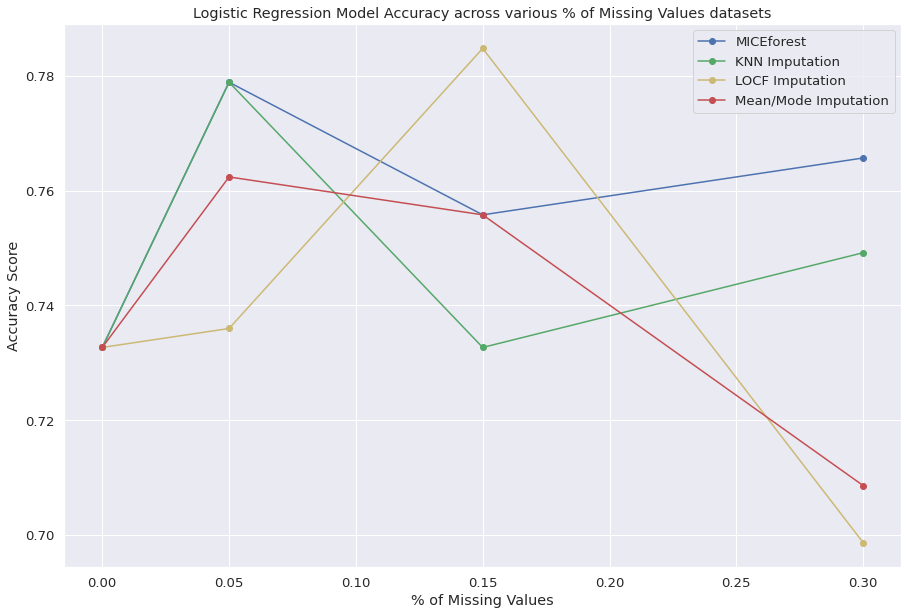

In [ ]:
# line 1 points
x1 = [0, 0.05,0.15,0.3]

fig = plt.figure(figsize=(15,10))
# plotting the line 1 points
plt.plot(x1, lr_model_acc[0], '-bo',label = "MICEforest")

# line 2 points
# plotting the line 2 points
plt.plot(x1, lr_model_acc[1], '-go', label = "KNN Imputation")

# line 3 points
# plotting the line 3 points
plt.plot(x1, lr_model_acc[2], '-yo',label = "LOCF Imputation")

# line 4 points
# plotting the line 3 points
plt.plot(x1, lr_model_acc[3], '-ro',label = "Mean/Mode Imputation")

# naming the x axis
plt.xlabel('% of Missing Values')
# naming the y axis
plt.ylabel('Accuracy Score')
# giving a title to my graph
plt.title('Logistic Regression Model Accuracy across various % of Missing Values datasets')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()

fig.savefig('LR Model Accuracy', dpi = 200)

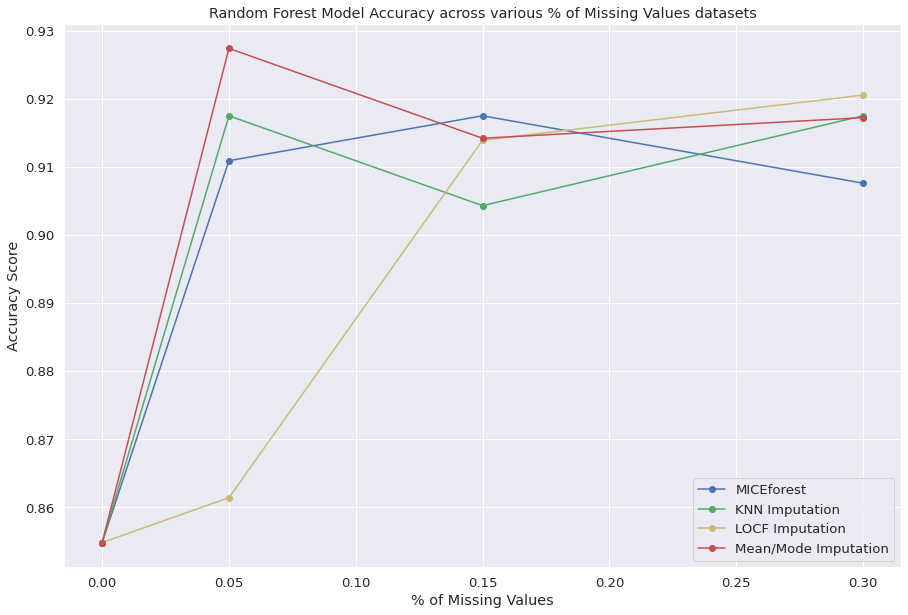

In [ ]:
# line 1 points
x1 = [0, 0.05,0.15,0.3]

fig = plt.figure(figsize=(15,10))
# plotting the line 1 points
plt.plot(x1, rf_model_acc[0], '-bo',label = "MICEforest")

# line 2 points
# plotting the line 2 points
plt.plot(x1, rf_model_acc[1], '-go', label = "KNN Imputation")

# line 3 points
# plotting the line 3 points
plt.plot(x1, rf_model_acc[2], '-yo',label = "LOCF Imputation")

# line 4 points
# plotting the line 3 points
plt.plot(x1, rf_model_acc[3], '-ro',label = "Mean/Mode Imputation")

# naming the x axis
plt.xlabel('% of Missing Values')
# naming the y axis
plt.ylabel('Accuracy Score')
# giving a title to my graph
plt.title('Random Forest Model Accuracy across various % of Missing Values datasets')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()

fig.savefig('Random Forest Model Accuracy', dpi = 200)

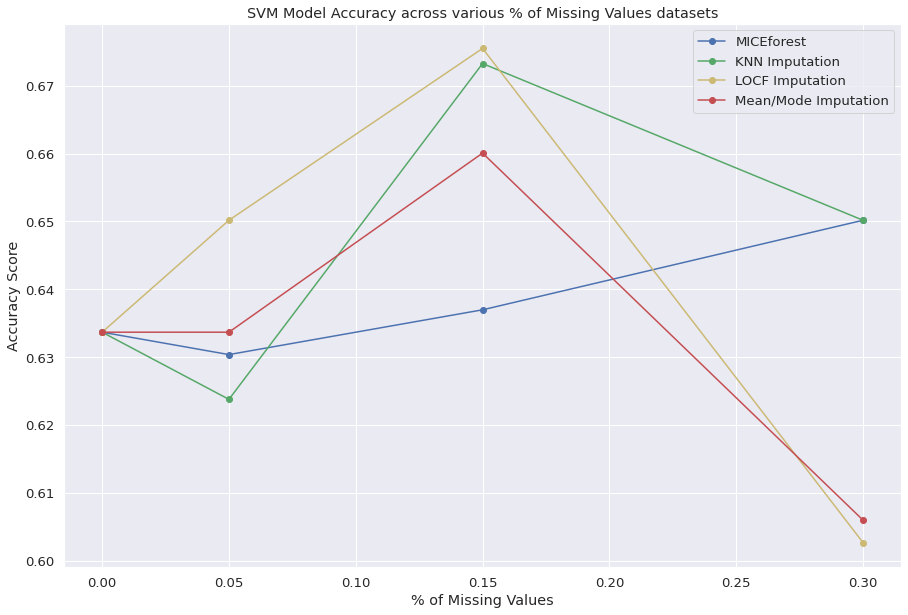

In [ ]:
# line 1 points
x1 = [0, 0.05,0.15,0.3]

fig = plt.figure(figsize=(15,10))
# plotting the line 1 points
plt.plot(x1, svm_model_acc[0], '-bo',label = "MICEforest")

# line 2 points
# plotting the line 2 points
plt.plot(x1, svm_model_acc[1], '-go', label = "KNN Imputation")

# line 3 points
# plotting the line 3 points
plt.plot(x1, svm_model_acc[2], '-yo',label = "LOCF Imputation")

# line 4 points
# plotting the line 3 points
plt.plot(x1, svm_model_acc[3], '-ro',label = "Mean/Mode Imputation")

# naming the x axis
plt.xlabel('% of Missing Values')
# naming the y axis
plt.ylabel('Accuracy Score')
# giving a title to my graph
plt.title('SVM Model Accuracy across various % of Missing Values datasets')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()

fig.savefig('SVM Model Accuracy', dpi = 200)

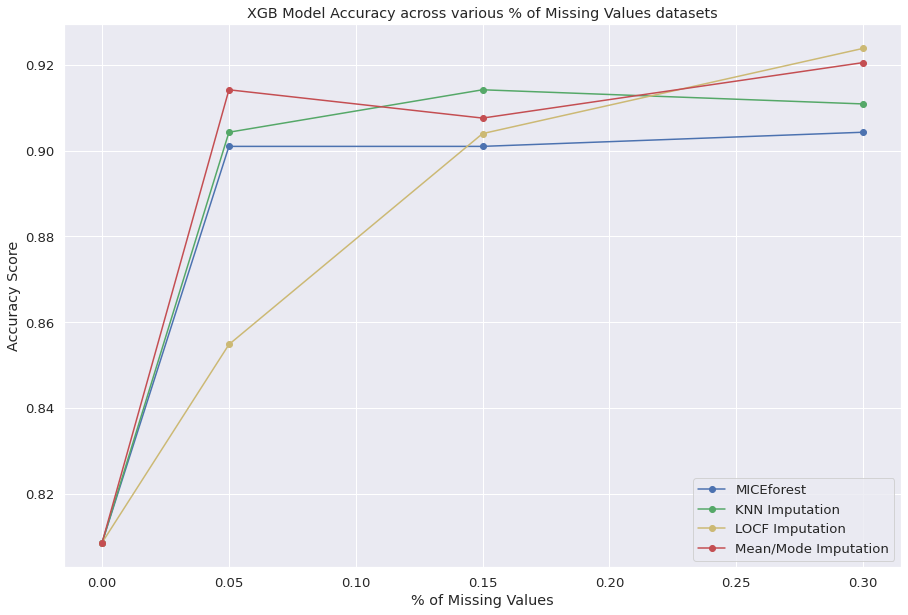

In [ ]:
# line 1 points
x1 = [0, 0.05,0.15,0.3]

fig = plt.figure(figsize=(15,10))
# plotting the line 1 points
plt.plot(x1, xgb_model_acc[0], '-bo',label = "MICEforest")

# line 2 points
# plotting the line 2 points
plt.plot(x1, xgb_model_acc[1], '-go', label = "KNN Imputation")

# line 3 points
# plotting the line 3 points
plt.plot(x1, xgb_model_acc[2], '-yo',label = "LOCF Imputation")

# line 4 points
# plotting the line 3 points
plt.plot(x1, xgb_model_acc[3], '-ro',label = "Mean/Mode Imputation")

# naming the x axis
plt.xlabel('% of Missing Values')
# naming the y axis
plt.ylabel('Accuracy Score')
# giving a title to my graph
plt.title('XGB Model Accuracy across various % of Missing Values datasets')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()

fig.savefig('XGB Model Accuracy', dpi = 200)

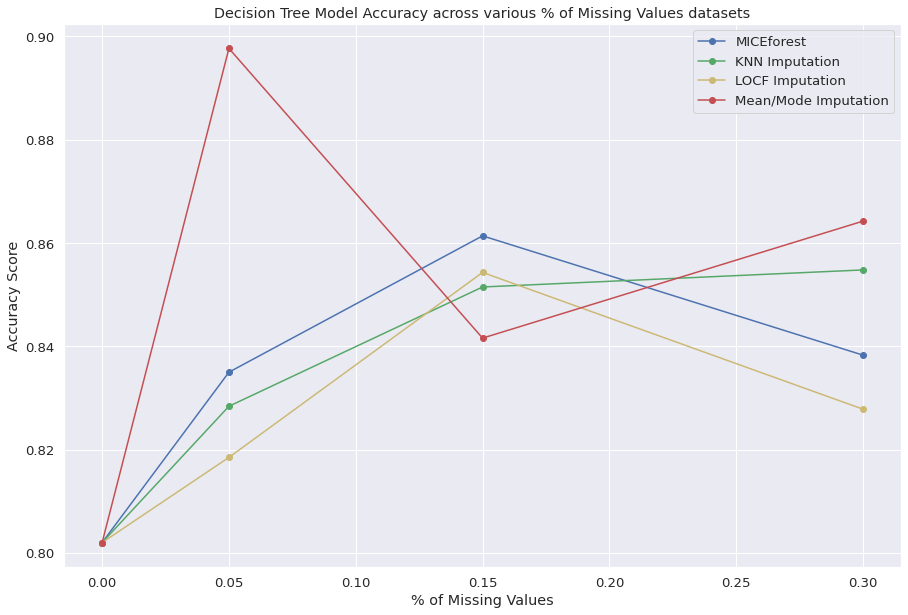

In [ ]:
# line 1 points
x1 = [0, 0.05,0.15,0.3]

fig = plt.figure(figsize=(15,10))
# plotting the line 1 points
plt.plot(x1, dt_model_acc[0], '-bo',label = "MICEforest")

# line 2 points
# plotting the line 2 points
plt.plot(x1, dt_model_acc[1], '-go', label = "KNN Imputation")

# line 3 points
# plotting the line 3 points
plt.plot(x1, dt_model_acc[2], '-yo',label = "LOCF Imputation")

# line 4 points
# plotting the line 3 points
plt.plot(x1, dt_model_acc[3], '-ro',label = "Mean/Mode Imputation")

# naming the x axis
plt.xlabel('% of Missing Values')
# naming the y axis
plt.ylabel('Accuracy Score')
# giving a title to my graph
plt.title('Decision Tree Model Accuracy across various % of Missing Values datasets')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()

fig.savefig('Decision Tree Model Accuracy', dpi = 200)

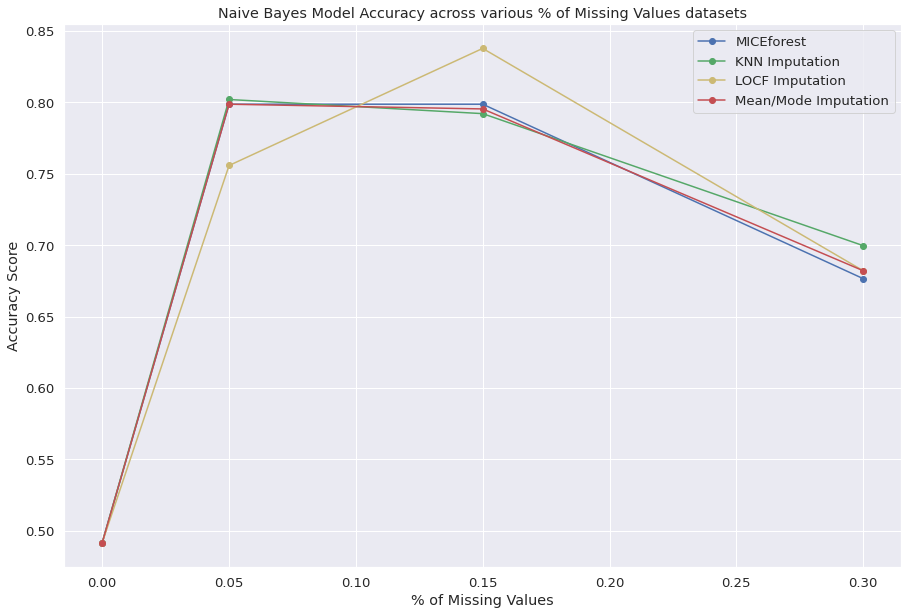

In [ ]:
# line 1 points
x1 = [0, 0.05,0.15,0.3]

fig = plt.figure(figsize=(15,10))
# plotting the line 1 points
plt.plot(x1, nb_model_acc[0], '-bo',label = "MICEforest")

# line 2 points
# plotting the line 2 points
plt.plot(x1, nb_model_acc[1], '-go', label = "KNN Imputation")

# line 3 points
# plotting the line 3 points
plt.plot(x1, nb_model_acc[2], '-yo',label = "LOCF Imputation")

# line 4 points
# plotting the line 3 points
plt.plot(x1, nb_model_acc[3], '-ro',label = "Mean/Mode Imputation")

# naming the x axis
plt.xlabel('% of Missing Values')
# naming the y axis
plt.ylabel('Accuracy Score')
# giving a title to my graph
plt.title('Naive Bayes Model Accuracy across various % of Missing Values datasets')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()

fig.savefig('Naive Bayes Model Accuracy', dpi = 200)

### Sensitivity Score 

In [ ]:
print("Logistic Regression Model Sensitivity Matrix: \n",lr_model_sen)
print("\nRandom Forest Model Sensitivity Matrix: \n ", rf_model_sen)
print("\nSVM Model Sensitivity Matrix: \n", svm_model_sen)
print("\nXGB Model Sensitivity Matrix: \n", xgb_model_sen)
print("\nDecision Tress Model Sensitivity Matrix: \n", dt_model_sen)
print("\nNaive Bayes Model Sensitivity Matrix: \n", nb_model_sen)

Logistic Regression Model Sensitivity Matrix: 
 [[0.66666667 0.625      0.66666667 0.66666667]
 [0.66666667 0.70833333 0.625      0.70833333]
 [0.66666667 0.73529412 0.68       0.52173913]
 [0.66666667 0.625      0.625      0.52173913]]

Random Forest Model Sensitivity Matrix: 
  [[0.125      0.16666667 0.29166667 0.08333333]
 [0.125      0.20833333 0.08333333 0.08333333]
 [0.125      0.05882353 0.04       0.        ]
 [0.125      0.125      0.125      0.        ]]

SVM Model Sensitivity Matrix: 
 [[0.79166667 0.79166667 0.75       0.66666667]
 [0.79166667 0.75       0.70833333 0.75      ]
 [0.79166667 0.79411765 0.64       0.60869565]
 [0.79166667 0.625      0.70833333 0.60869565]]

XGB Model Sensitivity Matrix: 
 [[0.41666667 0.16666667 0.20833333 0.16666667]
 [0.41666667 0.16666667 0.33333333 0.08333333]
 [0.41666667 0.05882353 0.16       0.04347826]
 [0.41666667 0.16666667 0.16666667 0.04347826]]

Decision Tress Model Sensitivity Matrix: 
 [[0.25       0.16666667 0.33333333 0.29166

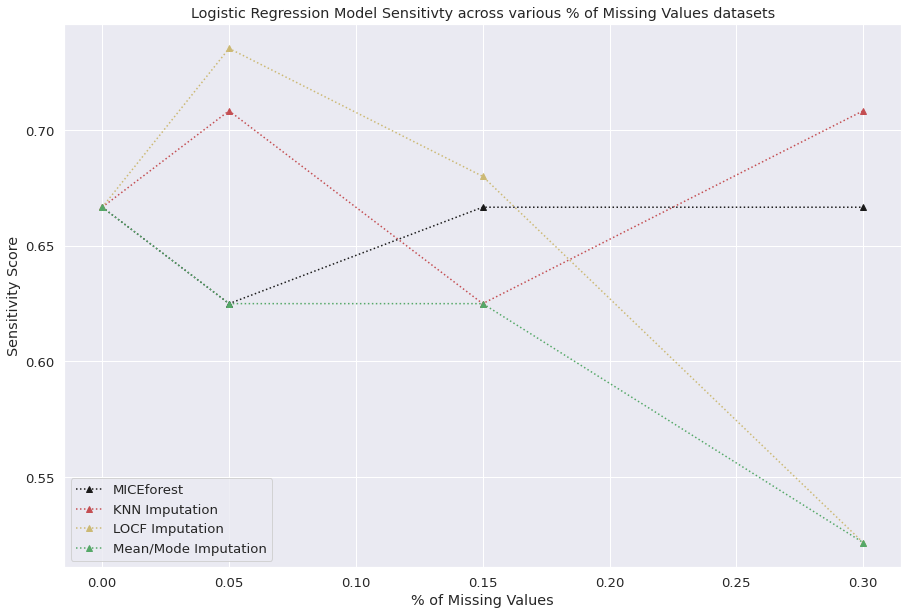

In [ ]:
# line 1 points
x1 = [0, 0.05,0.15,0.3]

fig = plt.figure(figsize=(15,10))
# plotting the line 1 points
plt.plot(x1, lr_model_sen[0], '^k:',label = "MICEforest")

# line 2 points
# plotting the line 2 points
plt.plot(x1, lr_model_sen[1], '^r:', label = "KNN Imputation")

# line 3 points
# plotting the line 3 points
plt.plot(x1, lr_model_sen[2], '^y:',label = "LOCF Imputation")

# line 4 points
# plotting the line 3 points
plt.plot(x1, lr_model_sen[3], '^g:',label = "Mean/Mode Imputation")

# naming the x axis
plt.xlabel('% of Missing Values')
# naming the y axis
plt.ylabel('Sensitivity Score')
# giving a title to my graph
plt.title('Logistic Regression Model Sensitivty across various % of Missing Values datasets')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()

fig.savefig('LR Model Sensitivity', dpi = 200)

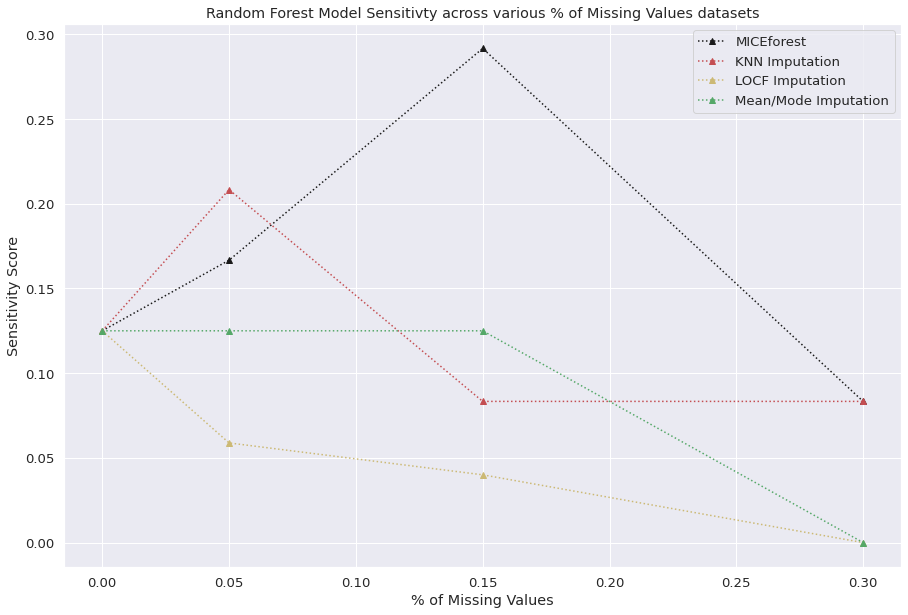

In [ ]:
# line 1 points
x1 = [0, 0.05,0.15,0.3]

fig = plt.figure(figsize=(15,10))
# plotting the line 1 points
plt.plot(x1, rf_model_sen[0], '^k:',label = "MICEforest")

# line 2 points
# plotting the line 2 points
plt.plot(x1, rf_model_sen[1], '^r:', label = "KNN Imputation")

# line 3 points
# plotting the line 3 points
plt.plot(x1, rf_model_sen[2], '^y:',label = "LOCF Imputation")

# line 4 points
# plotting the line 3 points
plt.plot(x1, rf_model_sen[3], '^g:',label = "Mean/Mode Imputation")

# naming the x axis
plt.xlabel('% of Missing Values')
# naming the y axis
plt.ylabel('Sensitivity Score')
# giving a title to my graph
plt.title('Random Forest Model Sensitivty across various % of Missing Values datasets')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()

fig.savefig('Random Forest Model Sensitivity', dpi = 200)

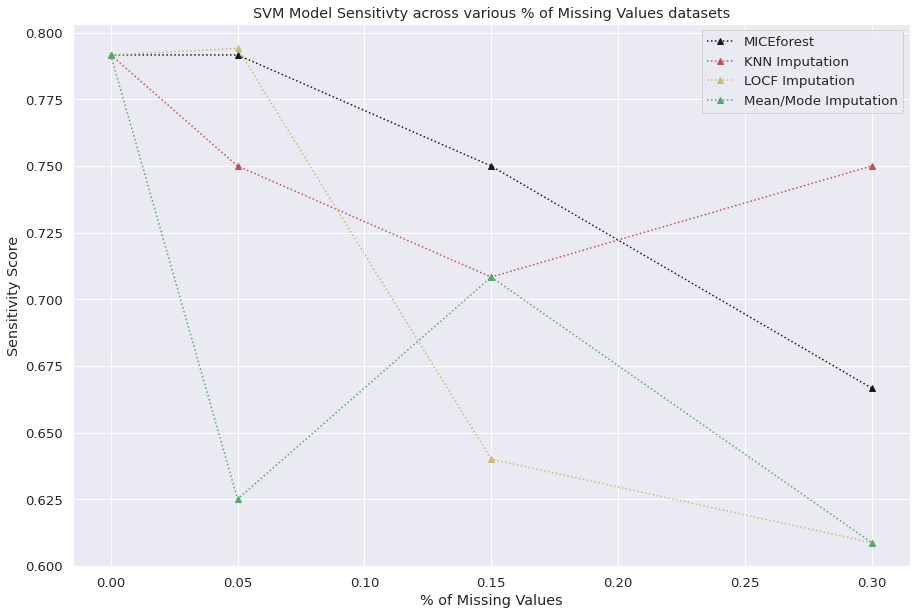

In [ ]:
# line 1 points
x1 = [0, 0.05,0.15,0.3]

fig = plt.figure(figsize=(15,10))
# plotting the line 1 points
plt.plot(x1, svm_model_sen[0], '^k:',label = "MICEforest")

# line 2 points
# plotting the line 2 points
plt.plot(x1, svm_model_sen[1], '^r:', label = "KNN Imputation")

# line 3 points
# plotting the line 3 points
plt.plot(x1, svm_model_sen[2], '^y:',label = "LOCF Imputation")

# line 4 points
# plotting the line 3 points
plt.plot(x1, svm_model_sen[3], '^g:',label = "Mean/Mode Imputation")

# naming the x axis
plt.xlabel('% of Missing Values')
# naming the y axis
plt.ylabel('Sensitivity Score')
# giving a title to my graph
plt.title('SVM Model Sensitivty across various % of Missing Values datasets')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()

fig.savefig('SVM Model Sensitivity', dpi = 200)

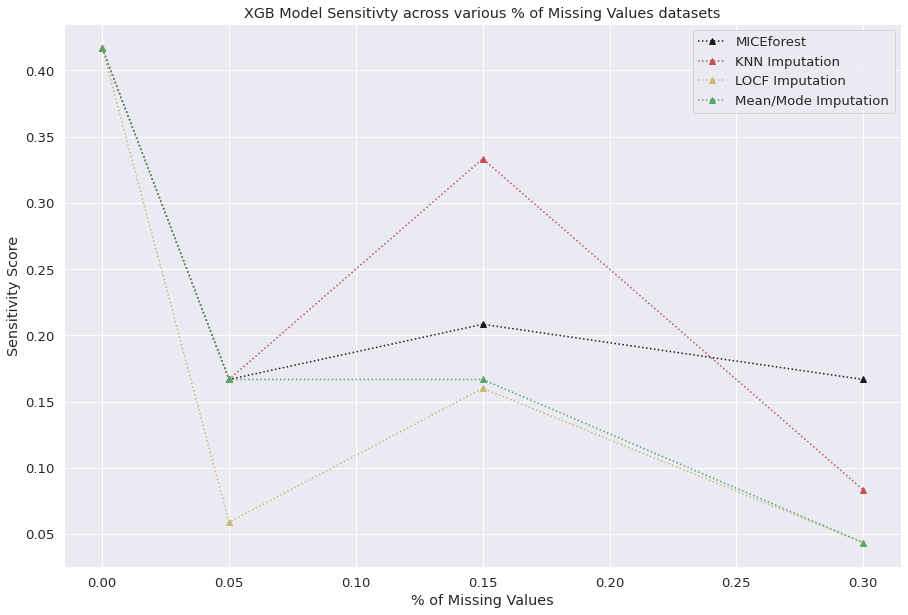

In [ ]:
# line 1 points
x1 = [0, 0.05,0.15,0.3]

fig = plt.figure(figsize=(15,10))
# plotting the line 1 points
plt.plot(x1, xgb_model_sen[0], '^k:',label = "MICEforest")

# line 2 points
# plotting the line 2 points
plt.plot(x1, xgb_model_sen[1], '^r:', label = "KNN Imputation")

# line 3 points
# plotting the line 3 points
plt.plot(x1, xgb_model_sen[2], '^y:',label = "LOCF Imputation")

# line 4 points
# plotting the line 3 points
plt.plot(x1, xgb_model_sen[3], '^g:',label = "Mean/Mode Imputation")

# naming the x axis
plt.xlabel('% of Missing Values')
# naming the y axis
plt.ylabel('Sensitivity Score')
# giving a title to my graph
plt.title('XGB Model Sensitivty across various % of Missing Values datasets')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()

fig.savefig('XGB Model Sensitivity', dpi = 200)

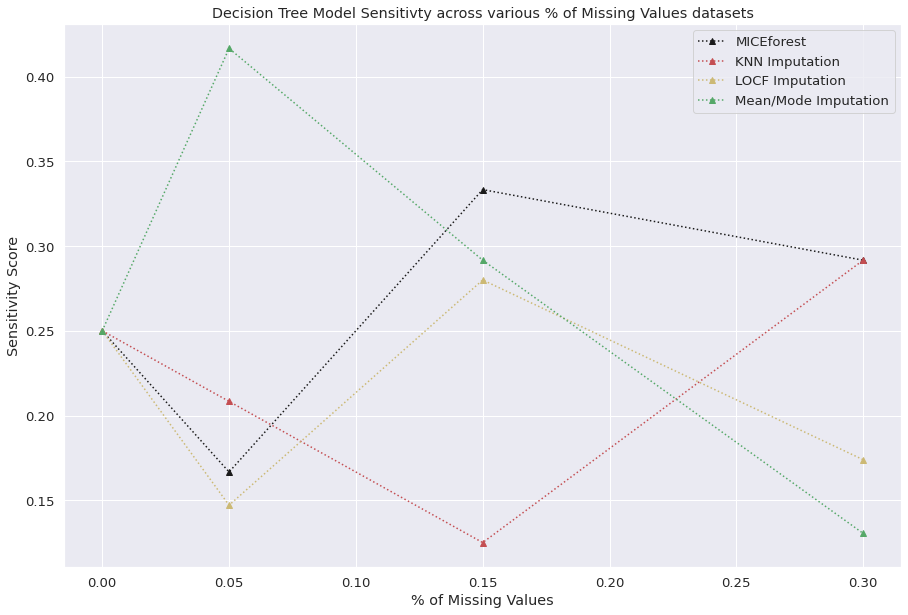

In [ ]:
# line 1 points
x1 = [0, 0.05,0.15,0.3]

fig = plt.figure(figsize=(15,10))
# plotting the line 1 points
plt.plot(x1, dt_model_sen[0], '^k:',label = "MICEforest")

# line 2 points
# plotting the line 2 points
plt.plot(x1, dt_model_sen[1], '^r:', label = "KNN Imputation")

# line 3 points
# plotting the line 3 points
plt.plot(x1, dt_model_sen[2], '^y:',label = "LOCF Imputation")

# line 4 points
# plotting the line 3 points
plt.plot(x1, dt_model_sen[3], '^g:',label = "Mean/Mode Imputation")

# naming the x axis
plt.xlabel('% of Missing Values')
# naming the y axis
plt.ylabel('Sensitivity Score')
# giving a title to my graph
plt.title('Decision Tree Model Sensitivty across various % of Missing Values datasets')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()

fig.savefig('Decision Tree Model Sensitivity', dpi = 200)

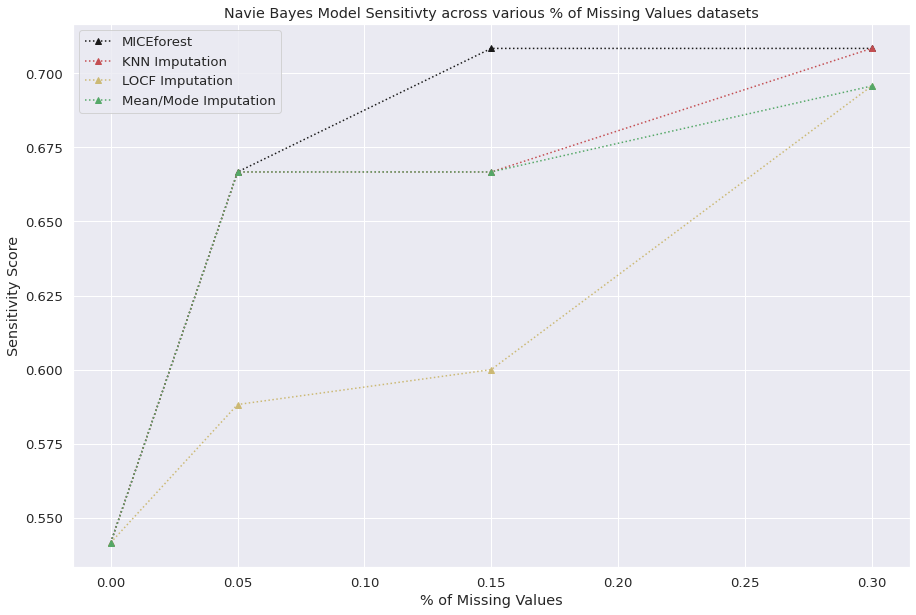

In [ ]:
# line 1 points
x1 = [0, 0.05,0.15,0.3]

fig = plt.figure(figsize=(15,10))
# plotting the line 1 points
plt.plot(x1, nb_model_sen[0], '^k:',label = "MICEforest")

# line 2 points
# plotting the line 2 points
plt.plot(x1, nb_model_sen[1], '^r:', label = "KNN Imputation")

# line 3 points
# plotting the line 3 points
plt.plot(x1, nb_model_sen[2], '^y:',label = "LOCF Imputation")

# line 4 points
# plotting the line 3 points
plt.plot(x1, nb_model_sen[3], '^g:',label = "Mean/Mode Imputation")

# naming the x axis
plt.xlabel('% of Missing Values')
# naming the y axis
plt.ylabel('Sensitivity Score')
# giving a title to my graph
plt.title('Navie Bayes Model Sensitivty across various % of Missing Values datasets')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()

fig.savefig('Naive Bayes Model Sensitivity', dpi = 200)

### ROC-AUC Score

In [ ]:
print("Logistic Regression Model ROC-AUC Score Matrix: \n",lr_model_auc)
print("\nRandom Forest Model ROC-AUC Score Matrix: \n ", rf_model_auc)
print("\nSVM Model ROC-AUC Score Matrix: \n", svm_model_auc)
print("\nXGB Model ROC-AUC Score Matrix: \n", xgb_model_auc)
print("\nDecision Tress Model ROC-AUC Score Matrix: \n", dt_model_auc)
print("\nNaive Bayes Model ROC-AUC Score Matrix: \n", nb_model_auc)

Logistic Regression Model ROC-AUC Score Matrix: 
 [[0.75014934 0.82840502 0.82497013 0.79375747]
 [0.75014934 0.83542413 0.81078256 0.82900239]
 [0.75014934 0.83151104 0.80924188 0.7221443 ]
 [0.75014934 0.81810036 0.82616487 0.72619604]]

Random Forest Model ROC-AUC Score Matrix: 
  [[0.73387097 0.81533751 0.83221326 0.8198178 ]
 [0.73387097 0.79017324 0.80742234 0.80652628]
 [0.73387097 0.80729281 0.78851986 0.77824529]
 [0.73387097 0.82862903 0.81608423 0.76725884]]

SVM Model ROC-AUC Score Matrix: 
 [[0.77389486 0.78166069 0.74701314 0.73767921]
 [0.77389486 0.74178614 0.77822581 0.74835723]
 [0.77389486 0.75601356 0.70267148 0.63892785]
 [0.77389486 0.72685185 0.78569295 0.63721365]]

XGB Model ROC-AUC Score Matrix: 
 [[0.68309438 0.7973417  0.81242533 0.8203405 ]
 [0.68309438 0.78181004 0.77658303 0.84094982]
 [0.68309438 0.80330199 0.78844765 0.78151784]
 [0.68309438 0.76807049 0.7910693  0.78182952]]

Decision Tress Model ROC-AUC Score Matrix: 
 [[0.54973118 0.52956989 0.620071

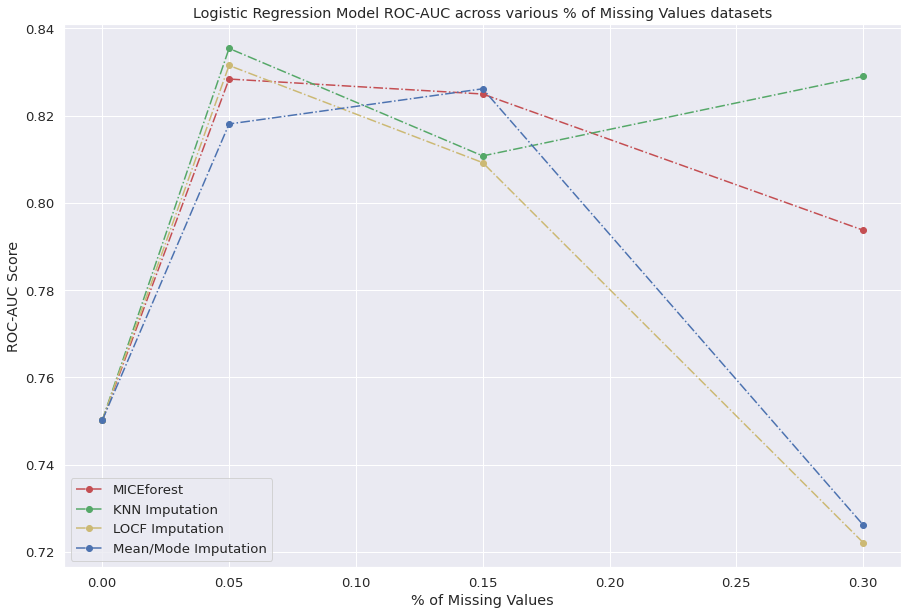

In [ ]:
# line 1 points
x1 = [0, 0.05,0.15,0.3]

fig = plt.figure(figsize=(15,10))
# plotting the line 1 points
plt.plot(x1, lr_model_auc[0], '-.ro',label = "MICEforest")

# line 2 points
# plotting the line 2 points
plt.plot(x1, lr_model_auc[1], '-.go', label = "KNN Imputation")

# line 3 points
# plotting the line 3 points
plt.plot(x1, lr_model_auc[2], '-.yo',label = "LOCF Imputation")

# line 4 points
# plotting the line 3 points
plt.plot(x1, lr_model_auc[3], '-.bo',label = "Mean/Mode Imputation")

# naming the x axis
plt.xlabel('% of Missing Values')
# naming the y axis
plt.ylabel('ROC-AUC Score')
# giving a title to my graph
plt.title('Logistic Regression Model ROC-AUC across various % of Missing Values datasets')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()

fig.savefig('LR Model ROC-AUC', dpi = 200)

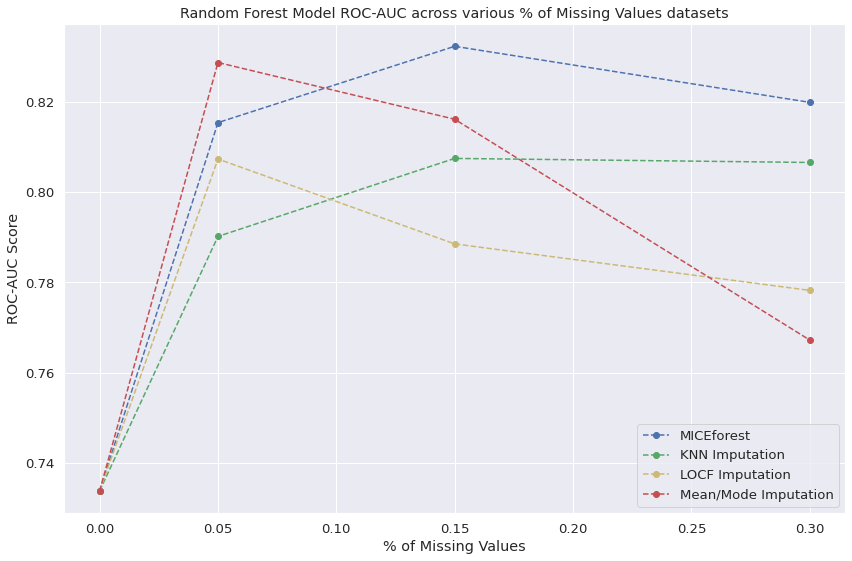

In [ ]:
# line 1 points
x1 = [0, 0.05,0.15,0.3]

fig = plt.figure(figsize=(14,9))
# plotting the line 1 points
plt.plot(x1, rf_model_auc[0], '--bo',label = "MICEforest")

# line 2 points
# plotting the line 2 points
plt.plot(x1, rf_model_auc[1], '--go', label = "KNN Imputation")

# line 3 points
# plotting the line 3 points
plt.plot(x1, rf_model_auc[2], '--yo',label = "LOCF Imputation")

# line 4 points
# plotting the line 3 points
plt.plot(x1, rf_model_auc[3], '--ro',label = "Mean/Mode Imputation")
 
# naming the x axis
plt.xlabel('% of Missing Values')
# naming the y axis
plt.ylabel('ROC-AUC Score')
# giving a title to my graph
plt.title('Random Forest Model ROC-AUC across various % of Missing Values datasets')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()

fig.savefig('Random Forest Model ROC-AUC', dpi = 200)

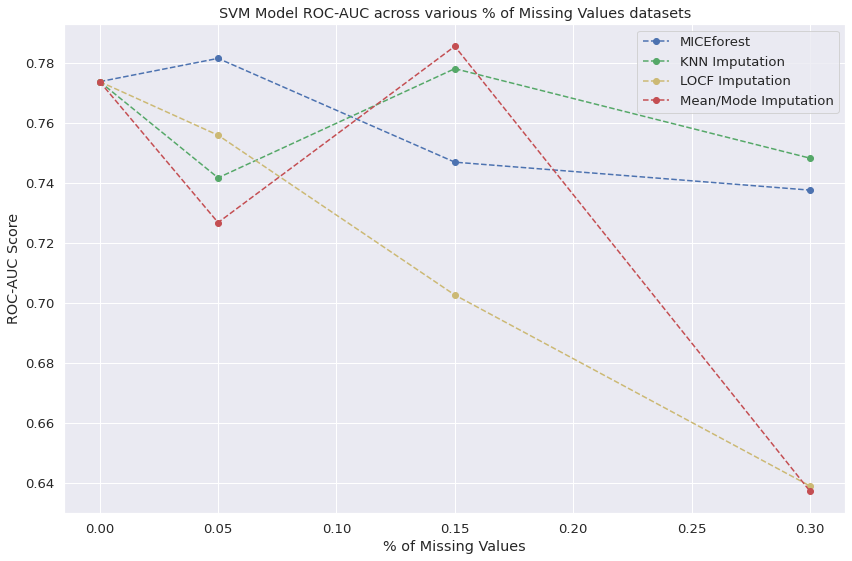

In [ ]:
# line 1 points
x1 = [0, 0.05,0.15,0.3]

fig = plt.figure(figsize=(14,9))
# plotting the line 1 points
plt.plot(x1, svm_model_auc[0], '--bo',label = "MICEforest")

# line 2 points
# plotting the line 2 points
plt.plot(x1, svm_model_auc[1], '--go', label = "KNN Imputation")

# line 3 points
# plotting the line 3 points
plt.plot(x1, svm_model_auc[2], '--yo',label = "LOCF Imputation")

# line 4 points
# plotting the line 3 points
plt.plot(x1, svm_model_auc[3], '--ro',label = "Mean/Mode Imputation")

 
# naming the x axis
plt.xlabel('% of Missing Values')
# naming the y axis
plt.ylabel('ROC-AUC Score')
# giving a title to my graph
plt.title('SVM Model ROC-AUC across various % of Missing Values datasets')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()

fig.savefig('SVM Model ROC-AUC Score', dpi = 200)

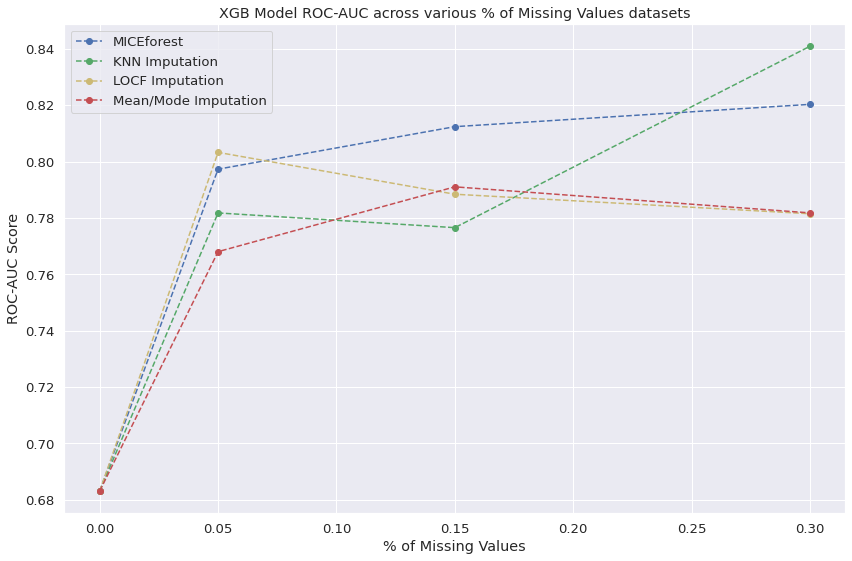

In [ ]:
# line 1 points
x1 = [0, 0.05,0.15,0.3]

fig = plt.figure(figsize=(14,9))
# plotting the line 1 points
plt.plot(x1, xgb_model_auc[0], '--bo',label = "MICEforest")

# line 2 points
# plotting the line 2 points
plt.plot(x1, xgb_model_auc[1], '--go', label = "KNN Imputation")

# line 3 points
# plotting the line 3 points
plt.plot(x1, xgb_model_auc[2], '--yo',label = "LOCF Imputation")

# line 4 points
# plotting the line 3 points
plt.plot(x1, xgb_model_auc[3], '--ro',label = "Mean/Mode Imputation")

# naming the x axis
plt.xlabel('% of Missing Values')
# naming the y axis
plt.ylabel('ROC-AUC Score')
# giving a title to my graph
plt.title('XGB Model ROC-AUC across various % of Missing Values datasets')

#show a legend on the plot
plt.legend()

# function to show the plot
plt.show()

fig.savefig('XGBoost Model ROC-AUC Score', dpi = 200)

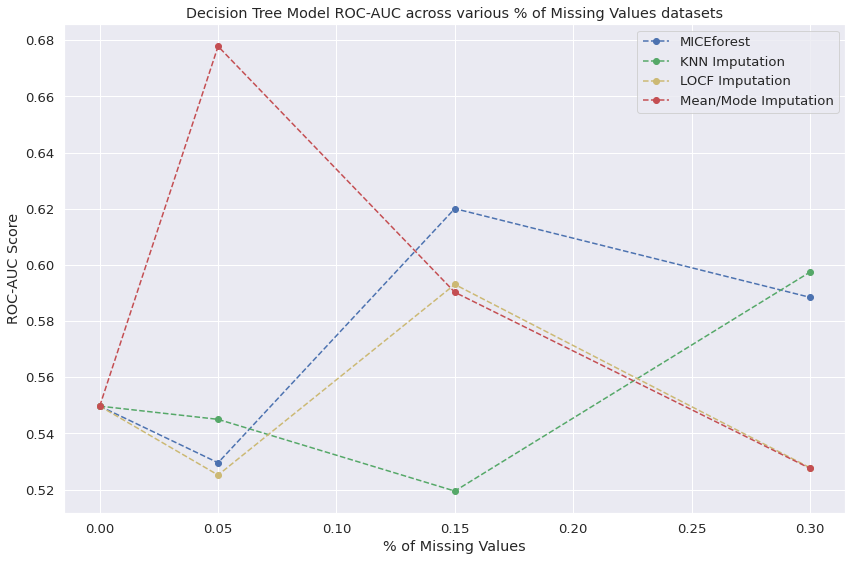

In [ ]:
# line 1 points
x1 = [0, 0.05,0.15,0.3]

fig = plt.figure(figsize=(14,9))
# plotting the line 1 points
plt.plot(x1, dt_model_auc[0], '--bo',label = "MICEforest")

# line 2 points
# plotting the line 2 points
plt.plot(x1, dt_model_auc[1], '--go', label = "KNN Imputation")

# line 3 points
# plotting the line 3 points
plt.plot(x1, dt_model_auc[2], '--yo',label = "LOCF Imputation")

# line 4 points
# plotting the line 3 points
plt.plot(x1, dt_model_auc[3], '--ro',label = "Mean/Mode Imputation")

# naming the x axis
plt.xlabel('% of Missing Values')
# naming the y axis
plt.ylabel('ROC-AUC Score')
# giving a title to my graph
plt.title('Decision Tree Model ROC-AUC across various % of Missing Values datasets')

#show a legend on the plot
plt.legend()

# function to show the plot
plt.show()

fig.savefig('Decision Tree ROC-AUC Score', dpi = 200)

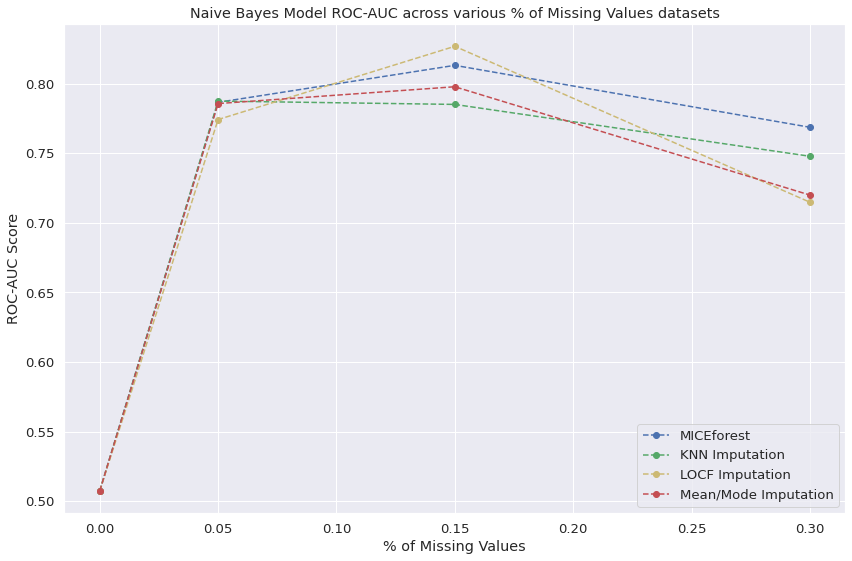

In [ ]:
# line 1 points
x1 = [0, 0.05,0.15,0.3]

fig = plt.figure(figsize=(14,9))
# plotting the line 1 points
plt.plot(x1, nb_model_auc[0], '--bo',label = "MICEforest")

# line 2 points
# plotting the line 2 points
plt.plot(x1, nb_model_auc[1], '--go', label = "KNN Imputation")

# line 3 points
# plotting the line 3 points
plt.plot(x1, nb_model_auc[2], '--yo',label = "LOCF Imputation")

# line 4 points
# plotting the line 3 points
plt.plot(x1, nb_model_auc[3], '--ro',label = "Mean/Mode Imputation")

# naming the x axis
plt.xlabel('% of Missing Values')
# naming the y axis
plt.ylabel('ROC-AUC Score')
# giving a title to my graph
plt.title('Naive Bayes Model ROC-AUC across various % of Missing Values datasets')

#show a legend on the plot
plt.legend()

# function to show the plot
plt.show()

fig.savefig('Naive Bayes ROC-AUC Score', dpi = 200)

### Specificity Score

In [ ]:
print("Logistic Regression Model Specificity  Matrix: \n",lr_model_spe)
print("\nRandom Forest Model Specificity  Matrix: \n ", rf_model_spe)
print("\nSVM Model Specificity  Matrix: \n", svm_model_spe)
print("\nXGB Model Specificity  Matrix: \n", xgb_model_spe)
print("\nDecision Tress Model Specificity  Matrix: \n", dt_model_spe)
print("\nNaive Bayes Model Specificity  Matrix: \n", nb_model_spe)

Logistic Regression Model Specificity  Matrix: 
 [[0.73835125 0.7921147  0.76344086 0.77419355]
 [0.73835125 0.78494624 0.74193548 0.75268817]
 [0.73835125 0.73605948 0.79422383 0.71326165]
 [0.73835125 0.77419355 0.76702509 0.72401434]]

Random Forest Model Specificity  Matrix: 
  [[0.91756272 0.97491039 0.97132616 0.97849462]
 [0.91756272 0.97849462 0.97491039 0.98924731]
 [0.91756272 0.96282528 0.99277978 0.99641577]
 [0.91756272 0.99641577 0.98207885 0.99283154]]

SVM Model Specificity  Matrix: 
 [[0.62007168 0.61648746 0.62724014 0.64874552]
 [0.62007168 0.61290323 0.6702509  0.64157706]
 [0.62007168 0.63197026 0.67870036 0.60215054]
 [0.62007168 0.6344086  0.65591398 0.60573477]]

XGB Model Specificity  Matrix: 
 [[0.84229391 0.96415771 0.96057348 0.96774194]
 [0.84229391 0.96774194 0.96415771 0.98207885]
 [0.84229391 0.95539033 0.97111913 0.99641577]
 [0.84229391 0.97849462 0.97132616 0.99283154]]

Decision Tress Model Specificity  Matrix: 
 [[0.84946237 0.89247312 0.90681004 0.

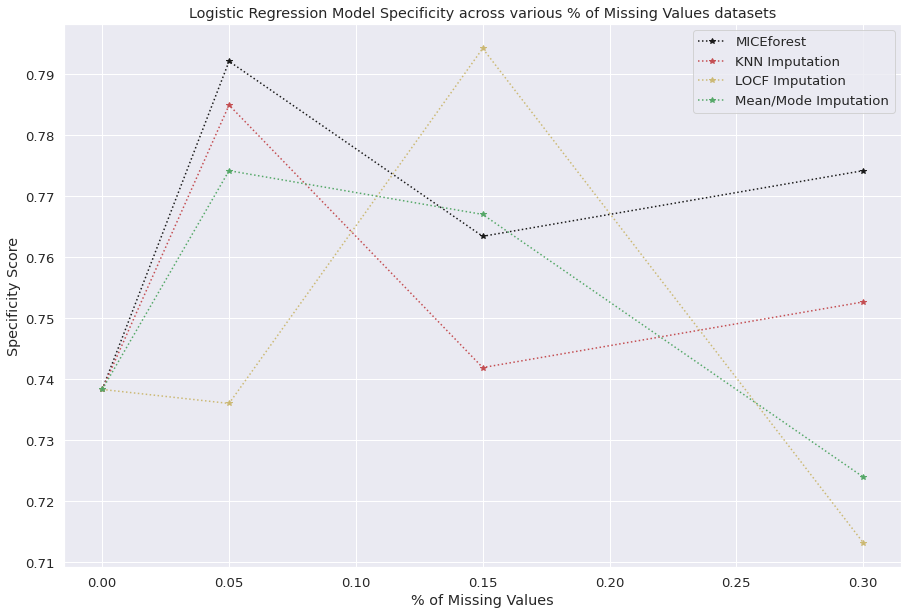

In [ ]:
# line 1 points
x1 = [0, 0.05,0.15,0.3]

fig = plt.figure(figsize=(15,10))
# plotting the line 1 points
plt.plot(x1, lr_model_spe[0], '*k:',label = "MICEforest")

# line 2 points
# plotting the line 2 points
plt.plot(x1, lr_model_spe[1], '*r:', label = "KNN Imputation")

# line 3 points
# plotting the line 3 points
plt.plot(x1, lr_model_spe[2], '*y:',label = "LOCF Imputation")

# line 4 points
# plotting the line 3 points
plt.plot(x1, lr_model_spe[3], '*g:',label = "Mean/Mode Imputation")

# naming the x axis
plt.xlabel('% of Missing Values')
# naming the y axis
plt.ylabel('Specificity Score')
# giving a title to my graph
plt.title('Logistic Regression Model Specificity across various % of Missing Values datasets')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()

fig.savefig('LR Model Specificity  ', dpi = 200)

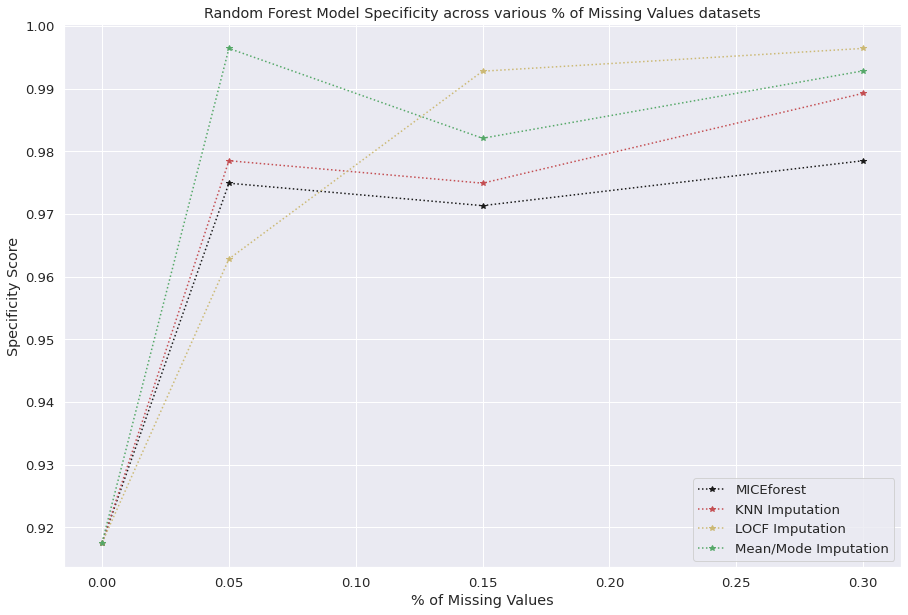

In [ ]:
# line 1 points
x1 = [0, 0.05,0.15,0.3]

fig = plt.figure(figsize=(15,10))
# plotting the line 1 points
plt.plot(x1, rf_model_spe[0], '*k:',label = "MICEforest")

# line 2 points
# plotting the line 2 points
plt.plot(x1, rf_model_spe[1], '*r:', label = "KNN Imputation")

# line 3 points
# plotting the line 3 points
plt.plot(x1, rf_model_spe[2], '*y:',label = "LOCF Imputation")

# line 4 points
# plotting the line 3 points
plt.plot(x1, rf_model_spe[3], '*g:',label = "Mean/Mode Imputation")

# naming the x axis
plt.xlabel('% of Missing Values')
# naming the y axis
plt.ylabel('Specificity Score')
# giving a title to my graph
plt.title('Random Forest Model Specificity across various % of Missing Values datasets')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()

fig.savefig('Random Forest Model Specificity', dpi = 200)

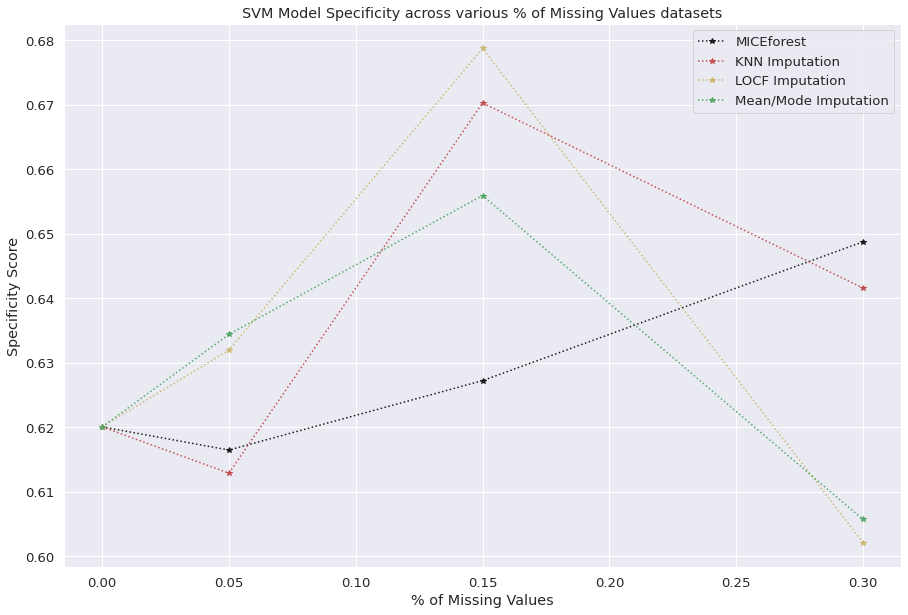

In [ ]:
# line 1 points
x1 = [0, 0.05,0.15,0.3]

fig = plt.figure(figsize=(15,10))
# plotting the line 1 points
plt.plot(x1, svm_model_spe[0], '*k:',label = "MICEforest")

# line 2 points
# plotting the line 2 points
plt.plot(x1, svm_model_spe[1], '*r:', label = "KNN Imputation")

# line 3 points
# plotting the line 3 points
plt.plot(x1, svm_model_spe[2], '*y:',label = "LOCF Imputation")

# line 4 points
# plotting the line 3 points
plt.plot(x1, svm_model_spe[3], '*g:',label = "Mean/Mode Imputation")

# naming the x axis
plt.xlabel('% of Missing Values')
# naming the y axis
plt.ylabel('Specificity Score')
# giving a title to my graph
plt.title('SVM Model Specificity across various % of Missing Values datasets')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()

fig.savefig('SVM Model Specificity', dpi = 200)

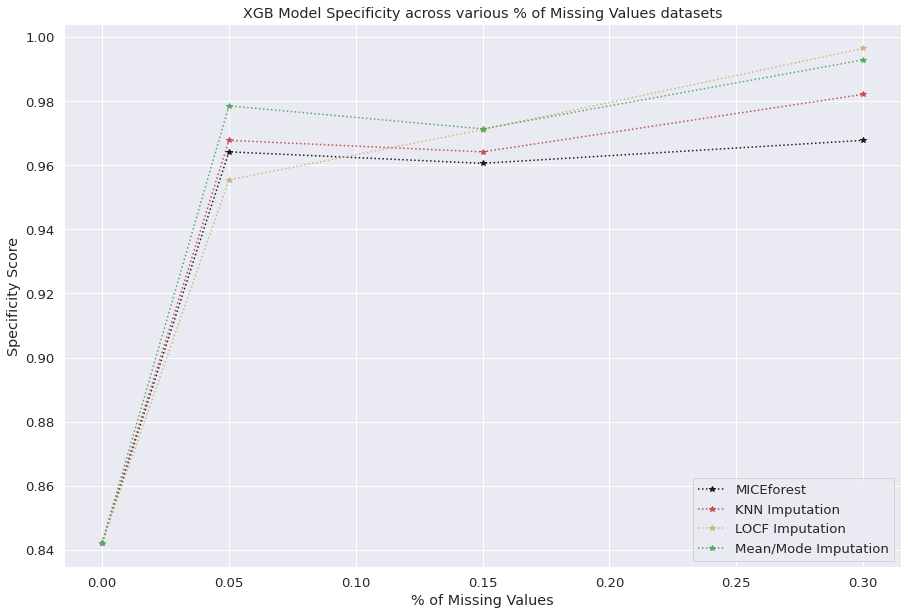

In [ ]:
# line 1 points
x1 = [0, 0.05,0.15,0.3]

fig = plt.figure(figsize=(15,10))
# plotting the line 1 points
plt.plot(x1, xgb_model_spe[0], '*k:',label = "MICEforest")

# line 2 points
# plotting the line 2 points
plt.plot(x1, xgb_model_spe[1], '*r:', label = "KNN Imputation")

# line 3 points
# plotting the line 3 points
plt.plot(x1, xgb_model_spe[2], '*y:',label = "LOCF Imputation")

# line 4 points
# plotting the line 3 points
plt.plot(x1, xgb_model_spe[3], '*g:',label = "Mean/Mode Imputation")

# naming the x axis
plt.xlabel('% of Missing Values')
# naming the y axis
plt.ylabel('Specificity Score')
# giving a title to my graph
plt.title('XGB Model Specificity across various % of Missing Values datasets')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()

fig.savefig('XGB Model Specificity', dpi = 200)

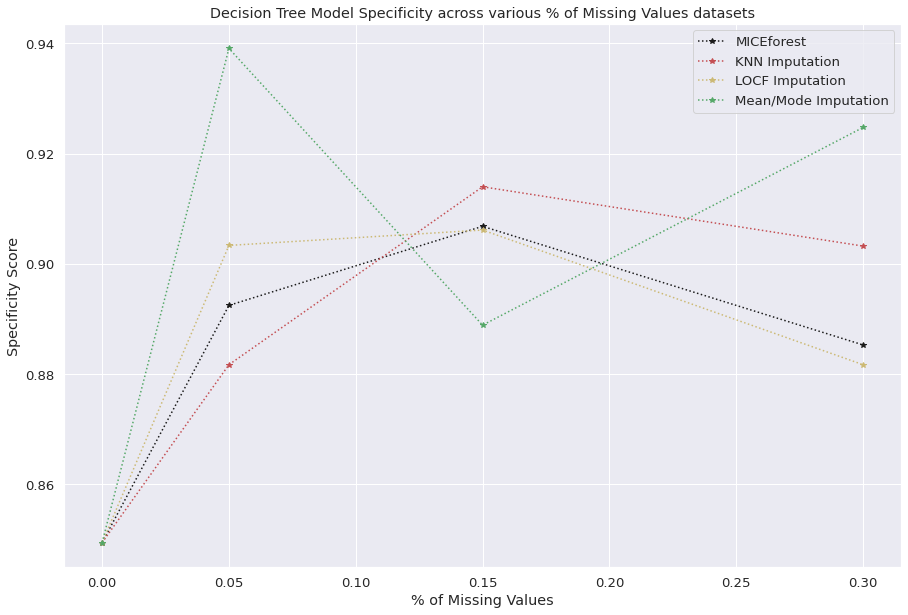

In [ ]:
# line 1 points
x1 = [0, 0.05,0.15,0.3]

fig = plt.figure(figsize=(15,10))
# plotting the line 1 points
plt.plot(x1, dt_model_spe[0], '*k:',label = "MICEforest")

# line 2 points
# plotting the line 2 points
plt.plot(x1, dt_model_spe[1], '*r:', label = "KNN Imputation")

# line 3 points
# plotting the line 3 points
plt.plot(x1, dt_model_spe[2], '*y:',label = "LOCF Imputation")

# line 4 points
# plotting the line 3 points
plt.plot(x1, dt_model_spe[3], '*g:',label = "Mean/Mode Imputation")

# naming the x axis
plt.xlabel('% of Missing Values')
# naming the y axis
plt.ylabel('Specificity Score')
# giving a title to my graph
plt.title('Decision Tree Model Specificity across various % of Missing Values datasets')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()

fig.savefig('Decision Tree Model Specificity', dpi = 200)

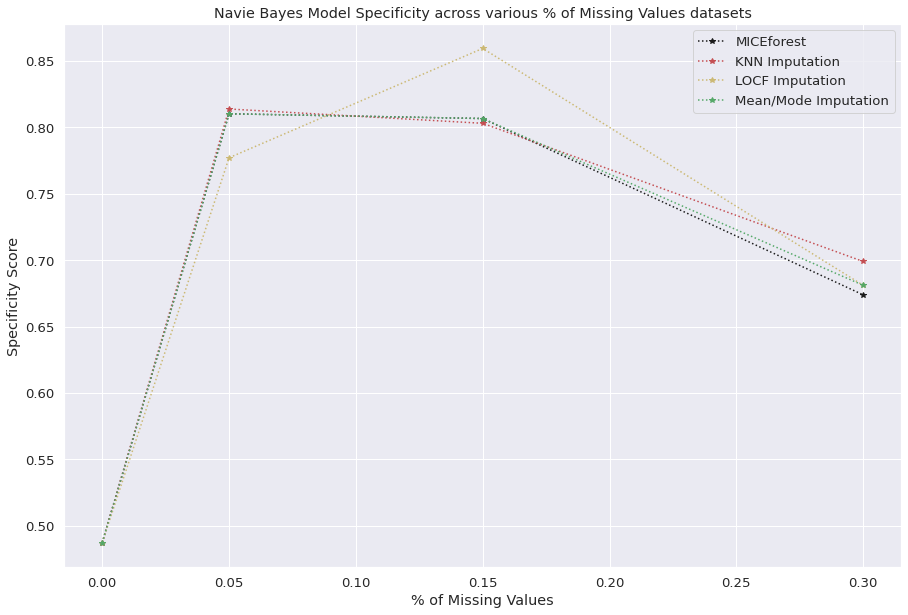

In [ ]:

# line 1 points
x1 = [0, 0.05,0.15,0.3]

fig = plt.figure(figsize=(15,10))
# plotting the line 1 points
plt.plot(x1, nb_model_spe[0], '*k:',label = "MICEforest")

# line 2 points
# plotting the line 2 points
plt.plot(x1, nb_model_spe[1], '*r:', label = "KNN Imputation")

# line 3 points
# plotting the line 3 points
plt.plot(x1, nb_model_spe[2], '*y:',label = "LOCF Imputation")

# line 4 points
# plotting the line 3 points
plt.plot(x1, nb_model_spe[3], '*g:',label = "Mean/Mode Imputation")

# naming the x axis
plt.xlabel('% of Missing Values')
# naming the y axis
plt.ylabel('Specificity Score')
# giving a title to my graph
plt.title('Navie Bayes Model Specificity across various % of Missing Values datasets')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()

fig.savefig('Naive Bayes Model Specificity', dpi = 200)

### Saving Results to Files

In [ ]:
#Accuracy results
lr_model_acc_df = pd.DataFrame(lr_model_acc)
lr_model_acc_df.to_csv("lr_model_acc.csv")

rf_model_acc_df = pd.DataFrame(rf_model_acc)
rf_model_acc_df.to_csv("rf_model_acc.csv")

svm_model_acc_df = pd.DataFrame(svm_model_acc)
svm_model_acc_df.to_csv("svm_model_acc.csv")

xgb_model_acc_df = pd.DataFrame(xgb_model_acc)
xgb_model_acc_df.to_csv("xgb_model_acc.csv")

dt_model_acc_df = pd.DataFrame(dt_model_acc)
dt_model_acc_df.to_csv("dt_model_acc.csv")

nb_model_acc_df = pd.DataFrame(nb_model_acc)
nb_model_acc_df.to_csv("nb_model_acc.csv")

In [ ]:
## Sensitivity results
lr_model_sen_df = pd.DataFrame(lr_model_sen)
lr_model_sen_df.to_csv("lr_model_sen.csv")

rf_model_sen_df = pd.DataFrame(rf_model_sen)
rf_model_sen_df.to_csv("rf_model_sen.csv")

svm_model_sen_df = pd.DataFrame(svm_model_sen)
svm_model_sen_df.to_csv("svm_model_sen.csv")

xgb_model_sen_df = pd.DataFrame(xgb_model_sen)
xgb_model_sen_df.to_csv("xgb_model_sen.csv")

dt_model_sen_df = pd.DataFrame(dt_model_sen)
dt_model_sen_df.to_csv("dt_model_sen.csv")

nb_model_sen_df = pd.DataFrame(nb_model_sen)
nb_model_sen_df.to_csv("nb_model_sen.csv")

In [ ]:
## Roc-Auc results
lr_model_auc_df = pd.DataFrame(lr_model_auc)
lr_model_auc_df.to_csv("lr_model_auc.csv")

rf_model_auc_df = pd.DataFrame(rf_model_auc)
rf_model_auc_df.to_csv("rf_model_auc.csv")

svm_model_auc_df = pd.DataFrame(svm_model_auc)
svm_model_auc_df.to_csv("svm_model_auc.csv")

xgb_model_auc_df = pd.DataFrame(xgb_model_auc)
xgb_model_auc_df.to_csv("xgb_model_auc.csv")

dt_model_auc_df = pd.DataFrame(dt_model_auc)
dt_model_auc_df.to_csv("dt_model_auc.csv")

nb_model_auc_df = pd.DataFrame(nb_model_auc)
nb_model_auc_df.to_csv("nb_model_auc.csv")

In [ ]:
#specificity results
lr_model_spe_df = pd.DataFrame(lr_model_spe)
lr_model_spe_df.to_csv("lr_model_spe.csv")

rf_model_spe_df = pd.DataFrame(rf_model_spe)
rf_model_spe_df.to_csv("rf_model_spe.csv")

svm_model_spe_df = pd.DataFrame(svm_model_spe)
svm_model_spe_df.to_csv("svm_model_spe.csv")

xgb_model_spe_df = pd.DataFrame(xgb_model_spe)
xgb_model_spe_df.to_csv("xgb_model_spe.csv")

dt_model_spe_df = pd.DataFrame(dt_model_spe)
dt_model_spe_df.to_csv("dt_model_spe.csv")

nb_model_spe_df = pd.DataFrame(nb_model_spe)
nb_model_spe_df.to_csv("nb_model_spe.csv")

### Importing results

In [ ]:

#Accuracy results 
from google.colab import files
files.download("lr_model_acc.csv")

from google.colab import files
files.download("rf_model_acc.csv")

from google.colab import files
files.download("svm_model_acc.csv")

from google.colab import files
files.download("xgb_model_acc.csv")

from google.colab import files
files.download("dt_model_acc.csv")

from google.colab import files
files.download("nb_model_acc.csv")

In [ ]:
## Sensitivity results 

from google.colab import files
files.download("lr_model_sen.csv")

from google.colab import files
files.download("rf_model_sen.csv")

from google.colab import files
files.download("svm_model_sen.csv")

from google.colab import files
files.download("xgb_model_sen.csv")

from google.colab import files
files.download("dt_model_sen.csv")

from google.colab import files
files.download("nb_model_sen.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
## Roc-Auc results
from google.colab import files
files.download("lr_model_auc.csv")

from google.colab import files
files.download("rf_model_auc.csv")

from google.colab import files
files.download("svm_model_auc.csv")

from google.colab import files
files.download("xgb_model_auc.csv")

from google.colab import files
files.download("dt_model_auc.csv")

from google.colab import files
files.download("nb_model_auc.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#specificity results 

from google.colab import files
files.download("lr_model_spe.csv")

from google.colab import files
files.download("rf_model_spe.csv")

from google.colab import files
files.download("svm_model_spe.csv")


from google.colab import files
files.download("xgb_model_spe.csv")


from google.colab import files
files.download("dt_model_spe.csv")


from google.colab import files
files.download("nb_model_spe.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>